## Problem Statement: (Lead Scoring Case Study)
### 1. Identify most promising leads(leads most likely to get converted to paying customers).
### 2. Recommendations for X Education company to increase lead conversion rate so that more customers are attracted to buy course.

## Assignment Goal:
### 1. Identify important variables that can help to increase proability of leads getting converted to customer in buying course..
### 2. Build Logistic Regression Model to assign value of lead score (between 0-100) for each leads so that higher score leads can be targetted by company.
### 3. To adjust model based on comapny requirement changes in future.


## Step One: Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import textwrap
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split ## For Spliting of Dataset to Train and Test.
from sklearn.preprocessing import StandardScaler     ## Used Standard Scaler method for Scaling.


## Step two : Reading Dataset

In [2]:
lead_scr = pd.read_csv('Leads.csv')

In [3]:
lead_scr.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit  ...  \
0                            0                   0.0  ...   
1                          674                   2.5  ...   
2                         1532                   2.0  ...   
3                          305                   1.0  ...   
4                         1428                   1.0  ...   

  Get updates on DM Content    Lead Profile    City  \
0                        No          Select  Select   
1                        No          Select  Select   
2                        No  Potential Lead  Mumbai   
3                        No          Select  Mumbai   
4                        No          Select  Mumbai   

  Asymmetrique Activity Index Asymmetrique Profile Index  \
0                   02.Medium                  02.Medium   
1                   02.Medium                  02.Medium   
2                   02.Medium                    01.High   
3                   02.Medium                    01.High   
4                   02.Medium                    01.High   

  Asymmetrique Activity Score Asymmetrique Profile Score  \
0                        15.0                       15.0   
1                        15.0                       15.0   
2                        14.0                       20.0   
3                        13.0                       17.0   
4                        15.0                       18.0   

  I agree to pay the amount through cheque  \
0                                       No   
1                                       No   
2                                       No   
3                                       No   
4                                       No   

  A free copy of Mastering The Interview Last Notable Activity  
0                                     No              Modified  
1                                     No          Email Opened  
2                                    Yes          Email Opened  
3                                     No              Modified  
4                                     No              Modified  

[5 rows x 37 columns]

In [4]:
lead_scr.shape

(9240, 37)

### There are total 9240 rows and 37 variables.

In [5]:
lead_scr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

### There are some missing values present and 7 variables are numerical. 

In [6]:
## Checking for null values.

lead_scr.isna().sum().sort_values(ascending=False)

Lead Quality                                     4767
Asymmetrique Activity Index                      4218
Asymmetrique Profile Score                       4218
Asymmetrique Activity Score                      4218
Asymmetrique Profile Index                       4218
Tags                                             3353
Lead Profile                                     2709
What matters most to you in choosing a course    2709
What is your current occupation                  2690
Country                                          2461
How did you hear about X Education               2207
Specialization                                   1438
City                                             1420
Page Views Per Visit                              137
TotalVisits                                       137
Last Activity                                     103
Lead Source                                        36
Receive More Updates About Our Courses              0
I agree to pay the amount th

In [7]:
## Checking for null values in percentile.

(round(lead_scr.isna().sum()/lead_scr.shape[0]*100,2)).sort_values(ascending=False)



Lead Quality                                     51.59
Asymmetrique Activity Index                      45.65
Asymmetrique Profile Score                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Profile Index                       45.65
Tags                                             36.29
Lead Profile                                     29.32
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
How did you hear about X Education               23.89
Specialization                                   15.56
City                                             15.37
Page Views Per Visit                              1.48
TotalVisits                                       1.48
Last Activity                                     1.11
Lead Source                                       0.39
Receive More Updates About Our Courses            0.00
I agree to

### We have 17 variables that have null values. 

### There are many columns that have 'Select' value. These values are simialr to missinig/Null values as 'Select' value comes into picture when student does not select any option from dropdown. 


In [8]:
## Function to return all columns that have value 'Select'


def variable_select(data):
    
    col_select = []
    for cols in data.columns:
        if 'Select' in data[cols].values:
            col_select.append(cols)

    ## To find percentage of 'Select' values present in column.
    
    for var in col_select:
        sel_percentile = round((data[data[var].values=='Select'][var].count()/data.shape[0])*100,2)
        print(f'Percentage of "Select" value in column "{var}" : {sel_percentile}%')
        
variable_select(lead_scr)


Percentage of "Select" value in column "Specialization" : 21.02%
Percentage of "Select" value in column "How did you hear about X Education" : 54.58%
Percentage of "Select" value in column "Lead Profile" : 44.87%
Percentage of "Select" value in column "City" : 24.34%


### There are four columns having 'Select' values. 
### Replacing vlaues Select to Null as they are same.

In [9]:
## Replaced 'Select' values to Null so that we have only null values in dataset.

for cols in ['Specialization','How did you hear about X Education','Lead Profile','City']:
    lead_scr[cols].replace('Select',np.nan,inplace=True)

In [10]:
## Validating all select are replaced with null.

variable_select(lead_scr)  ## No output indicates there are no Select values in any columns.


In [11]:
## Re-Calculating null values in data.

(round(lead_scr.isna().sum()/lead_scr.shape[0]*100,2)).sort_values(ascending=False)

How did you hear about X Education               78.46
Lead Profile                                     74.19
Lead Quality                                     51.59
Asymmetrique Profile Score                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Activity Index                      45.65
Asymmetrique Profile Index                       45.65
City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
Page Views Per Visit                              1.48
TotalVisits                                       1.48
Last Activity                                     1.11
Lead Source                                       0.39
Receive More Updates About Our Courses            0.00
I agree to

## Step Three : Handling Missing Values.

### Variables having more than 40% null values is to be removed. 

In [12]:
## Removing columns with more than 40% of null vlaues.

lead_scr_new = lead_scr.drop(columns=['How did you hear about X Education','Lead Profile','Lead Quality','Asymmetrique Profile Score','Asymmetrique Activity Score','Asymmetrique Activity Index','Asymmetrique Profile Index'],axis=1)

In [13]:
lead_scr_new.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit  ...  \
0                            0                   0.0  ...   
1                          674                   2.5  ...   
2                         1532                   2.0  ...   
3                          305                   1.0  ...   
4                         1428                   1.0  ...   

  Digital Advertisement Through Recommendations  \
0                    No                      No   
1                    No                      No   
2                    No                      No   
3                    No                      No   
4                    No                      No   

  Receive More Updates About Our Courses                                 Tags  \
0                                     No          Interested in other courses   
1                                     No                              Ringing   
2                                     No  Will revert after reading the email   
3                                     No                              Ringing   
4                                     No  Will revert after reading the email   

  Update me on Supply Chain Content Get updates on DM Content    City  \
0                                No                        No     NaN   
1                                No                        No     NaN   
2                                No                        No  Mumbai   
3                                No                        No  Mumbai   
4                                No                        No  Mumbai   

  I agree to pay the amount through cheque  \
0                                       No   
1                                       No   
2                                       No   
3                                       No   
4                                       No   

  A free copy of Mastering The Interview Last Notable Activity  
0                                     No              Modified  
1                                     No          Email Opened  
2                                    Yes          Email Opened  
3                                     No              Modified  
4                                     No              Modified  

[5 rows x 30 columns]

In [14]:
print(lead_scr_new.shape) ## Now we have 30 variables.

## Checking Null vlaues in remaining columns.

(round(lead_scr_new.isna().sum()/lead_scr_new.shape[0]*100,2)).sort_values(ascending=False)

(9240, 30)


City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
Page Views Per Visit                              1.48
TotalVisits                                       1.48
Last Activity                                     1.11
Lead Source                                       0.39
Through Recommendations                           0.00
Receive More Updates About Our Courses            0.00
Prospect ID                                       0.00
Newspaper                                         0.00
Update me on Supply Chain Content                 0.00
Get updates on DM Content                         0.00
I agree to pay the amount through cheque          0.00
A free copy of Mastering The Interview            0.00
Digital Ad

### City and Country variable: 'Country' column have maximum data of India. Since there are no data variance in Country variable, we can drop Country column and keep City column for model building.

In [15]:
## Removed Country column.
lead_scr_new = lead_scr_new.drop(columns=['Country'],axis=1)

In [16]:
## Checking Null vlaues in remaining columns.

(round(lead_scr_new.isna().sum()/lead_scr_new.shape[0]*100,2)).sort_values(ascending=False)

City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Page Views Per Visit                              1.48
TotalVisits                                       1.48
Last Activity                                     1.11
Lead Source                                       0.39
Through Recommendations                           0.00
Receive More Updates About Our Courses            0.00
Prospect ID                                       0.00
Newspaper                                         0.00
Update me on Supply Chain Content                 0.00
Get updates on DM Content                         0.00
I agree to pay the amount through cheque          0.00
A free copy of Mastering The Interview            0.00
Digital Advertisement                             0.00
Search    

### Handling null values in 'Tags' variable.

In [17]:
## Checking values in Tag column.
print(lead_scr_new['Tags'].value_counts())

## There are many Tag values having less records. Grouping them together as 'Others'.
lead_scr_new['Tags'].replace(['invalid number','Diploma holder (Not Eligible)','wrong number given','opp hangup','number not provided','in touch with EINS','Lost to Others','Still Thinking','Want to take admission but has financial problems','In confusion whether part time or DLP','Interested in Next batch','Lateral student','Shall take in the next coming month','University not recognized','Recognition issue (DEC approval)'],'Others',inplace=True)

## Replacing Null values to 'Missing' as dropping rows of Null values will reduce total number of rows which can miss some 
## important aspect during model building.
lead_scr_new['Tags'].replace(np.nan, 'Missing',inplace=True)



Tags
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with EINS                                     12
Lost to O

In [18]:
## Checking Null vlaues in remaining columns.

(round(lead_scr_new.isna().sum()/lead_scr_new.shape[0]*100,2)).sort_values(ascending=False)

City                                             39.71
Specialization                                   36.58
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Page Views Per Visit                              1.48
TotalVisits                                       1.48
Last Activity                                     1.11
Lead Source                                       0.39
Through Recommendations                           0.00
Receive More Updates About Our Courses            0.00
Tags                                              0.00
Prospect ID                                       0.00
Newspaper                                         0.00
Update me on Supply Chain Content                 0.00
Get updates on DM Content                         0.00
I agree to pay the amount through cheque          0.00
A free copy of Mastering The Interview            0.00
Digital Advertisement                             0.00
Search    

### Handling null vlaues in 'Last Activity' , 'Page Views Per Visit' ,  'TotalVisits' and 'Lead Source'.

In [19]:
## Checking values in 'Last Activity'
print(lead_scr_new['Last Activity'].value_counts())

## Checking values in 'Page Views Per Visit'
print(lead_scr_new['Page Views Per Visit'].value_counts())

## Checking values in 'TotalVisits'
print(lead_scr_new['TotalVisits'].value_counts())

## Checking values in 'Lead Source'
print(lead_scr_new['Lead Source'].value_counts())

Last Activity
Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: count, dtype: int64
Page Views Per Visit
0.00    2189
2.00    1795
3.00    1196
4.00     896
1.00     651
        ... 
3.43       1
2.56       1
6.33       1
1.64       1
2.08       1
Name: count, Length: 114, dtype: int64
TotalVisits
0.0      2189
2.0      1680
3.0      1306
4.0      1120
5.0       783
6.0       466
1.0       395
7.0       309
8.0 

In [20]:
## Imputing null vlaues in 'Last Activity' with its mode value 'Email Opened' as there are few null values.

print('Mode Value of "Last Activity" :',lead_scr_new['Last Activity'].mode())
lead_scr_new['Last Activity'].fillna('Email Opened',inplace=True )

Mode Value of "Last Activity" : 0    Email Opened
Name: Last Activity, dtype: object


In [21]:
## Imputing null vlaues in 'Page Views Per Visit' with its mode value '0.0' as there are few null values.

print('Mode Value of "Page Views Per Visit" :',lead_scr_new['Page Views Per Visit'].mode())
lead_scr_new['Page Views Per Visit'].fillna(0.0,inplace=True )

Mode Value of "Page Views Per Visit" : 0    0.0
Name: Page Views Per Visit, dtype: float64


In [22]:
## Imputing null vlaues in 'TotalVisits' with its mode value '0.0' as there are few null values.

print('Mode Value of "TotalVisits" :',lead_scr_new['TotalVisits'].mode())
lead_scr_new['TotalVisits'].fillna(0.0,inplace=True )

Mode Value of "TotalVisits" : 0    0.0
Name: TotalVisits, dtype: float64


In [23]:
## Imputing null vlaues in 'Lead Source' with its mode value 'Google' as there are few null values.

print('Mode Value of "Lead Source" :',lead_scr_new['Lead Source'].mode())
lead_scr_new['Lead Source'].fillna('Google',inplace=True )

Mode Value of "Lead Source" : 0    Google
Name: Lead Source, dtype: object


In [24]:
(round(lead_scr_new.isna().sum()/lead_scr_new.shape[0]*100,2)).sort_values(ascending=False)

City                                             39.71
Specialization                                   36.58
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Prospect ID                                       0.00
Newspaper Article                                 0.00
A free copy of Mastering The Interview            0.00
I agree to pay the amount through cheque          0.00
Get updates on DM Content                         0.00
Update me on Supply Chain Content                 0.00
Tags                                              0.00
Receive More Updates About Our Courses            0.00
Through Recommendations                           0.00
Digital Advertisement                             0.00
Newspaper                                         0.00
X Education Forums                                0.00
Search                                            0.00
Magazine                                          0.00
Lead Numbe

### Handling null values in 'City'

In [25]:
## Checking unique values in 'Country'
lead_scr_new['City'].value_counts()

City
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: count, dtype: int64

In [26]:
## Imputing null vlaues in 'City' to 'Other Cities' as it is an existing label in 'City' and imputing to 'Missing' will 
## add more dimension to variable.

lead_scr_new['City'].fillna('Other Cities',inplace=True )

### Handling null values in 'What matters most to you in choosing a course'

In [27]:
## Checking values in 'What matters most to you in choosing a course'

print(lead_scr_new['What matters most to you in choosing a course'].value_counts())

## There is data imbalance in column 'What matters most to you in choosing a course' as 70% of the values are 'Better Career Prospects'.
## Hence dropping this column as it will not help in building model.

lead_scr_new = lead_scr_new.drop(columns=['What matters most to you in choosing a course'],axis=1)

What matters most to you in choosing a course
Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: count, dtype: int64


In [28]:
(round(lead_scr_new.isna().sum()/lead_scr_new.shape[0]*100,2)).sort_values(ascending=False)

Specialization                              36.58
What is your current occupation             29.11
Prospect ID                                  0.00
Newspaper Article                            0.00
A free copy of Mastering The Interview       0.00
I agree to pay the amount through cheque     0.00
City                                         0.00
Get updates on DM Content                    0.00
Update me on Supply Chain Content            0.00
Tags                                         0.00
Receive More Updates About Our Courses       0.00
Through Recommendations                      0.00
Digital Advertisement                        0.00
Newspaper                                    0.00
X Education Forums                           0.00
Magazine                                     0.00
Lead Number                                  0.00
Search                                       0.00
Last Activity                                0.00
Page Views Per Visit                         0.00


### Handling null values in 'Specilization'

In [29]:
## There are 1828 null values in 'Specilization' as they are currently Unemployed(Values from 'What is your current occupation')

print('Current Occupation of Null values in Specialization :',(lead_scr_new[lead_scr_new['Specialization'].isna()==True]['What is your current occupation']).value_counts())
print('\n')
print(lead_scr_new['Specialization'].value_counts())

## Imputing null values in 'Specilization' to 'Not Working' for those customers who are Unemployed and Student 
## becuase they are not currently working.

lead_scr_new.loc[(lead_scr_new['Specialization'].isna()==True) & (lead_scr_new['What is your current occupation'] == 'Unemployed'),'Specialization']='Not Working'
lead_scr_new.loc[(lead_scr_new['Specialization'].isna()==True) & (lead_scr_new['What is your current occupation'] == 'Student'),'Specialization']='Not Working'

## Imputing remianing null values to 'Missing' as they are missing and cannot be derived from any other column.
lead_scr_new['Specialization'].fillna('Missing',inplace=True)



Current Occupation of Null values in Specialization : What is your current occupation
Unemployed              1828
Student                   85
Working Professional      31
Businessman                2
Other                      1
Name: count, dtype: int64


Specialization
Finance Management                   976
Human Resource Management            848
Marketing Management                 838
Operations Management                503
Business Administration              403
IT Projects Management               366
Supply Chain Management              349
Banking, Investment And Insurance    338
Travel and Tourism                   203
Media and Advertising                203
International Business               178
Healthcare Management                159
Hospitality Management               114
E-COMMERCE                           112
Retail Management                    100
Rural and Agribusiness                73
E-Business                            57
Services Excellence          

In [30]:
## Checking values after handling null values in 'Specialization'
lead_scr_new['Specialization'].value_counts()

Specialization
Not Working                          1913
Missing                              1467
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: count, dtype: int64

### Handling null values in 'What is your current occupation'

In [31]:
## Imputing null values in 'What is your current occupation' to 'Missing'.

lead_scr_new['What is your current occupation'].fillna('Missing',inplace=True)

In [32]:
lead_scr_new['What is your current occupation'].value_counts()

What is your current occupation
Unemployed              5600
Missing                 2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: count, dtype: int64

In [33]:
## Verifying if all Null vlaues are handled.

(round(lead_scr_new.isna().sum()/lead_scr_new.shape[0]*100,2)).sort_values(ascending=False)

Prospect ID                                 0.0
Lead Number                                 0.0
A free copy of Mastering The Interview      0.0
I agree to pay the amount through cheque    0.0
City                                        0.0
Get updates on DM Content                   0.0
Update me on Supply Chain Content           0.0
Tags                                        0.0
Receive More Updates About Our Courses      0.0
Through Recommendations                     0.0
Digital Advertisement                       0.0
Newspaper                                   0.0
X Education Forums                          0.0
Newspaper Article                           0.0
Magazine                                    0.0
Search                                      0.0
What is your current occupation             0.0
Specialization                              0.0
Last Activity                               0.0
Page Views Per Visit                        0.0
Total Time Spent on Website             

### Null values are now handled.

## Step Four : Data Analaysis and Visualisation

### Mapping Binary values (0 and 1) of Converted column to Categoric value for Visualisation.

In [34]:
## Mapping value 0 -> 'No' and 1 -> 'Yes' of Converted column.

lead_scr_new['Converted'] = lead_scr_new['Converted'].apply(lambda x: 'Yes' if x == 1 else 'No')
lead_scr_new['Converted'].value_counts()

Converted
No     5679
Yes    3561
Name: count, dtype: int64

### Univariate Analysis of Categoric Variables and Data Cleaning .

In [35]:
## Listing out Categoric variables.

lead_scr_categoric = lead_scr_new.select_dtypes(include='object').columns
print('Below are list of all Categoric Variables :\n',lead_scr_categoric)

Below are list of all Categoric Variables :
 Index(['Prospect ID', 'Lead Origin', 'Lead Source', 'Do Not Email',
       'Do Not Call', 'Converted', 'Last Activity', 'Specialization',
       'What is your current occupation', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')


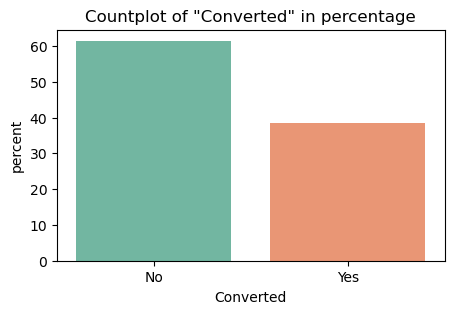

In [36]:
## Count plot of 'Converted'
plt.figure(figsize=(5,3))
sns.countplot(x='Converted',data=lead_scr_new, palette='Set2',stat='percent',orient='h')
plt.title(f'Countplot of "Converted" in percentage')
plt.show()

### <span style="color: black;">60% of Leads are not Converted ('No') and 40% are converted ('Yes'). Data is balanced and hence we can proceed for model building.</span>

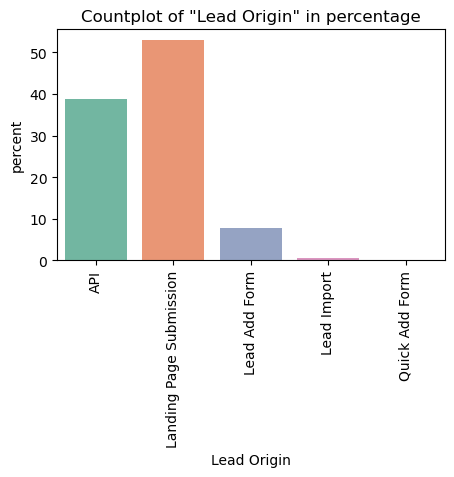

In [37]:
## Count plot of 'Lead Origin'
plt.figure(figsize=(5,3))
sns.countplot(x='Lead Origin',data=lead_scr_new, palette='Set2',stat='percent',orient='h')
plt.title(f'Countplot of "Lead Origin" in percentage')
plt.xticks(rotation=90)
plt.show()

### <span style="color: black;">'Quick Add Form' is very less and hence merged to 'API' to reduce data dimension in model building.</span>
### Highest number of Leads(52%) have their origin identified at 'Landing Page Submission'. 39% of Leads had their origin at 'API'.

In [38]:
## Replaced 'Quick Add Form' to 'API'.
lead_scr_new['Lead Origin'].replace('Quick Add Form','API',inplace=True)


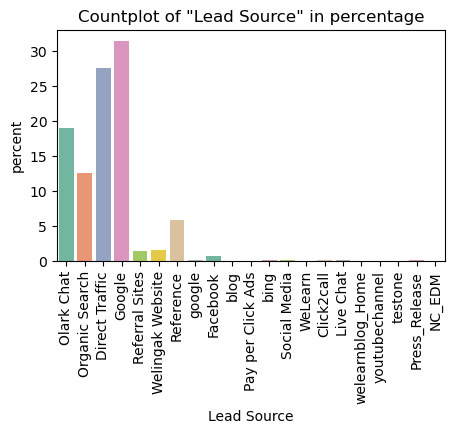

In [39]:
## Count plot of 'Lead Source'
plt.figure(figsize=(5,3))
sns.countplot(x='Lead Source',data=lead_scr_new, palette='Set2',stat='percent',orient='h')
plt.title(f'Countplot of "Lead Source" in percentage')
plt.xticks(rotation=90)
plt.show()

### <span style="color: black;">As there are numerous labels that have very less percentage data, clubbed them together and labelled as 'Others'.</span>
### <span style="color: black;">There are duplicate values present 'Google' and 'google'. Replaced 'google' to 'Google' to remove duplicacy.  </span>
### Highest Leads got the source of company from 'Google' (32%), followed by 'Direct Traffic' (27%) and third highest counts were sourced from 'Olark Chat' (19%).

In [40]:
## Merging less data lables and replaced to 'Others'.
lead_scr_new['Lead Source'].replace(['bing','Click2call','Press_Release','Social Media','Live Chat','youtubechannel','testone','Pay per Click Ads','welearnblog_Home','WeLearn','blog','NC_EDM'],'Others',inplace=True)

## Removed duplicate values and kept only 'Gogole'.
lead_scr_new['Lead Source'].replace('google','Google',inplace=True)

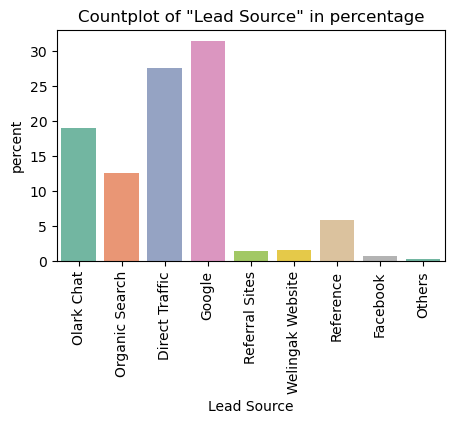

In [41]:
## Count plot of 'Lead Source' after making changes.
plt.figure(figsize=(5,3))
sns.countplot(x='Lead Source',data=lead_scr_new, palette='Set2',stat='percent',orient='h')
plt.title(f'Countplot of "Lead Source" in percentage')
plt.xticks(rotation=90)
plt.show()

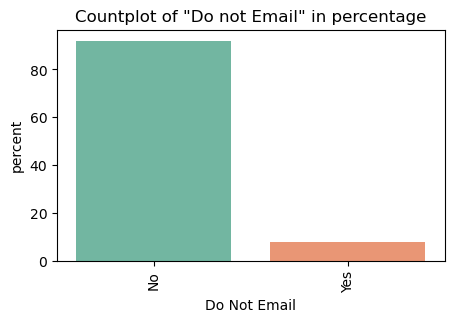

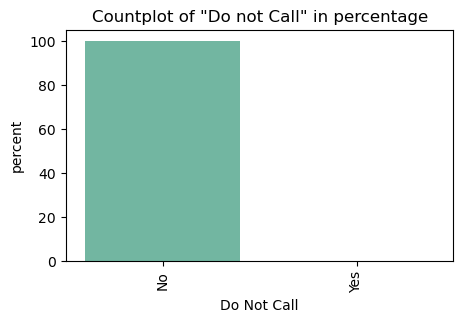

In [42]:
## Count plot of 'Do not Email' and 'Do not Call'
plt.figure(figsize=(5,3))
sns.countplot(x='Do Not Email',data=lead_scr_new, palette='Set2',stat='percent',orient='h')
plt.title(f'Countplot of "Do not Email" in percentage')
plt.xticks(rotation=90)
plt.show()
plt.figure(figsize=(5,3))
sns.countplot(x='Do Not Call',data=lead_scr_new, palette='Set2',stat='percent',orient='h')
plt.title(f'Countplot of "Do not Call" in percentage')
plt.xticks(rotation=90)
plt.show()

### <span style="color: black;">All leads have opted for 'Do not Call' as 'No'. Hence, it can be removed.  </span>

In [43]:
## Removed column 'Do Not Call' from data.
lead_scr_new=lead_scr_new.drop(columns=['Do Not Call'],axis=1)

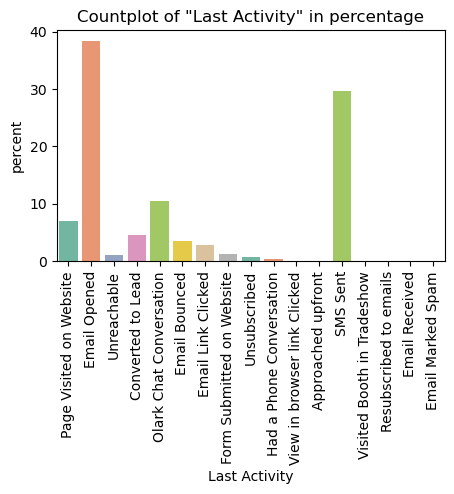

In [44]:
## Count plot of 'Last Activity'
plt.figure(figsize=(5,3))
sns.countplot(x='Last Activity',data=lead_scr_new, palette='Set2',stat='percent',orient='h')
plt.title(f'Countplot of "Last Activity" in percentage')
plt.xticks(rotation=90)
plt.show()

### <span style="color: black;">As there are numerous labels that have very less percentage data, clubbed them together and labelled as 'Others'.</span>

### 39% of Leads last Activity was 'Email Openend' which is highest. 30% of Leads sent SMS as their Last activity.

In [45]:
## Merging less data lables and replaced to 'Others'.
lead_scr_new['Last Activity'].replace(['Approached upfront','View in browser link Clicked','Email Received','Email Marked Spam','Visited Booth in Tradeshow','Resubscribed to emails'],'Others',inplace=True)


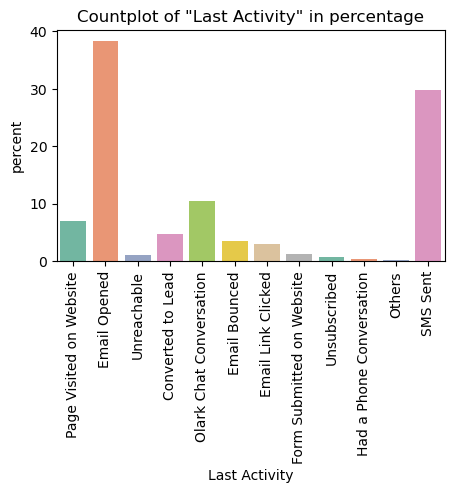

In [46]:
## Count plot of 'Last Activity' after making changes.
plt.figure(figsize=(5,3))
sns.countplot(x='Last Activity',data=lead_scr_new, palette='Set2',stat='percent',orient='h')
plt.title(f'Countplot of "Last Activity" in percentage')
plt.xticks(rotation=90)
plt.show()

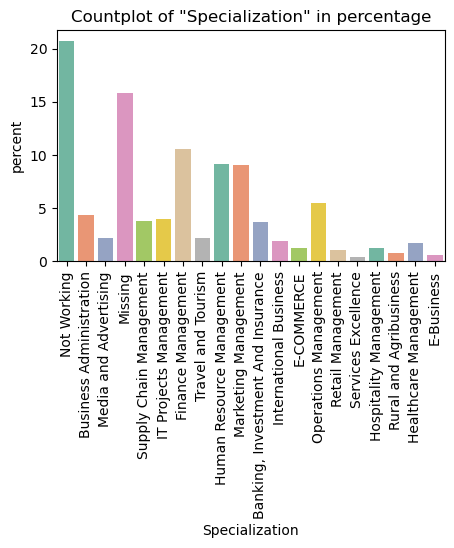

In [47]:
## Count plot of 'Specialization'
plt.figure(figsize=(5,3))
sns.countplot(x='Specialization',data=lead_scr_new, palette='Set2',stat='percent',orient='h')
plt.title(f'Countplot of "Specialization" in percentage')
plt.xticks(rotation=90)
plt.show()

### Data is uniformly distributed and hence no changes required. 21% of leads are 'Not Working'. 
### 12% of leads are from 'Finance Management' domain. 10% of leads are'HR Management' and 10% of leads are'Marketing Management' domain.   

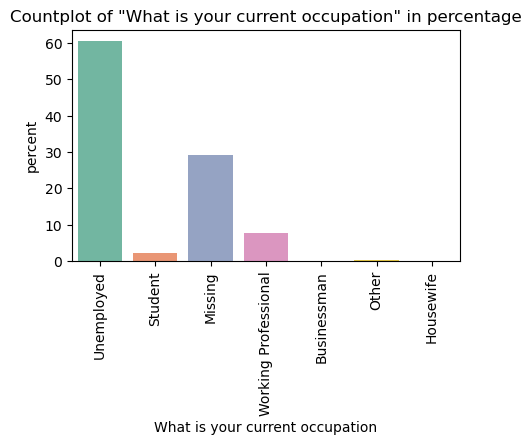

In [48]:
## Countplot of 'What is your current occupation'.

plt.figure(figsize=(5,3))
sns.countplot(x='What is your current occupation',data=lead_scr_new, palette='Set2',stat='percent',orient='h')
plt.title(f'Countplot of "What is your current occupation" in percentage')
plt.xticks(rotation=90)
plt.show()

### Around 9% of Leads are currently Working. Maximum Leads (60%) are unemployed. 
### Merged 'Businessman' and 'Housewife' to Other as they are very less in numbers.

In [49]:
## Merged 'Businessman' and 'Housewife' to Other
lead_scr_new['What is your current occupation'].replace(['Businessman','Housewife'],'Other',inplace=True)

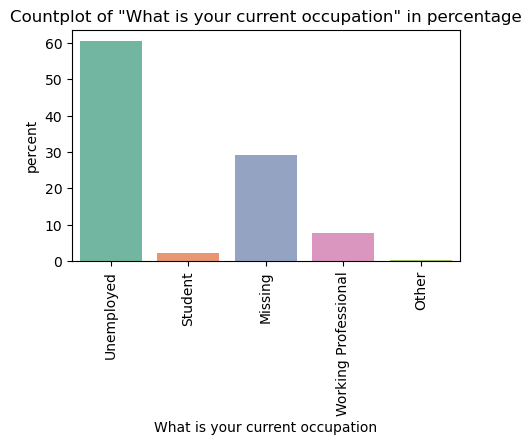

In [50]:
## Countplot of 'What is your current occupation' after making changes.

plt.figure(figsize=(5,3))
sns.countplot(x='What is your current occupation',data=lead_scr_new, palette='Set2',stat='percent',orient='h')
plt.title(f'Countplot of "What is your current occupation" in percentage')
plt.xticks(rotation=90)
plt.show()

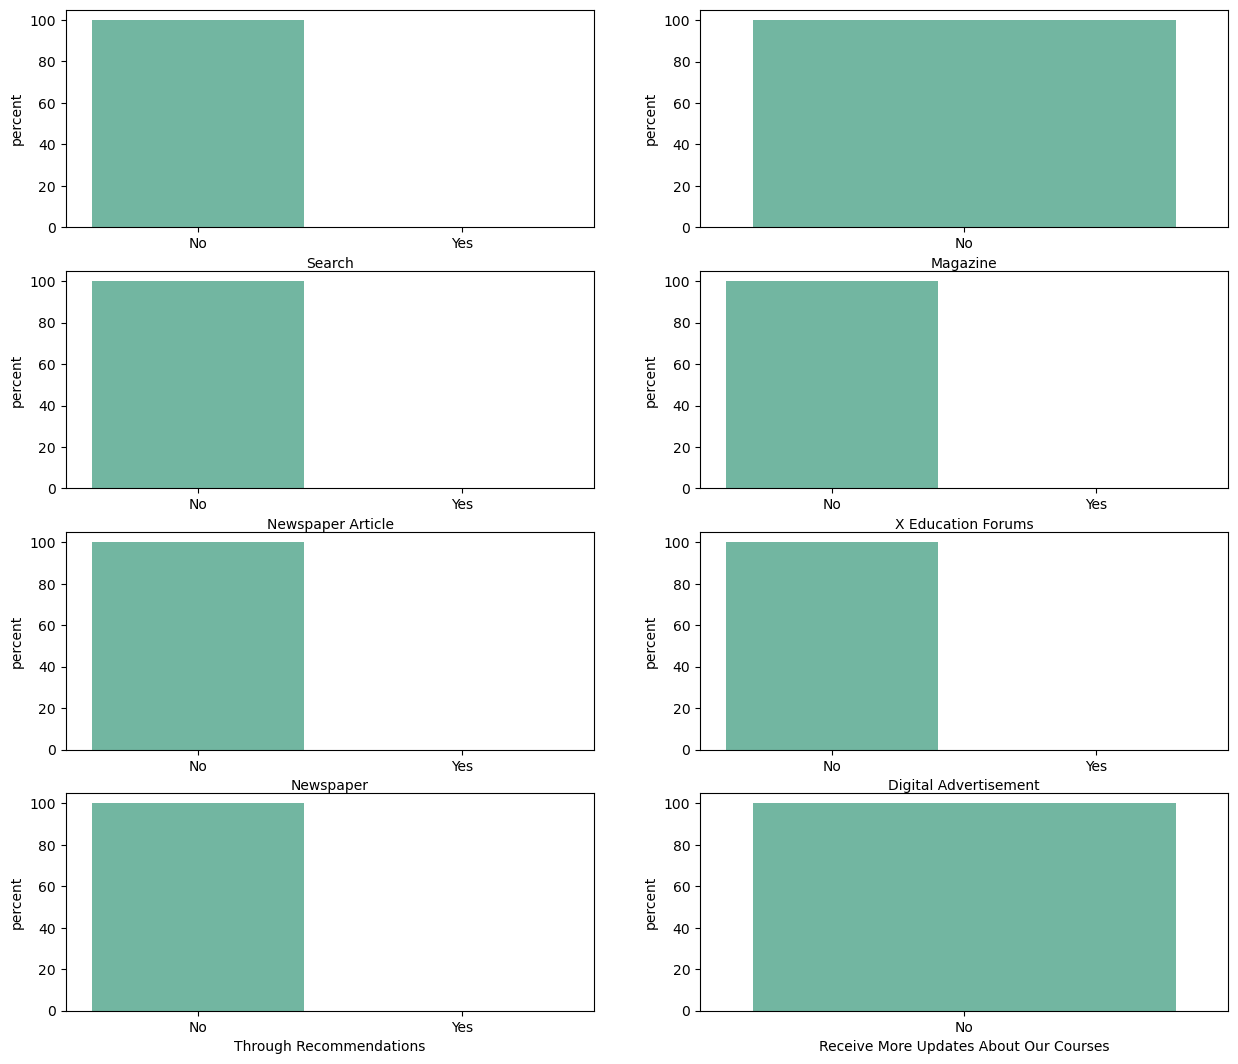

In [51]:
## Countplot of 'Search', 'Magazine', 'Newspaper Article' , 'X Education Forums', 'Newspaper', 
## 'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses'.

plt.figure(figsize=(15,13))
plt.subplot(4,2,1)
sns.countplot(x='Search',data=lead_scr_new, palette='Set2',stat='percent',orient='h')
plt.xticks(rotation=0)
plt.subplot(4,2,2)
sns.countplot(x='Magazine',data=lead_scr_new, palette='Set2',stat='percent',orient='h')
plt.xticks(rotation=0)
plt.subplot(4,2,3)
sns.countplot(x='Newspaper Article',data=lead_scr_new, palette='Set2',stat='percent',orient='h')
plt.xticks(rotation=0)
plt.subplot(4,2,4)
sns.countplot(x='X Education Forums',data=lead_scr_new, palette='Set2',stat='percent',orient='h')
plt.xticks(rotation=0)
plt.subplot(4,2,5)
sns.countplot(x='Newspaper',data=lead_scr_new, palette='Set2',stat='percent',orient='h')
plt.xticks(rotation=0)
plt.subplot(4,2,6)
sns.countplot(x='Digital Advertisement',data=lead_scr_new, palette='Set2',stat='percent',orient='h')
plt.xticks(rotation=0)
plt.subplot(4,2,7)
sns.countplot(x='Through Recommendations',data=lead_scr_new, palette='Set2',stat='percent',orient='h')
plt.xticks(rotation=0)
plt.subplot(4,2,8)
sns.countplot(x='Receive More Updates About Our Courses',data=lead_scr_new, palette='Set2',stat='percent',orient='h')
plt.xticks(rotation=0)
plt.show()

### All the variables 'Search', 'Magazine', 'Newspaper Article' , 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations' , 'Receive More Updates About Our Courses' are only having value 'No' and hence does not add any value.

### Removed 'Search', 'Magazine', 'Newspaper Article' , 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses' from data.

In [52]:
## Dropping columns 'Search', 'Magazine', 'Newspaper Article' , 'X Education Forums', 'Newspaper', 
## 'Digital Advertisement', 'Through Recommendations','Receive More Updates About Our Courses'

lead_scr_new=lead_scr_new.drop(columns=['Search', 'Magazine', 'Newspaper Article' , 'X Education Forums', 'Newspaper','Digital Advertisement', 'Through Recommendations','Receive More Updates About Our Courses'],axis=1)

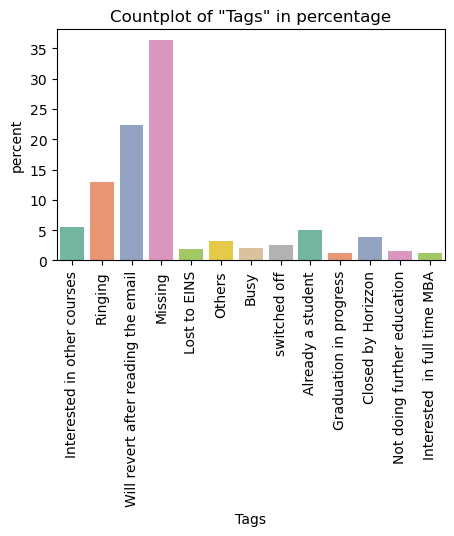

In [53]:
## Countplot of 'Tags'

plt.figure(figsize=(5,3))
sns.countplot(x='Tags',data=lead_scr_new, palette='Set2',stat='percent',orient='h')
plt.title(f'Countplot of "Tags" in percentage')
plt.xticks(rotation=90)
plt.show()

### 22% of Leads are tagged as 'Will revert after reading the email' followed by 14% Leads who are tagged as 'Ringing'.

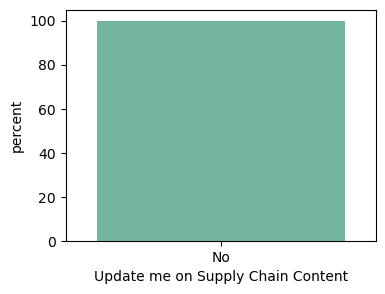

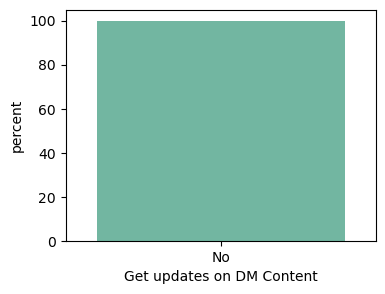

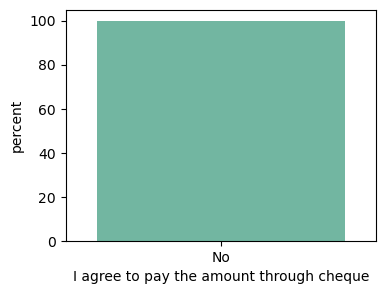

In [54]:
## Countplot of 'Update me on Supply Chain Content', 'Get updates on DM Content, 'I agree to pay the amount through cheque'.

plt.figure(figsize=(4,3))
sns.countplot(x='Update me on Supply Chain Content',data=lead_scr_new, palette='Set2',stat='percent',orient='h')
plt.xticks(rotation=0)
plt.show()
plt.figure(figsize=(4,3))
sns.countplot(x='Get updates on DM Content',data=lead_scr_new, palette='Set2',stat='percent',orient='h')
plt.xticks(rotation=0)
plt.show()
plt.figure(figsize=(4,3))
sns.countplot(x='I agree to pay the amount through cheque',data=lead_scr_new, palette='Set2',stat='percent',orient='h')
plt.xticks(rotation=0)
plt.show()

### Variables 'Update me on Supply Chain Content', 'Get updates on DM Content, 'I agree to pay the amount through cheque' are only having value 'No' and hence does not add any value.
### Removed Variables 'Update me on Supply Chain Content', 'Get updates on DM Content, 'I agree to pay the amount through cheque' are only having value 'No' and hence does not add any value from data.

In [55]:
## Dropping columns 'Update me on Supply Chain Content', 'Get updates on DM Content, 'I agree to pay the amount through cheque'.

lead_scr_new=lead_scr_new.drop(columns=['Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque'],axis=1)

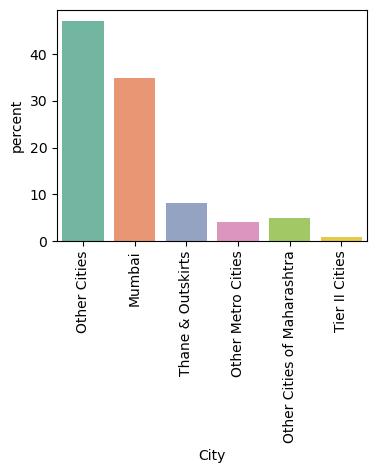

In [56]:
## Countplot of 'City'

plt.figure(figsize=(4,3))
sns.countplot(x='City',data=lead_scr_new, palette='Set2',stat='percent',orient='h')
plt.xticks(rotation=90)
plt.show()

### 35% of Leads are from Mumbai city.

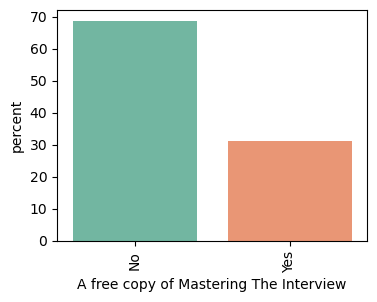

In [57]:
## Countplot of 'A free copy of Mastering The Interview'.

plt.figure(figsize=(4,3))
sns.countplot(x='A free copy of Mastering The Interview',data=lead_scr_new, palette='Set2',stat='percent',orient='h')
plt.xticks(rotation=90)
plt.show()

### 31% of Leads wanted a copy of book 'A free copy of Mastering The Interview' and 69% of Leads do not want copy of book.

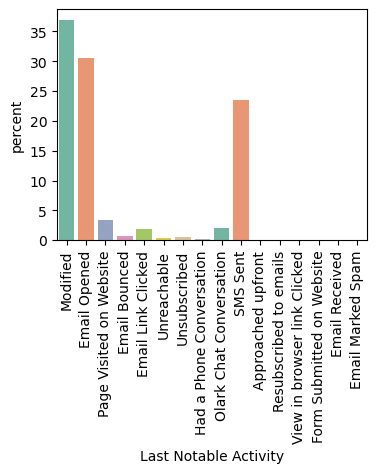

In [58]:
## Countplot of 'Last Notable Activity'.

plt.figure(figsize=(4,3))
sns.countplot(x='Last Notable Activity',data=lead_scr_new, palette='Set2',stat='percent',orient='h')
plt.xticks(rotation=90)
plt.show()

### Many label values are very few in numbers. Merged those to 'Other' label value.
### 37% of Leads had their Last Notable Activity recorded as 'Modified'. Second highest Leads(30%) had 'Email Opened' and 24% of Leads had their last activity as 'SMS Sent'.

In [59]:
## Merging less data lables and replaced to 'Others'.
lead_scr_new['Last Notable Activity'].replace(['Had a Phone Conversation','Email Marked Spam','Approached upfront','Resubscribed to emails','View in browser link Clicked','Form Submitted on Website','Email Received'],'Others',inplace=True)


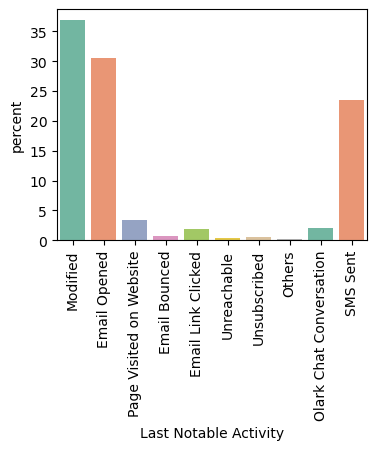

In [60]:
## Countplot of 'Last Notable Activity' after making changes.

plt.figure(figsize=(4,3))
sns.countplot(x='Last Notable Activity',data=lead_scr_new, palette='Set2',stat='percent',orient='h')
plt.xticks(rotation=90)
plt.show()

### Bivariate Analysis of Categoric Variables for both 'Converted' and 'Not Converted' Leads .

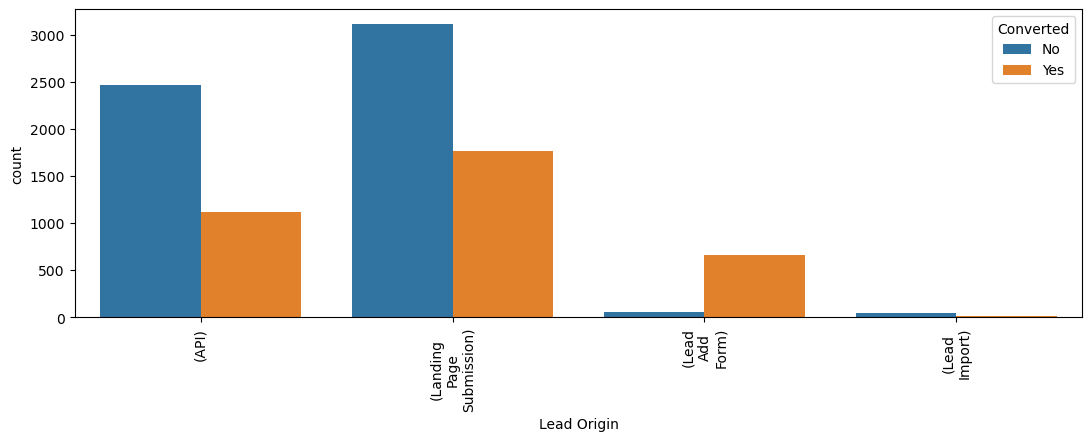

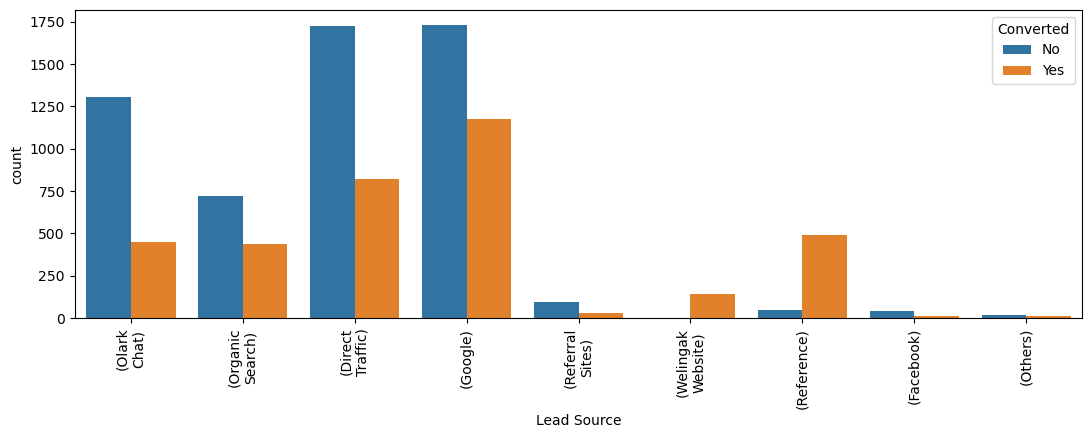

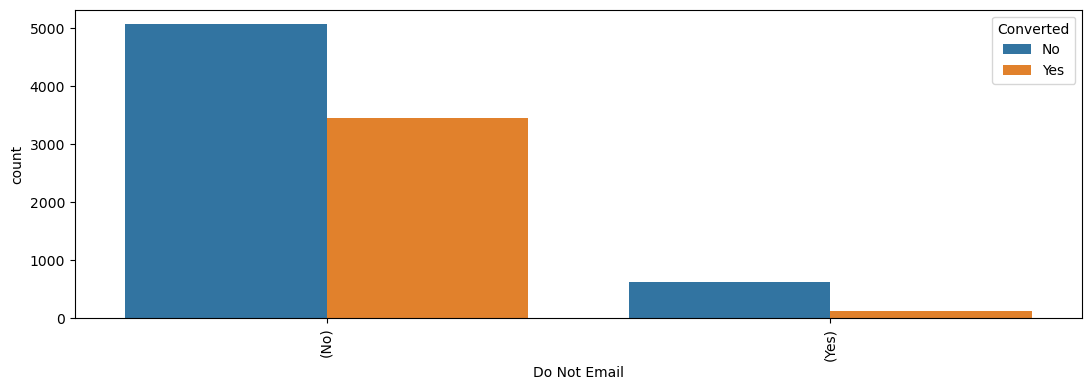

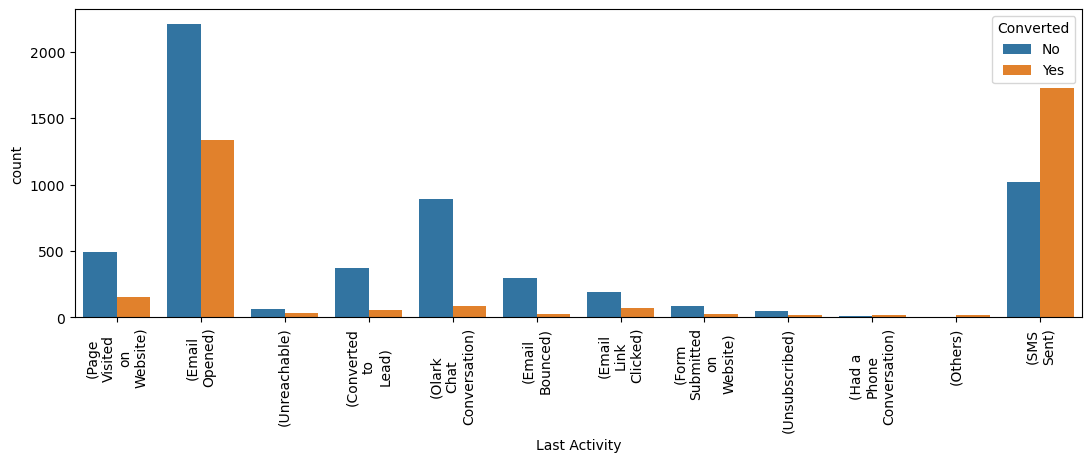

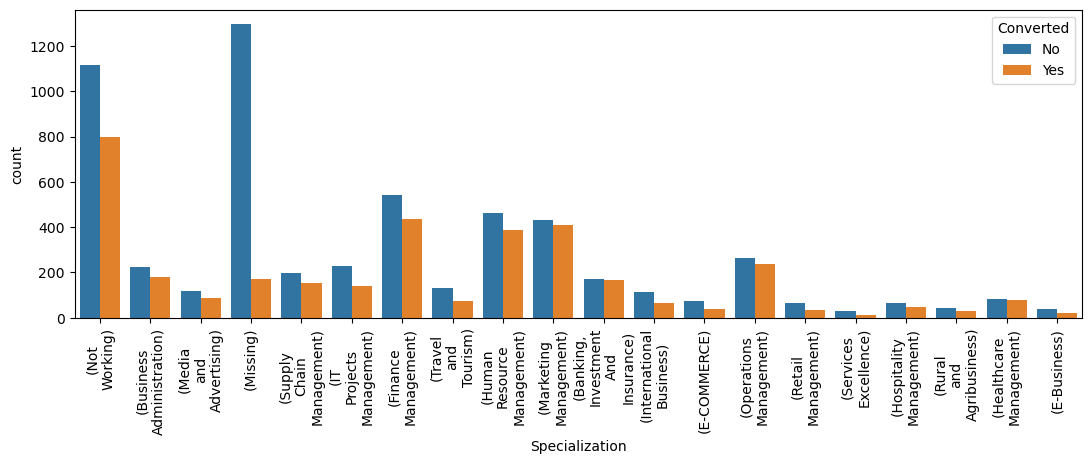

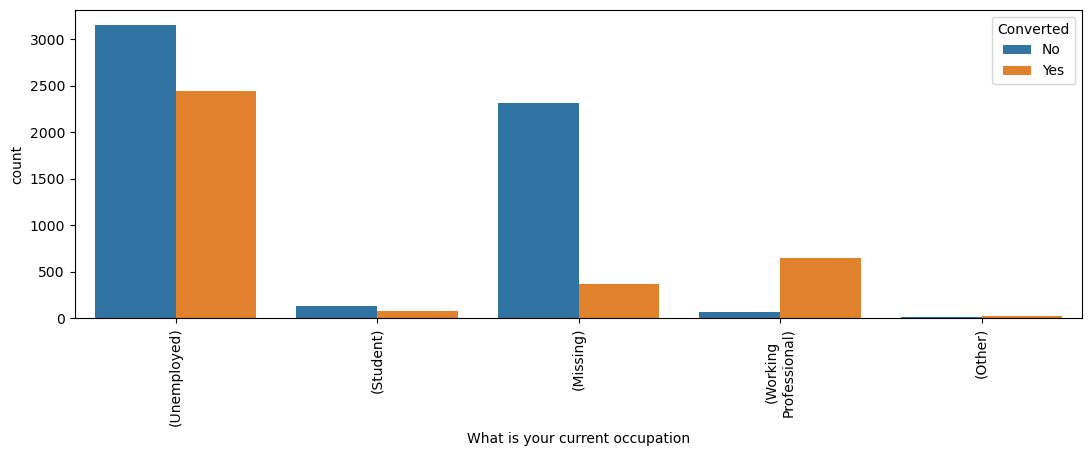

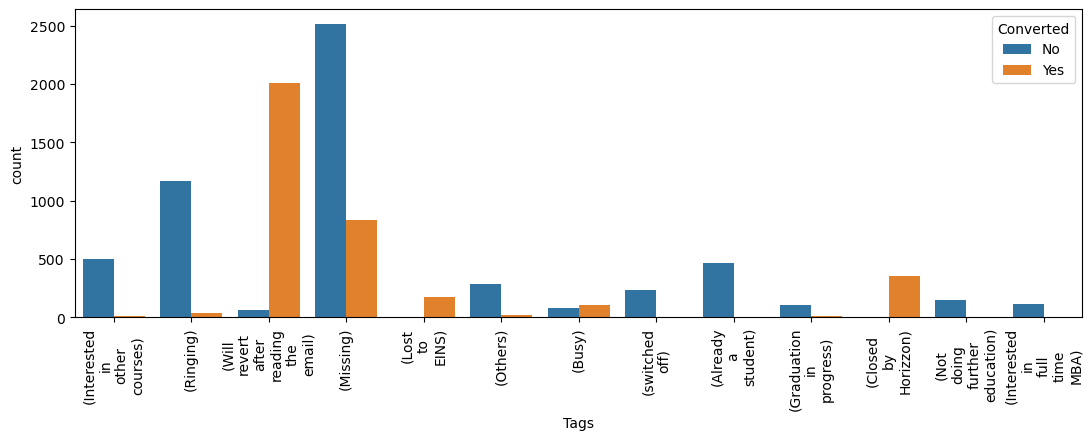

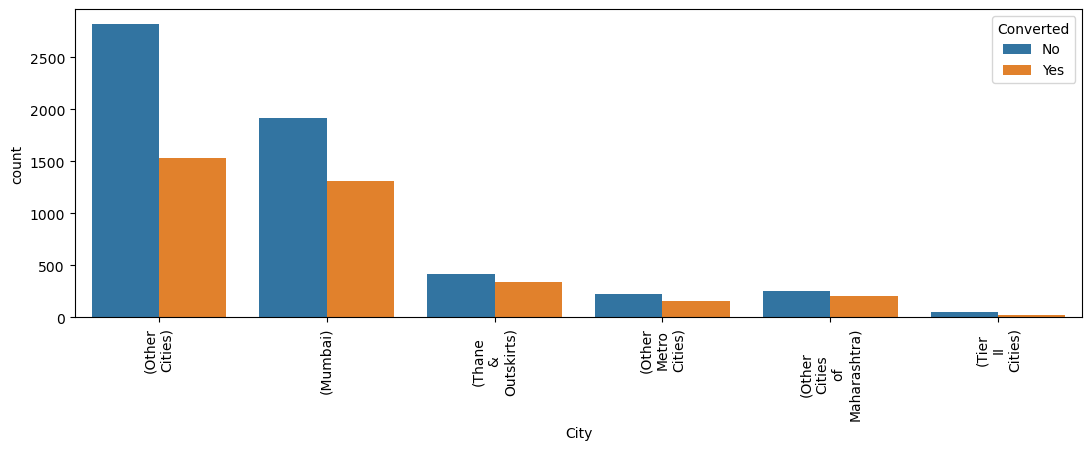

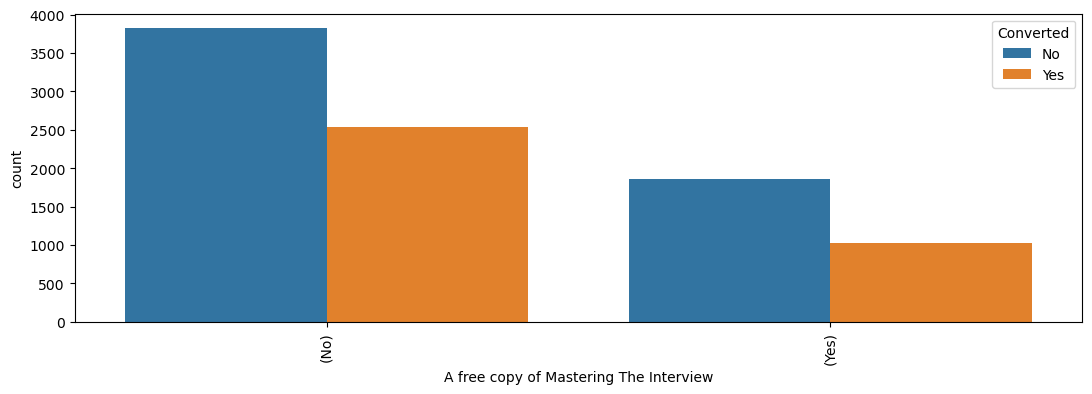

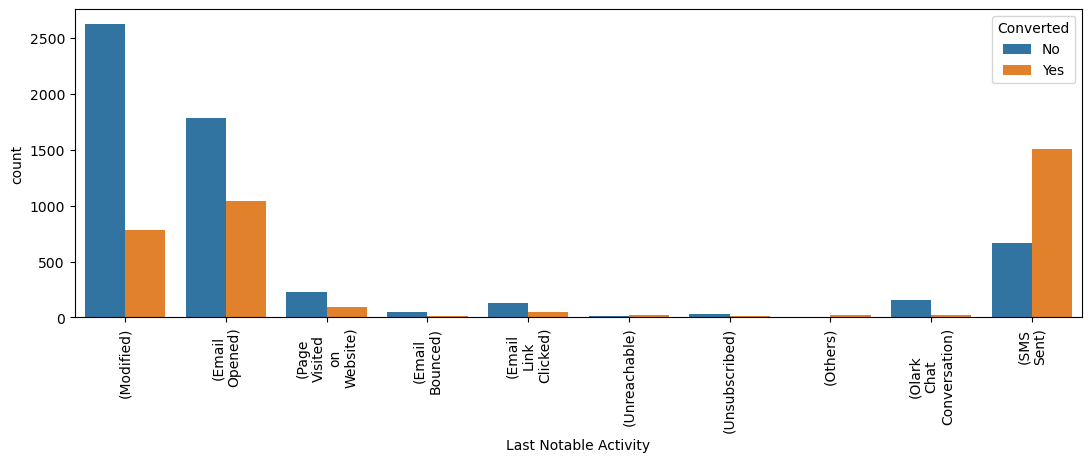

In [61]:
## Visualising categorical columns using countplot.

## Listing out final Categoric variables.
lead_scr_categoric_new = lead_scr_new.select_dtypes(include='object').columns

## Defining function to plot graph for categoric variable.

def categoric_graph(columns):
    plt.figure(figsize=(13,4))
    sns.countplot(x= columns, data=lead_scr_new, hue='Converted')
    axis = plt.gca()   ## Get current axes
    xtick_values = axis.get_xticklabels()  ## Get x axis label values.
    ## Using textwrap library to wrap x-axis label text for better visualisation. Wrap text only at spaces between words.
    xtick_wrapped_values = ['('+textwrap.fill(text.get_text(),width=5,break_long_words=False)+')' for text in xtick_values] 
    axis.set_xticklabels(xtick_wrapped_values, rotation=90) ## Set wrapped values back to x-axis label.
    plt.show()

for cols in lead_scr_categoric_new :
    if cols not in ['Prospect ID','Converted']:  ## To plot for all categorical columns except for Prospect id and converted.
        categoric_graph(cols)


## <span style="color: brown;"> Observation from 'Lead Origin' graph:- </span>
### <span style="color: black;">1. Total number of Customers whose lead origin identified by 'Landing Page submission' are highest than by 'API' and less number of customers lead are identified by 'Lead Add Form'. </span>
### <span style="color: black;">2. However, lead conversion rate are highest for 'Lead Add Form'. And, lead conversion rate are average for 'Landing Page submission' and 'API'.</span>


## <span style="color: brown;"> Observation from 'Lead Source' graph:- </span>
### <span style="color: black;">1. Maximum customer leads are from source 'Google' and from source 'Direct Traffic' are second highest followed by 'Reference' source and 'Olark Chat' source.</span>
### <span style="color: black;">2. Successful conversion rate are highest from 'Reference' source and second highest successful conversion rate are from 'Welingak Website'.
</span>


## <span style="color: brown;"> Observation from 'Do not email' graph:- </span>
### <span style="color: black;">1. Maximum leads opted for 'Do not Email' as 'No'.</span>



## <span style="color: brown;"> Observation from 'Last Activity' graph:- </span>
### <span style="color: black;">1. Customer leads with 'Email Opened' as last activity performed are highest in numbers followed by 'Sms Sent' , 'Olark Chat Conversation' and 'Page Visited on Website'.</span>
### <span style="color: black;">2. However, leads with last activity 'Sms sent' have Successful conversion rate.</span>


## <span style="color: brown;"> Observation from 'Specialization' graph:- </span>
### <span style="color: black;">1. Conversion rate is 50% in case of 'Banking, Investment and Insurance' and 'Healthcare Management'. Also, can see there is higher chance of successful conversion rate in 'Marketing Management' and 'Operations Management' specialization.</span>
### <span style="color: black;">2. However, highest leads are from 'Not Working' category that is they are either Student or Not working and then followed by 'Finance Management', HR Management and Marketing Management.
</span>


## <span style="color: brown;"> Observation from 'Current Occupation' graph:- </span>
### <span style="color: black;">1. Maximum lead count are 'Unemployed' and least lead counts are 'student'.</span>
### <span style="color: black;">2. Higher conversion rate are observed in 'Working Professional'. </span>


## <span style="color: brown;"> Observation from 'Tags' graph:- </span>
### <span style="color: black;">1. Highest Leads have missing details in Tags Followed by 'Will revert after reading the emails' and 'Ringing'.</span>
### <span style="color: black;"> 2. Conversion rate is highest for leads tagged as 'Will revert after reading the emails'.</span>

## <span style="color: brown;"> Observation from 'City' graph:- </span>
### <span style="color: black;">1. Most of the Leads are from 'Other Cities' and 'Mumbai'.</span>
## <span style="color: brown;"> Observation from 'a free copy of Mastering The Interview' graph:- </span>
### <span style="color: black;">1. Leads opted for 'No' are highest in number. Conversion rate is almost same for leads opted for both No and Yes.</span>


## <span style="color: brown;">observation from 'Last Notable Activity'.</span>
### <span style="color: black;">1. Customer leads with 'Modified' Last Notable Activity are maximum in count, followed by 'Email Opened' and 'SMS Sent'.</span>
### <span style="color: black;">2. Conversion Rate is highest in Leads with last notable activity as 'SMS Sent'.</span>



## <span style="color: brown;">Inferences from above Observation</span>
### <span style="color: black;">1. We need to focus on maximise lead conversion rate of 'Landing Page submission' and 'API' origin and focus to generate more leads from 'Lead Add form'.</span>
### <span style="color: black;">2. To maximise lead conversion rate of 'Olark chat', 'Organic Search', 'Direct Traffic' and 'google' source. We need to focus more on generating more leads from 'Reference' and 'Wellingak Website' as these sources show promising successful conversion.</span>
### <span style="color: black;">3. We need to increase lead conversion rate of 'Sms Sent' , 'Olark Chat Conversation' and 'Page Visited on Website' last activity and focus more on generating more leads from 'Sms sent'</span>
### <span style="color: black;">4. We should focus more on increasing leads in 'Business Administartion', 'Finance Management', 'HR Management', 'Marketing Management' and 'Operations Management'. To look for ways to increase lead conversaion rate  'Banking, Investment and Insurance', 'Healthcare Management', 'Marketing Management' and 'Operations Management'.</span>
### <span style="color: black;">5. We should focus more on increasing leads for 'Students' and 'Working Professional'. To look for ways to increase lead conversation rate  for Students and Unemployed.</span>


### Univariate Analysis of Numeric Variables and Handling Outliers .

In [62]:
## Listing out numeric variables.

lead_scr_numeric = lead_scr_new.select_dtypes(include=['int','float']).columns
print('Below are list of all Numeric Variables :\n',lead_scr_numeric)


Below are list of all Numeric Variables :
 Index(['Lead Number', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit'],
      dtype='object')


In [63]:
## To check Lead Numbers are having unique values.

unique_lead_num = lead_scr_new['Lead Number'].unique().shape[0]
print(f'Total Unique count of Leads are :{unique_lead_num}') 


Total Unique count of Leads are :9240


### Total unique Lead numbers are matching total number of records and hence there are no duplicate enrty.


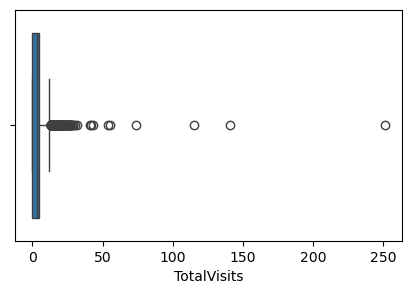

In [64]:
## Boxplot of TotalVisits.

plt.figure(figsize=(5,3))
sns.boxplot(x='TotalVisits' , data=lead_scr_new)
plt.show()

### Can see there are many outliers in Total Visits which needs to be handled before analysis.

In [65]:
## To check unique values in Total Visits.

lead_scr_new['TotalVisits'].quantile([0.05,0.25,0.50,0.75,0.80,0.85,0.90,0.95,0.98])

0.05     0.0
0.25     0.0
0.50     3.0
0.75     5.0
0.80     5.0
0.85     6.0
0.90     7.0
0.95    10.0
0.98    13.0
Name: TotalVisits, dtype: float64

### 98% of Leads have total 13 Visits on website. Capping all higher outliers values to 98% value.

In [66]:
## Capping Total Visits more than 13 to its 98% of data.
lead_scr_new.loc[lead_scr_new['TotalVisits']>13,'TotalVisits']=13

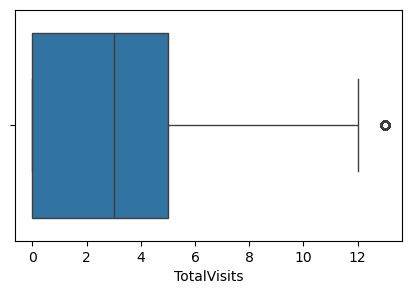

In [67]:
## Boxplot of TotalVisits after handling outliers.

plt.figure(figsize=(5,3))
sns.boxplot(x='TotalVisits' , data=lead_scr_new)
plt.show()

### 25% of Leads had 0 TotalVisits. 50% of Leads had less than or equal to 3 TotalVisits and 75% of Leads had less than or equal to 5 Total Visits.

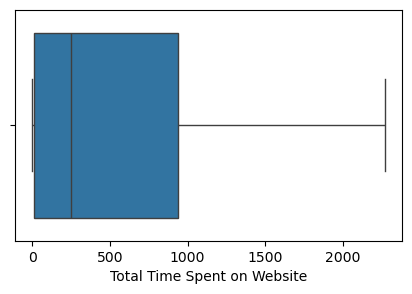

In [68]:
## Boxplot of Total Time Spent on Website.

plt.figure(figsize=(5,3))
sns.boxplot(x='Total Time Spent on Website' , data=lead_scr_new)
plt.show()

### There are no outliers in 'Total time spent on Website'.

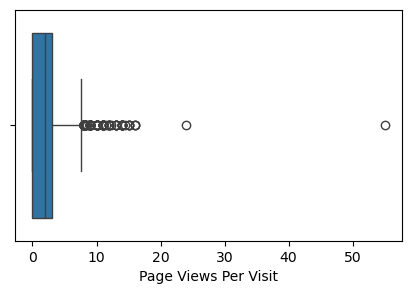

In [69]:
## Boxplot of Page Views Per Visit.

plt.figure(figsize=(5,3))
sns.boxplot(x='Page Views Per Visit' , data=lead_scr_new)
plt.show()


### Can see there are many outliers in Page Views per Visit which needs to be handled before analysis.

In [70]:
## To check unique values in Page Views per Visit.

lead_scr_new['Page Views Per Visit'].quantile([0.05,0.25,0.50,0.75,0.80,0.85,0.90,0.95,0.98])

0.05    0.0
0.25    0.0
0.50    2.0
0.75    3.0
0.80    4.0
0.85    4.0
0.90    5.0
0.95    6.0
0.98    8.0
Name: Page Views Per Visit, dtype: float64

### 98% of Leads have total 8 Page Views per Visit. Capping all higher outliers values to 98% value.

In [71]:
## Capping Total Visits more than 8 to its 98% of data.
lead_scr_new.loc[lead_scr_new['Page Views Per Visit']>8,'Page Views Per Visit']=8

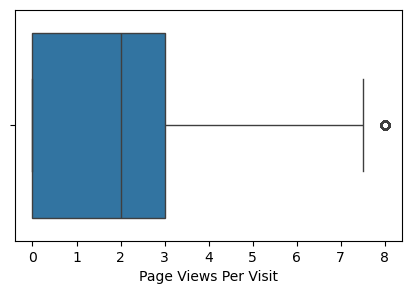

In [72]:
## Boxplot of Page Views Per Visit after handling outliers.

plt.figure(figsize=(5,3))
sns.boxplot(x='Page Views Per Visit' , data=lead_scr_new)
plt.show()

### 25% of Leads did not view webiste page. 50% of Leads had viewed less than or equal to 2 pages per visit. 75% of Leads had less than or equal to 3 page views per visit.

### Bivariate Analysis of Numeric Variables.

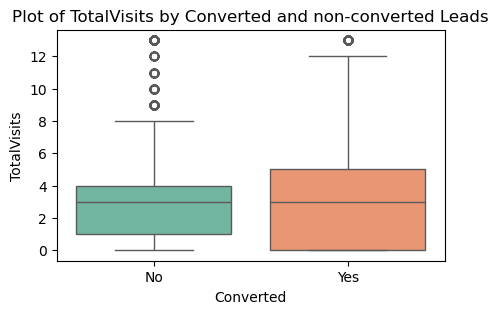

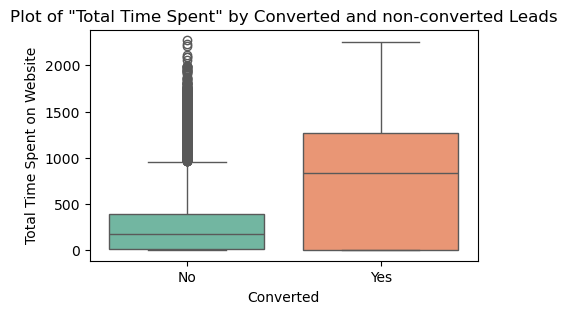

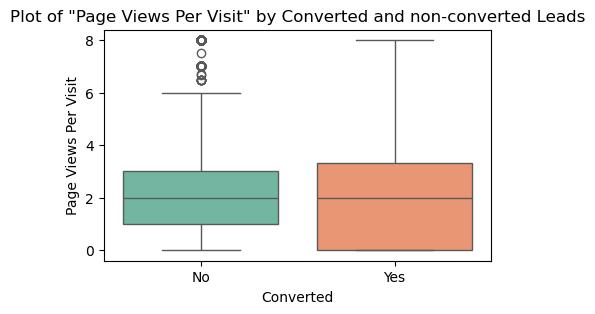

In [73]:
## Boxplot to check pattern of 'TotalVisits', 'Total Time Spent on Website' and 'Page Views Per Visit' 
## for converted and non-converted Leads.

plt.figure(figsize=(5,3))
sns.boxplot(x='Converted', y='TotalVisits', data=lead_scr_new, palette = 'Set2')
plt.title('Plot of TotalVisits by Converted and non-converted Leads')
plt.show()


plt.figure(figsize=(5,3))
sns.boxplot(x='Converted', y='Total Time Spent on Website', data=lead_scr_new, palette = 'Set2')
plt.title('Plot of "Total Time Spent" by Converted and non-converted Leads')
plt.show()

plt.figure(figsize=(5,3))
sns.boxplot(x='Converted', y='Page Views Per Visit', data=lead_scr_new, palette = 'Set2')
plt.title('Plot of "Page Views Per Visit" by Converted and non-converted Leads')
plt.show()

## <span style="color: brown;">Inferences from above Numeric Variable Analysis</span>
### <span style="color: black;">1. Converted Leads tend to spend more time on Website and also they view more pages and visit more websites as compared to non-converted customers.</span>
### <span style="color: black;"> 2. We should focus more on Leads who spends greater amount of time on Website, visits more websites and visits more pages as they tend to become converted customers.

<Figure size 2000x1500 with 0 Axes>

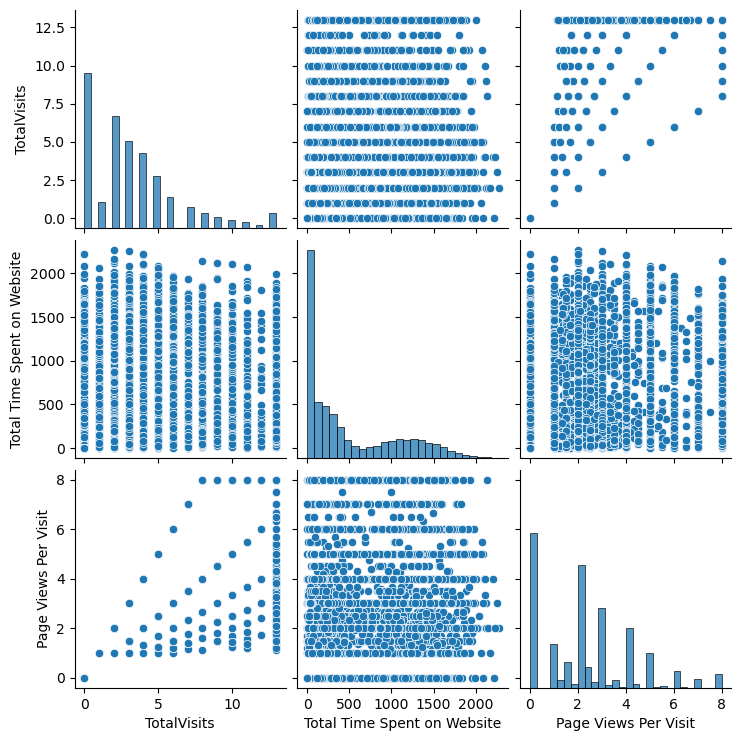

In [74]:
## Pair Plot of numerical variable to visualise data.

plt.figure(figsize=(20,15))
sns.pairplot(lead_scr_new[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])
plt.show()

## <span style="color: brown;"> Findings from Pairplot: </span>
### <span style="color: black;">We can see there is a positive linear relationship between Total Visits and Page Views Per visit.</span>
### <span style="color: black;">We can infer that as Total Visits of Website increases, number of Page Views also increases.</span>

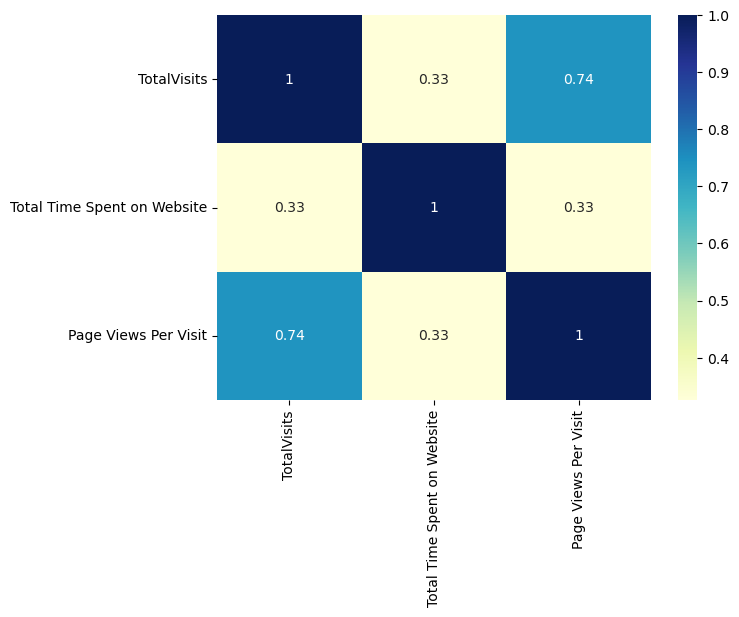

In [75]:
### To find co-relation between variables using Heatmap.

plt.figure(figsize=(7,5))

lead_scr_corr = lead_scr_new[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']].corr()
sns.heatmap(data= lead_scr_corr, annot= True, cmap = 'YlGnBu' )
plt.show()

## <span style="color: brown;"> Observation from Heatmap:</span>
### 1. Total Visits and Page Views Per Visit are strongly positively co-related.
### 2. Total Time Spent on Websites and Page Views Per Visit are weakly positively co-related.

## Step Five : Preparation of Data.

In [76]:
## Checking unique label values of all variables.

for cols in lead_scr_new.columns:
    print(lead_scr_new[cols].value_counts(),'\n')

Prospect ID
7927b2df-8bba-4d29-b9a2-b6e0beafe620    1
22e9d4ef-d294-4ebf-81c7-7c7a1105aeea    1
46befc49-253a-419b-abea-2fd978d2e2b1    1
9d35a2c2-09d8-439f-9875-0e8bbf267f5a    1
f0de9371-4dc2-48c2-9785-a08d6fc4fcb5    1
                                       ..
ff1f7582-cb7b-4b94-9cdc-3d0d0afdd9a3    1
644099a2-3da4-4d23-9546-7676340a372b    1
2a093175-415b-4321-9e69-ed8d9df65a3c    1
c66249a3-8500-4c66-a511-312d914573de    1
571b5c8e-a5b2-4d57-8574-f2ffb06fdeff    1
Name: count, Length: 9240, dtype: int64 

Lead Number
660737    1
603303    1
602561    1
602557    1
602540    1
         ..
630422    1
630405    1
630403    1
630390    1
579533    1
Name: count, Length: 9240, dtype: int64 

Lead Origin
Landing Page Submission    4886
API                        3581
Lead Add Form               718
Lead Import                  55
Name: count, dtype: int64 

Lead Source
Google              2909
Direct Traffic      2543
Olark Chat          1755
Organic Search      1154
Reference         

In [77]:
## Mapping Yes and No labels to binary values for Categroical columns 'Do Not Email','Converted','A free copy of Mastering The Interview'
## using function.

def bin_map(cols):
    if cols =='Yes':
        val= 1
    else:
        val= 0
    return val

for columns in ['Do Not Email','Converted','A free copy of Mastering The Interview']:
    lead_scr_new[columns] = lead_scr_new[columns].apply(bin_map)

In [78]:
lead_scr_new.shape ## We now have total 16 columns.

(9240, 16)

In [79]:
lead_scr_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 16 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Prospect ID                             9240 non-null   object 
 1   Lead Number                             9240 non-null   int64  
 2   Lead Origin                             9240 non-null   object 
 3   Lead Source                             9240 non-null   object 
 4   Do Not Email                            9240 non-null   int64  
 5   Converted                               9240 non-null   int64  
 6   TotalVisits                             9240 non-null   float64
 7   Total Time Spent on Website             9240 non-null   int64  
 8   Page Views Per Visit                    9240 non-null   float64
 9   Last Activity                           9240 non-null   object 
 10  Specialization                          9240 non-null   obje

### Creating dummy variables of object type variables.

In [80]:
## Listing object type data types.
print(lead_scr_new.select_dtypes(include=['object']).columns)

##Dummy variable creation.
lead_scr_dummy1 = pd.get_dummies(lead_scr_new[['Lead Origin','Lead Source', 'Last Activity','Specialization', 'What is your current occupation', 'Tags', 'City','Last Notable Activity']],dtype = "int", drop_first= True)
lead_scr_dummy1.head()

Index(['Prospect ID', 'Lead Origin', 'Lead Source', 'Last Activity',
       'Specialization', 'What is your current occupation', 'Tags', 'City',
       'Last Notable Activity'],
      dtype='object')


Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
0                                    0                          0   
1                                    0                          0   
2                                    1                          0   
3                                    1                          0   
4                                    1                          0   

   Lead Origin_Lead Import  Lead Source_Facebook  Lead Source_Google  \
0                        0                     0                   0   
1                        0                     0                   0   
2                        0                     0                   0   
3                        0                     0                   0   
4                        0                     0                   1   

   Lead Source_Olark Chat  Lead Source_Organic Search  Lead Source_Others  \
0                       1                           0                   0   
1                       0                           1                   0   
2                       0                           0                   0   
3                       0                           0                   0   
4                       0                           0                   0   

   Lead Source_Reference  Lead Source_Referral Sites  ...  \
0                      0                           0  ...   
1                      0                           0  ...   
2                      0                           0  ...   
3                      0                           0  ...   
4                      0                           0  ...   

   City_Tier II Cities  Last Notable Activity_Email Link Clicked  \
0                    0                                         0   
1                    0                                         0   
2                    0                                         0   
3                    0                                         0   
4                    0                                         0   

   Last Notable Activity_Email Opened  Last Notable Activity_Modified  \
0                                   0                               1   
1                                   1                               0   
2                                   1                               0   
3                                   0                               1   
4                                   0                               1   

   Last Notable Activity_Olark Chat Conversation  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   Last Notable Activity_Others  \
0                             0   
1                             0   
2                             0   
3                             0   
4                             0   

   Last Notable Activity_Page Visited on Website  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   Last Notable Activity_SMS Sent  Last Notable Activity_Unreachable  \
0                               0                                  0   
1                               0                                  0   
2                               0                                  0   
3                               0                                  0   
4                               0                                  0   

   Last Notable Activity_Unsubscribed  
0                                   0  
1                                   0  
2                                   0  
3                                   0  
4      

In [81]:
### Merging dummy variables created to main daatset.
lead_scr_new = pd.concat([lead_scr_new,lead_scr_dummy1],axis=1)


In [82]:
### Removing repeated variables.
lead_scr_new=lead_scr_new.drop(columns=['Lead Origin','Lead Source', 'Last Activity','Specialization', 'What is your current occupation', 'Tags', 'City','Last Notable Activity'],axis=1)

In [83]:
### Removing 'Prospect ID' and 'Lead Number' as they are unique Lead identifier and hence not required in model building.
lead_scr_new=lead_scr_new.drop(columns=['Prospect ID','Lead Number'],axis=1)

In [84]:
### Converting all variables to float type for easy interpretation of data.
lead_scr_new = lead_scr_new.astype(float)

In [85]:
lead_scr_new.info() ## Now we have all float data types.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 77 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Do Not Email                                          9240 non-null   float64
 1   Converted                                             9240 non-null   float64
 2   TotalVisits                                           9240 non-null   float64
 3   Total Time Spent on Website                           9240 non-null   float64
 4   Page Views Per Visit                                  9240 non-null   float64
 5   A free copy of Mastering The Interview                9240 non-null   float64
 6   Lead Origin_Landing Page Submission                   9240 non-null   float64
 7   Lead Origin_Lead Add Form                             9240 non-null   float64
 8   Lead Origin_Lead Import                               9240

### Now all data are cleaned and preparation of Data is completed.

## Step Six : Train and Test Split.

In [86]:
## Segregating X Features and y Features. 

lead_scr_X = lead_scr_new.drop(columns=['Converted'],axis=1)
lead_scr_y = lead_scr_new['Converted']

In [87]:
lead_scr_X.head()

Do Not Email  TotalVisits  Total Time Spent on Website  \
0           0.0          0.0                          0.0   
1           0.0          5.0                        674.0   
2           0.0          2.0                       1532.0   
3           0.0          1.0                        305.0   
4           0.0          2.0                       1428.0   

   Page Views Per Visit  A free copy of Mastering The Interview  \
0                   0.0                                     0.0   
1                   2.5                                     0.0   
2                   2.0                                     1.0   
3                   1.0                                     0.0   
4                   1.0                                     0.0   

   Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
0                                  0.0                        0.0   
1                                  0.0                        0.0   
2                                  1.0                        0.0   
3                                  1.0                        0.0   
4                                  1.0                        0.0   

   Lead Origin_Lead Import  Lead Source_Facebook  Lead Source_Google  ...  \
0                      0.0                   0.0                 0.0  ...   
1                      0.0                   0.0                 0.0  ...   
2                      0.0                   0.0                 0.0  ...   
3                      0.0                   0.0                 0.0  ...   
4                      0.0                   0.0                 1.0  ...   

   City_Tier II Cities  Last Notable Activity_Email Link Clicked  \
0                  0.0                                       0.0   
1                  0.0                                       0.0   
2                  0.0                                       0.0   
3                  0.0                                       0.0   
4                  0.0                                       0.0   

   Last Notable Activity_Email Opened  Last Notable Activity_Modified  \
0                                 0.0                             1.0   
1                                 1.0                             0.0   
2                                 1.0                             0.0   
3                                 0.0                             1.0   
4                                 0.0                             1.0   

   Last Notable Activity_Olark Chat Conversation  \
0                                            0.0   
1                                            0.0   
2                                            0.0   
3                                            0.0   
4                                            0.0   

   Last Notable Activity_Others  \
0                           0.0   
1                           0.0   
2                           0.0   
3                           0.0   
4                           0.0   

   Last Notable Activity_Page Visited on Website  \
0                                            0.0   
1                                            0.0   
2                                            0.0   
3                                            0.0   
4                                            0.0   

   Last Notable Activity_SMS Sent  Last Notable Activity_Unreachable  \
0                             0.0                                0.0   
1                             0.0                                0.0   
2                             0.0                                0.0   
3                             0.0                                0.0   
4                             0.0                                0.0   

   Last Notable Activity_Unsubscribed  
0                                 0.0  
1                                 0.0  
2                                 0.0  
3                                 0.0  
4                                 0.0

In [88]:
lead_scr_y.head()

0    0.0
1    0.0
2    1.0
3    0.0
4    1.0
Name: Converted, dtype: float64

In [89]:
## Splitting data into Train and Test dataset.

lead_scr_X_train,lead_scr_X_test,lead_scr_y_train,lead_scr_y_test = train_test_split(lead_scr_X, lead_scr_y, train_size=0.7, test_size=0.3, random_state=100)

In [90]:
## Checking number of records in train and test

print('Total records in original dataset :',lead_scr_X.shape)
print('Total records in train dataset :',lead_scr_X_train.shape)
print('Total records in test dataset :',lead_scr_X_test.shape)



Total records in original dataset : (9240, 76)
Total records in train dataset : (6468, 76)
Total records in test dataset : (2772, 76)


In [91]:
## Checking Conversion rate from data.

print('Conversion rate in percentage :',round(lead_scr_new['Converted'].sum()/lead_scr_new.shape[0]*100,2))


Conversion rate in percentage : 38.54


### Conversion rate is 38.5% which is good data balance to proceed for building model.

## Step Seven : Standardizing Features.

In [92]:
## Scaling Features using Standard scaler.

## Instantiating object.
scaler = StandardScaler()
lead_scr_X_train[['TotalVisits', 'Total Time Spent on Website','Page Views Per Visit']]=scaler.fit_transform(lead_scr_X_train[['TotalVisits', 'Total Time Spent on Website','Page Views Per Visit']])
lead_scr_X_train.head()

Do Not Email  TotalVisits  Total Time Spent on Website  \
1871           0.0    -1.054996                    -0.885371   
6795           0.0     0.254612                     0.005716   
3516           0.0     0.582014                    -0.691418   
8105           0.0     0.582014                     1.365219   
3934           0.0    -1.054996                    -0.885371   

      Page Views Per Visit  A free copy of Mastering The Interview  \
1871             -1.171392                                     0.0   
6795             -0.486490                                     1.0   
3516              0.116018                                     0.0   
8105              1.403428                                     0.0   
3934             -1.171392                                     0.0   

      Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
1871                                  0.0                        0.0   
6795                                  1.0                        0.0   
3516                                  0.0                        0.0   
8105                                  1.0                        0.0   
3934                                  0.0                        0.0   

      Lead Origin_Lead Import  Lead Source_Facebook  Lead Source_Google  ...  \
1871                      0.0                   0.0                 0.0  ...   
6795                      0.0                   0.0                 0.0  ...   
3516                      0.0                   0.0                 0.0  ...   
8105                      0.0                   0.0                 1.0  ...   
3934                      0.0                   0.0                 0.0  ...   

      City_Tier II Cities  Last Notable Activity_Email Link Clicked  \
1871                  0.0                                       0.0   
6795                  0.0                                       0.0   
3516                  0.0                                       0.0   
8105                  0.0                                       0.0   
3934                  0.0                                       0.0   

      Last Notable Activity_Email Opened  Last Notable Activity_Modified  \
1871                                 1.0                             0.0   
6795                                 1.0                             0.0   
3516                                 1.0                             0.0   
8105                                 0.0                             0.0   
3934                                 0.0                             1.0   

      Last Notable Activity_Olark Chat Conversation  \
1871                                            0.0   
6795                                            0.0   
3516                                            0.0   
8105                                            0.0   
3934                                            0.0   

      Last Notable Activity_Others  \
1871                           0.0   
6795                           0.0   
3516                           0.0   
8105                           0.0   
3934                           0.0   

      Last Notable Activity_Page Visited on Website  \
1871                                            0.0   
6795                                            0.0   
3516                                            0.0   
8105                                            0.0   
3934                                            0.0   

      Last Notable Activity_SMS Sent  Last Notable Activity_Unreachable  \
1871                             0.0                                0.0   
6795                             0.0                                0.0   
3516                             0.0                                0.0   
8105                             1.0                                0.0   
3934                             0.0                                0.0   

      Last Notable Activity_Unsubscribed  
1871             

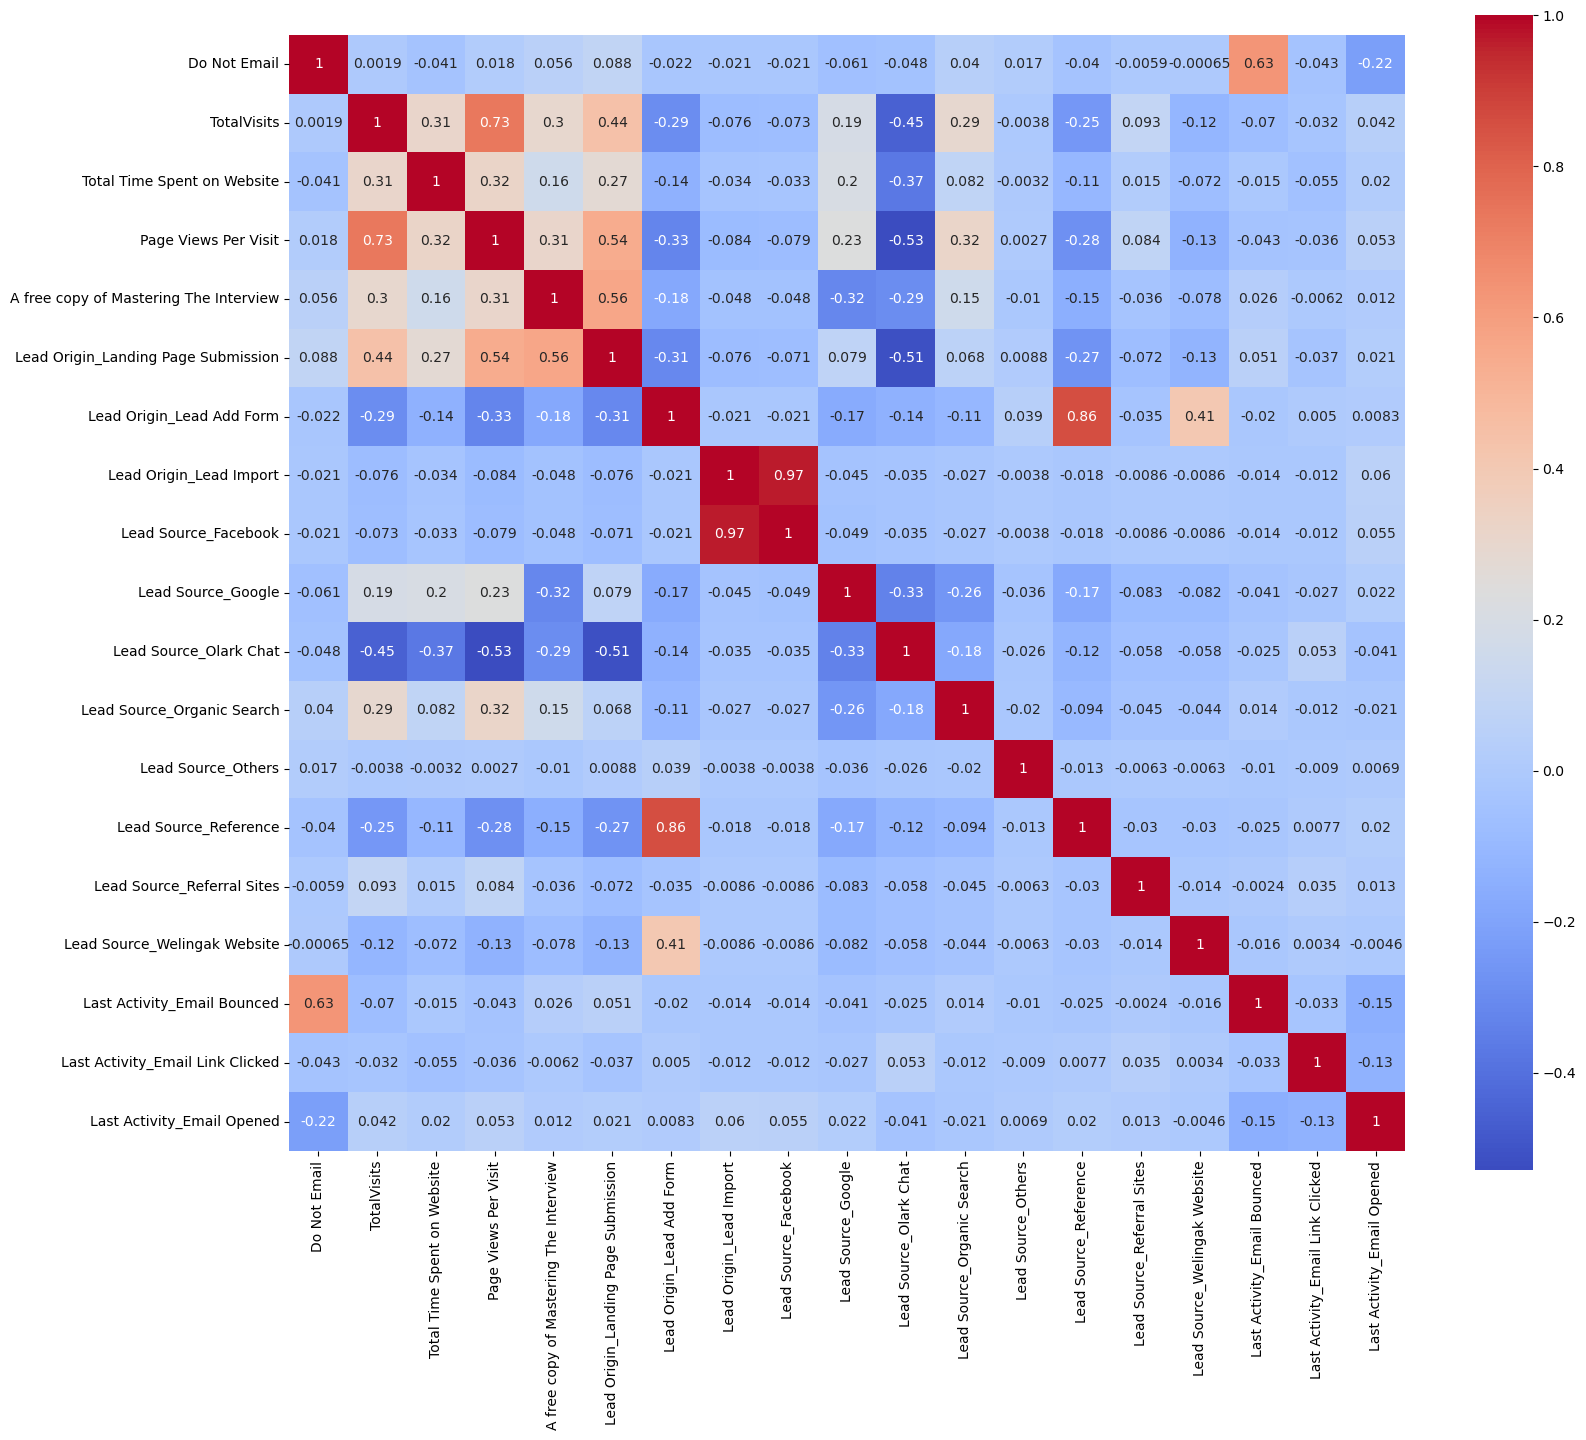

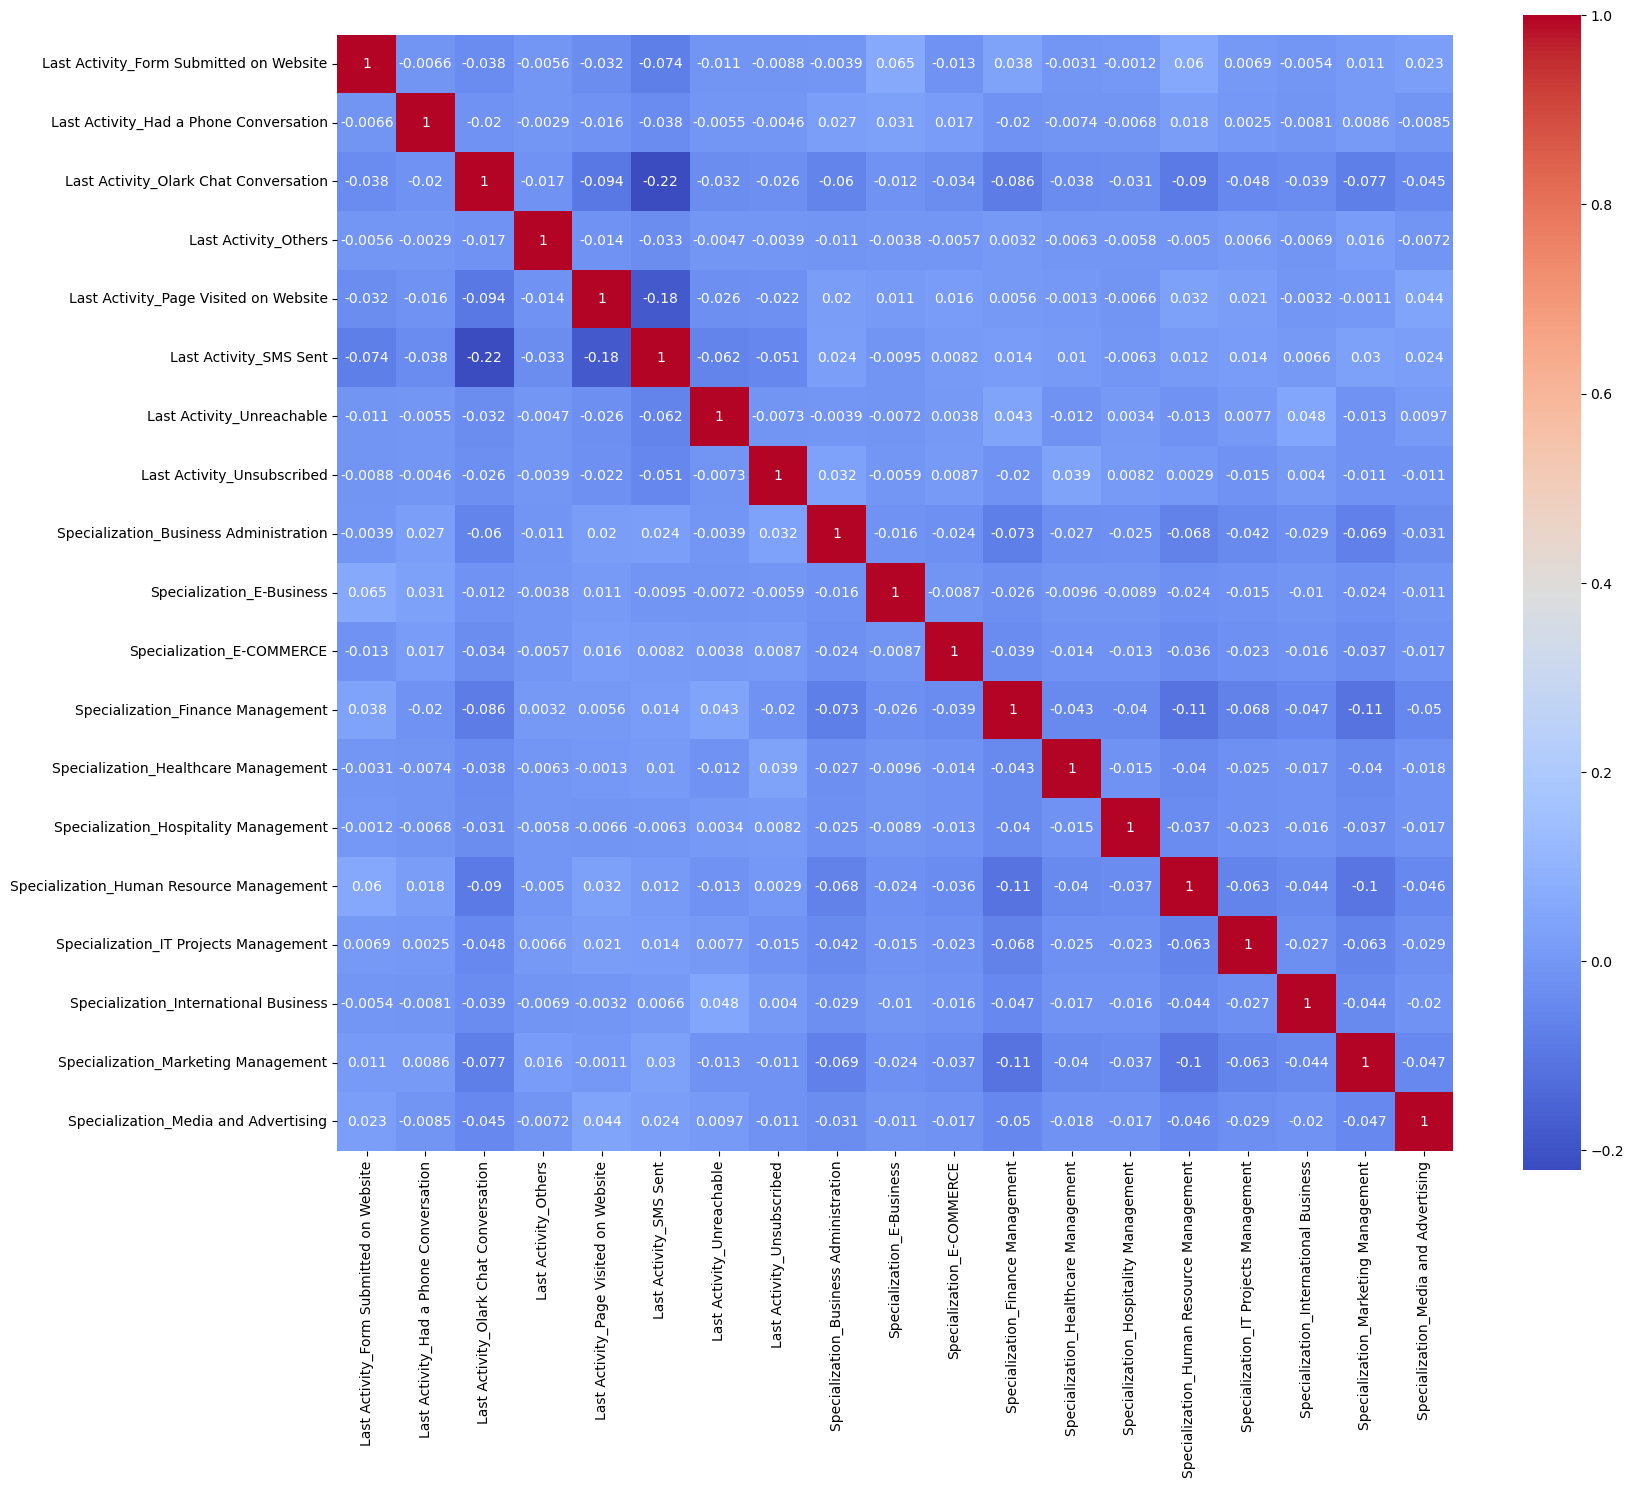

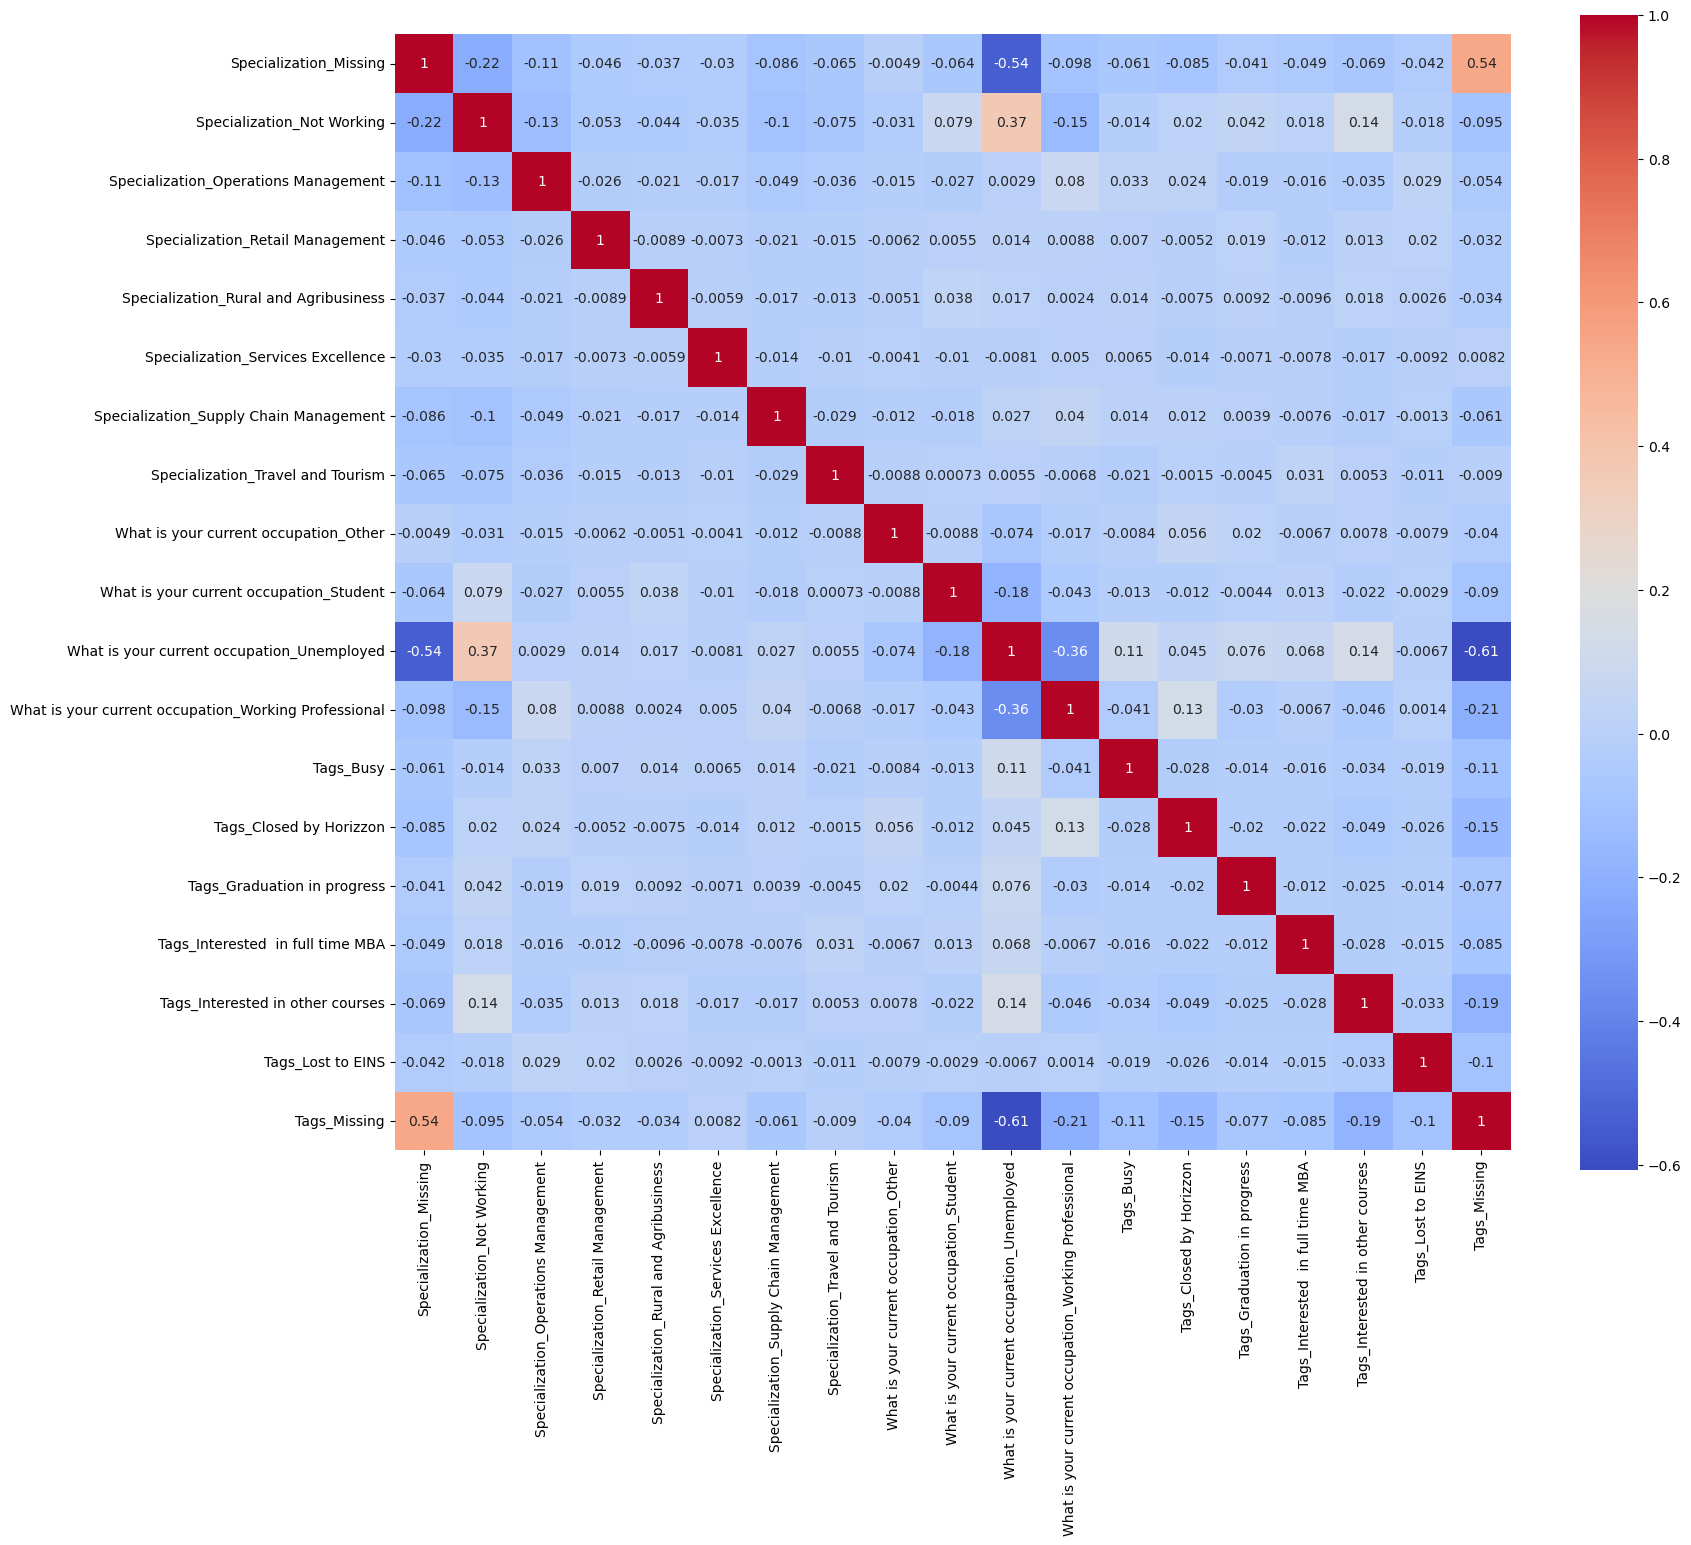

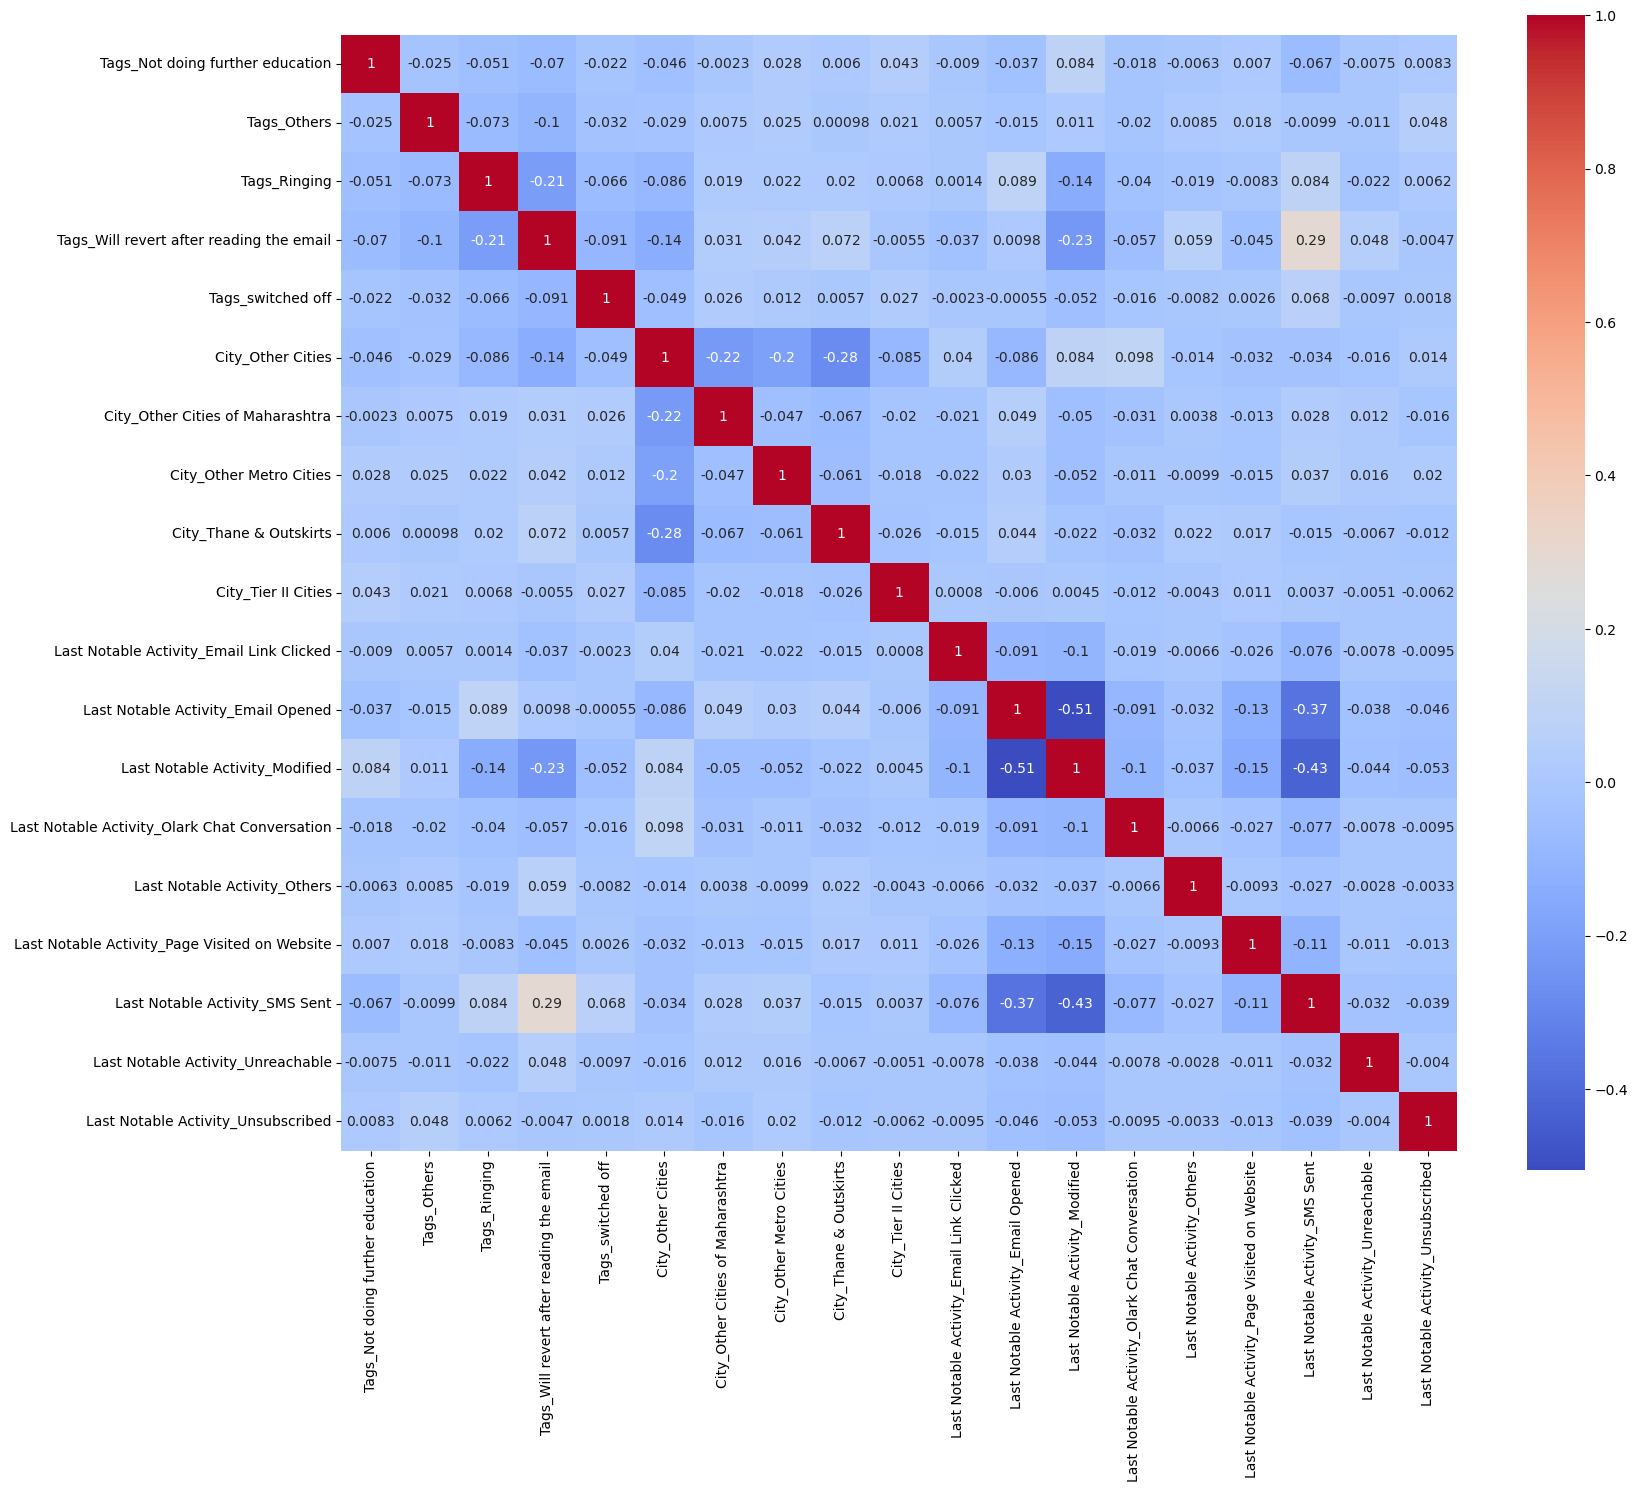

In [93]:
## Ploting heatmap to find corelation between variables.

lead_scr_X_train_corr= lead_scr_X_train.corr() ## To create correlation of variables.

## Plotting heatmap - Since there are 76 columns, divided data into four subsets and then plotted heatmap fo all four subsets.

## Listing out columns of all four subsets.
data1 = lead_scr_X_train_corr.columns[:19]
data2 = lead_scr_X_train_corr.columns[19:38]
data3 = lead_scr_X_train_corr.columns[38:57]
data4 = lead_scr_X_train_corr.columns[57:76]

plt.figure(figsize=(18,15))
sns.heatmap(lead_scr_X_train_corr.loc[data1,data1] , annot= True, square=True, cmap='coolwarm')
plt.show()
plt.figure(figsize=(18,15))
sns.heatmap(lead_scr_X_train_corr.loc[data2,data2] , annot= True, square=True, cmap='coolwarm')
plt.show()
plt.figure(figsize=(18,15))
sns.heatmap(lead_scr_X_train_corr.loc[data3,data3] , annot= True, square=True, cmap='coolwarm')
plt.show()
plt.figure(figsize=(18,15))
sns.heatmap(lead_scr_X_train_corr.loc[data4,data4] , annot= True, square=True, cmap='coolwarm')
plt.show()

## <span style="color: brown;">Observation from Corelation Matrix:</span>

### 1. Lead_origin_Lead_import is highly positively corelated with Lead_Source_Facebbok.
### 2. Lead_Source_reference is highly positively corelated with Lead_Origin_Lead Add Form.
### 3. Total_Visits is having high positive correlation with Page Views Per Visit.
### 4. 'A Free Copy of Mastering the Interview' is weakly positively corelated with Lead_Origin_Landing Page Submission.
### 5. Last_Activity_Email_Bounced is having weak positive correlation with Do_Not_Email.
### 6. Lead_source_Welingak_Website is having weak positive correlation with Lead_Origin_Lead Add Form.
### 7. Lead_source_Olark_chart is strongly negatively corelated to Page Views Per Visit.
### 8. Lead_source_Olark_chart is strongly negatively corelated to Lead_Origin_Landing Page Submission.
### 9. 'A Free Copy of Mastering the Interview' is weakly negatively corelated with Lead_Source_Google.
### 10. Last_Activity_Olark_chart_converstaion is weakly negatively corelated to Last_Activity_Email_Sent.
### 11. Tags_Missing is is strongly negatively corelated with What is your current occupation_Unemployed.
### 12. Last_Notable_Activity_Email_Opened is having strong negative correlation with Last_Notable_Activity_Modified.

## Step Eight : Building Model

In [94]:
lead_scr_X_train.head()

Do Not Email  TotalVisits  Total Time Spent on Website  \
1871           0.0    -1.054996                    -0.885371   
6795           0.0     0.254612                     0.005716   
3516           0.0     0.582014                    -0.691418   
8105           0.0     0.582014                     1.365219   
3934           0.0    -1.054996                    -0.885371   

      Page Views Per Visit  A free copy of Mastering The Interview  \
1871             -1.171392                                     0.0   
6795             -0.486490                                     1.0   
3516              0.116018                                     0.0   
8105              1.403428                                     0.0   
3934             -1.171392                                     0.0   

      Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
1871                                  0.0                        0.0   
6795                                  1.0                        0.0   
3516                                  0.0                        0.0   
8105                                  1.0                        0.0   
3934                                  0.0                        0.0   

      Lead Origin_Lead Import  Lead Source_Facebook  Lead Source_Google  ...  \
1871                      0.0                   0.0                 0.0  ...   
6795                      0.0                   0.0                 0.0  ...   
3516                      0.0                   0.0                 0.0  ...   
8105                      0.0                   0.0                 1.0  ...   
3934                      0.0                   0.0                 0.0  ...   

      City_Tier II Cities  Last Notable Activity_Email Link Clicked  \
1871                  0.0                                       0.0   
6795                  0.0                                       0.0   
3516                  0.0                                       0.0   
8105                  0.0                                       0.0   
3934                  0.0                                       0.0   

      Last Notable Activity_Email Opened  Last Notable Activity_Modified  \
1871                                 1.0                             0.0   
6795                                 1.0                             0.0   
3516                                 1.0                             0.0   
8105                                 0.0                             0.0   
3934                                 0.0                             1.0   

      Last Notable Activity_Olark Chat Conversation  \
1871                                            0.0   
6795                                            0.0   
3516                                            0.0   
8105                                            0.0   
3934                                            0.0   

      Last Notable Activity_Others  \
1871                           0.0   
6795                           0.0   
3516                           0.0   
8105                           0.0   
3934                           0.0   

      Last Notable Activity_Page Visited on Website  \
1871                                            0.0   
6795                                            0.0   
3516                                            0.0   
8105                                            0.0   
3934                                            0.0   

      Last Notable Activity_SMS Sent  Last Notable Activity_Unreachable  \
1871                             0.0                                0.0   
6795                             0.0                                0.0   
3516                             0.0                                0.0   
8105                             1.0                                0.0   
3934                             0.0                                0.0   

      Last Notable Activity_Unsubscribed  
1871             

In [95]:
lead_scr_y_train.head()

1871    0.0
6795    0.0
3516    0.0
8105    0.0
3934    0.0
Name: Converted, dtype: float64

In [96]:
## importing library

import statsmodels.api as sm

##creating constant of x train
lead_scr_X_train_cnst = sm.add_constant(lead_scr_X_train)

## First model
log_ml1 = sm.GLM(lead_scr_y_train,lead_scr_X_train_cnst,family=sm.families.Binomial())
log_reg1 = log_ml1.fit()
log_reg1.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6391
Model Family:                Binomial   Df Model:                           76
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1094.8
Date:                Mon, 21 Oct 2024   Deviance:                       2189.7
Time:                        22:56:25   Pearson chi2:                 1.55e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6287
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -6.0270      1.256     -4.800      0.000      -8.488      -3.566
Do Not Email                                            -0.7910      0.329     -2.406      0.016      -1.435      -0.147
TotalVisits                                              0.2980      0.090      3.315      0.001       0.122       0.474
Total Time Spent on Website                              1.0306      0.066     15.636      0.000       0.901       1.160
Page Views Per Visit                                    -0.2091      0.101     -2.076      0.038      -0.406      -0.012
A free copy of Mastering The Interview                  -0.2908      0.186     -1.564      0.118      -0.655       0.074
Lead Origin_Landing Page Submission                     -0.4329      0.250     -1.728      0.084      -0.924       0.058
Lead Origin_Lead Add Form                                0.6787      0.800      0.848      0.396      -0.889       2.247
Lead Origin_Lead Import                                  1.8604      2.211      0.841      0.400      -2.474       6.195
Lead Source_Facebook                                    -2.6775      2.217     -1.208      0.227      -7.022       1.667
Lead Source_Google                                       0.0261      0.192      0.136      0.892      -0.351       0.403
Lead Source_Olark Chat                                   0.7202      0.260      2.775      0.006       0.211       1.229
Lead Source_Organic Search                               0.0526      0.227      0.232      0.817      -0.392       0.497
Lead Source_Others                                       0.7876      1.032      0.763      0.445      -1.235       2.810
Lead Source_Reference                                    0.0477      0.890      0.054      0.957      -1.697       1.793
Lead Source_Referral Sites                               0.0323      0.474      0.068      0.946      -0.896       0.961
Lead Source_Welingak Website                             2.6311      1.086      2.422      0.015       0.502       4.760
Last Activity_Email Bounced                             -0.5797      0.730     -0.794      0.427      -2.010       0.850
Last Activity_Email Link Clicked                         1.2517      0.700      1.789      0.074      -0.120       2.623
Last Activity_Email Opened                               0.5960      0.454      1.313      0.189      -0.294       1.486
Last Activity_Form Submitted on Website                  0.5450      0.673      0.810      0.418      -0.774       1.864
Last Activity_Had a Phone Conversation                   0.0195      1.285      0.015      0.988      -2.499       2.538
Last Activity_Olark Chat Conversation                   -0

In [97]:
## Getting p_values and coefficients of features in a dataframe.

log_model1 = pd.DataFrame(log_reg1.params,columns=['co-efficient'],)
log_model1['p_values'] = log_reg1.pvalues.values
log_model1['p_values'] = log_model1['p_values'].apply(lambda x: format(x,'f'))
log_model1.sort_values(by='p_values',ascending=False)

co-efficient  p_values
Last Activity_Had a Phone Conversation                  0.019496  0.987893
Lead Source_Reference                                   0.047663  0.957309
Lead Source_Referral Sites                              0.032332  0.945591
Specialization_Rural and Agribusiness                   0.062660  0.941194
Last Activity_Olark Chat Conversation                  -0.035497  0.938177
...                                                          ...       ...
Tags_Lost to EINS                                      10.877603  0.000000
Tags_Closed by Horizzon                                10.729292  0.000000
What is your current occupation_Working Profess...      2.724285  0.000000
What is your current occupation_Unemployed              2.199386  0.000000
Last Activity_SMS Sent                                  2.145481  0.000000

[77 rows x 2 columns]

In [98]:
##Using RFE to reduce features from 77 to 30.

## We have to use RFE supported by sklearn library.

## import library

from sklearn.linear_model import LogisticRegression

## instantiating object

lr = LogisticRegression()

## importing RFE

from sklearn.feature_selection import RFE

## providing number of variables to RFE.

rfe=RFE(estimator=lr, n_features_to_select=30)
rfe=rfe.fit(lead_scr_X_train,lead_scr_y_train)


In [99]:
## Listing Features support details and it's ranking by RFE.

features = rfe.feature_names_in_
support = rfe.support_
rank = rfe.ranking_
rfe_df = pd.DataFrame(features, columns=['Features'])
rfe_df['Support']=support
rfe_df['Ranking'] = rank
rfe_df.sort_values(by='Ranking', ascending=False)

Features  Support  Ranking
39            Specialization_Not Working    False       47
30     Specialization_Finance Management    False       46
65                City_Thane & Outskirts    False       45
31  Specialization_Healthcare Management    False       44
14            Lead Source_Referral Sites    False       43
..                                   ...      ...      ...
50                             Tags_Busy     True        1
51               Tags_Closed by Horizzon     True        1
53     Tags_Interested  in full time MBA     True        1
54      Tags_Interested in other courses     True        1
38                Specialization_Missing     True        1

[76 rows x 3 columns]

In [100]:
## List out Features that supported and not-supported by RFE

rfe_support =list(rfe_df[rfe_df['Support']].Features)
rfe_not_support =list(rfe_df[~rfe_df['Support']].Features)

In [101]:
print('Supported Features:',rfe_support)  ## To print features supported by RFE


Supported Features: ['Do Not Email', 'Total Time Spent on Website', 'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form', 'Lead Source_Facebook', 'Lead Source_Welingak Website', 'Last Activity_SMS Sent', 'Specialization_International Business', 'Specialization_Missing', 'Specialization_Travel and Tourism', 'What is your current occupation_Other', 'What is your current occupation_Student', 'What is your current occupation_Unemployed', 'What is your current occupation_Working Professional', 'Tags_Busy', 'Tags_Closed by Horizzon', 'Tags_Interested  in full time MBA', 'Tags_Interested in other courses', 'Tags_Lost to EINS', 'Tags_Missing', 'Tags_Not doing further education', 'Tags_Others', 'Tags_Ringing', 'Tags_Will revert after reading the email', 'Tags_switched off', 'Last Notable Activity_Email Link Clicked', 'Last Notable Activity_Modified', 'Last Notable Activity_Olark Chat Conversation', 'Last Notable Activity_Others', 'Last Notable Activity_SMS Sent']


In [102]:
## Second model with RFE supported features (Total 30 features).

lead_scr_X_train=lead_scr_X_train[rfe_support]
lead_scr_X_train_cnst= sm.add_constant(lead_scr_X_train)
log_ml2 = sm.GLM(lead_scr_y_train,lead_scr_X_train_cnst,family=sm.families.Binomial())
log_reg2 = log_ml2.fit()
log_reg2.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6437
Model Family:                Binomial   Df Model:                           30
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1124.9
Date:                Mon, 21 Oct 2024   Deviance:                       2249.7
Time:                        22:56:28   Pearson chi2:                 1.19e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6253
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -5.3251      0.479    -11.124      0.000      -6.263      -4.387
Do Not Email                                            -0.9056      0.249     -3.643      0.000      -1.393      -0.418
Total Time Spent on Website                              0.9190      0.058     15.849      0.000       0.805       1.033
Lead Origin_Landing Page Submission                     -0.8688      0.161     -5.404      0.000      -1.184      -0.554
Lead Origin_Lead Add Form                                0.2942      0.357      0.825      0.409      -0.405       0.993
Lead Source_Facebook                                    -1.2881      0.718     -1.794      0.073      -2.695       0.119
Lead Source_Welingak Website                             2.6560      0.814      3.263      0.001       1.060       4.252
Last Activity_SMS Sent                                   1.8632      0.235      7.922      0.000       1.402       2.324
Specialization_International Business                   -0.7015      0.431     -1.627      0.104      -1.547       0.144
Specialization_Missing                                  -0.3912      0.220     -1.776      0.076      -0.823       0.041
Specialization_Travel and Tourism                       -0.9500      0.448     -2.121      0.034      -1.828      -0.072
What is your current occupation_Other                    1.7128      0.970      1.767      0.077      -0.187       3.613
What is your current occupation_Student                  1.8869      0.510      3.700      0.000       0.887       2.887
What is your current occupation_Unemployed               2.2711      0.205     11.068      0.000       1.869       2.673
What is your current occupation_Working Professional     2.7556      0.400      6.897      0.000       1.973       3.539
Tags_Busy                                                2.6235      0.464      5.655      0.000       1.714       3.533
Tags_Closed by Horizzon                                  9.5749      1.102      8.686      0.000       7.414      11.735
Tags_Interested  in full time MBA                        0.2584      0.842      0.307      0.759      -1.391       1.908
Tags_Interested in other courses                         0.3178      0.534      0.596      0.551      -0.728       1.364
Tags_Lost to EINS                                        9.6506      0.862     11.197      0.000       7.961      11.340
Tags_Missing                                             3.9136      0.425      9.217      0.000       3.081       4.746
Tags_Not doing further education                        -0.3917      1.094     -0.358      0.720      -2.535       1.752
Tags_Others                                              0

In [103]:
## Listing p_values and coefficients of features in a dataframe.

log_model2 = pd.DataFrame(log_reg2.params,columns=['co-efficient'],)
log_model2['p_values'] = log_reg2.pvalues.values
log_model2['p_values'] = log_model2['p_values'].apply(lambda x: format(x,'f'))
log_model2.sort_values(by='p_values',ascending=False)

co-efficient  p_values
Tags_Interested  in full time MBA                       0.258369  0.758863
Tags_Not doing further education                       -0.391712  0.720192
Tags_Interested in other courses                        0.317805  0.551450
Lead Origin_Lead Add Form                               0.294170  0.409357
Tags_Others                                             0.484658  0.328034
Last Notable Activity_SMS Sent                          0.351634  0.193249
Specialization_International Business                  -0.701491  0.103784
What is your current occupation_Other                   1.712784  0.077284
Specialization_Missing                                 -0.391166  0.075787
Lead Source_Facebook                                   -1.288094  0.072768
Last Notable Activity_Others                            2.355640  0.051887
Specialization_Travel and Tourism                      -0.950038  0.033962
Tags_switched off                                      -1.509162  0.025084
Last Notable Activity_Email Link Clicked               -1.107079  0.022491
Tags_Ringing                                           -1.284910  0.005969
Last Notable Activity_Olark Chat Conversation          -1.490511  0.002121
Lead Source_Welingak Website                            2.655977  0.001104
Do Not Email                                           -0.905617  0.000269
What is your current occupation_Student                 1.886922  0.000216
Last Notable Activity_Modified                         -1.368905  0.000000
Tags_Will revert after reading the email                6.637514  0.000000
const                                                  -5.325148  0.000000
Tags_Missing                                            3.913650  0.000000
Tags_Lost to EINS                                       9.650601  0.000000
Tags_Closed by Horizzon                                 9.574930  0.000000
What is your current occupation_Working Profess...      2.755635  0.000000
What is your current occupation_Unemployed              2.271148  0.000000
Last Activity_SMS Sent                                  1.863240  0.000000
Lead Origin_Landing Page Submission                    -0.868804  0.000000
Total Time Spent on Website                             0.918958  0.000000
Tags_Busy                                               2.623529  0.000000

### There are few features that have high p-values.

In [104]:
## Let's create predicted values based on second model built after RFE feature eliminiation.

lead_scr_y_train_pred = log_reg2.predict(lead_scr_X_train_cnst)


In [105]:
## Creating dataframe of Actual Churn values, Churn Probability predicted by model.

converted_pred = pd.DataFrame(lead_scr_y_train_pred.values, columns=['Conversion_Probability_pred'])
converted_pred['Actual_conversion_value'] = lead_scr_y_train.values


In [106]:
### Considering cut off value as 0.5, we are now creating Predicted conversion value.

converted_pred['Predicted_conversion_value'] = converted_pred['Conversion_Probability_pred'].apply(lambda x: 1 if x>0.5 else 0)
converted_pred.head()


Conversion_Probability_pred  Actual_conversion_value  \
0                     0.005751                      0.0   
1                     0.499025                      0.0   
2                     0.006866                      0.0   
3                     0.149534                      0.0   
4                     0.210340                      0.0   

   Predicted_conversion_value  
0                           0  
1                           0  
2                           0  
3                           0  
4                           0

In [107]:
## Calculating Accuracy of model.

## importing metrics

from sklearn import metrics

cnf = metrics.confusion_matrix(converted_pred['Actual_conversion_value'],converted_pred['Predicted_conversion_value'])

Accuracy_scr = metrics.accuracy_score(converted_pred['Actual_conversion_value'],converted_pred['Predicted_conversion_value'])
print('Accuracy % of model -',Accuracy_scr*100)
cnf

Accuracy % of model - 93.81570810142239


array([[3840,  162],
       [ 238, 2228]], dtype=int64)

In [108]:
## Accuracy is very good. However, there are many features that have high p-values. 
## Lets eliminate features by using VIF and p-values.

## Calculating VIF values of Fetaures used in model 2.

from statsmodels.stats.outliers_influence import variance_inflation_factor  ## To calculate VIF.

vif =pd.DataFrame(log_reg2.pvalues.values, columns=['p_values'])
vif['p_values']=vif['p_values'].apply(lambda x: format(x,'f'))
vif= vif.drop(vif.index[0])

vif['VIF']= [variance_inflation_factor(lead_scr_X_train.values, i) for i in range(0,lead_scr_X_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif['Features'] = lead_scr_X_train.columns
vif.sort_values(by='VIF',ascending=False)
 

p_values   VIF                                           Features
30  0.193249  6.44                     Last Notable Activity_SMS Sent
7   0.000000  6.02                             Last Activity_SMS Sent
13  0.000000  5.97         What is your current occupation_Unemployed
24  0.000000  4.08           Tags_Will revert after reading the email
20  0.000000  3.45                                       Tags_Missing
3   0.000000  3.01                Lead Origin_Landing Page Submission
23  0.005969  2.62                                       Tags_Ringing
9   0.075787  2.45                             Specialization_Missing
27  0.000000  2.41                     Last Notable Activity_Modified
14  0.000000  2.02  What is your current occupation_Working Profes...
4   0.409357  1.97                          Lead Origin_Lead Add Form
16  0.000000  1.72                            Tags_Closed by Horizzon
18  0.551450  1.61                   Tags_Interested in other courses
22  0.328034  1.41                                        Tags_Others
25  0.025084  1.35                                  Tags_switched off
6   0.001104  1.32                       Lead Source_Welingak Website
15  0.000000  1.26                                          Tags_Busy
2   0.000000  1.25                        Total Time Spent on Website
21  0.720192  1.23                   Tags_Not doing further education
1   0.000269  1.17                                       Do Not Email
19  0.000000  1.16                                  Tags_Lost to EINS
17  0.758863  1.15                  Tags_Interested  in full time MBA
12  0.000216  1.09            What is your current occupation_Student
28  0.002121  1.08      Last Notable Activity_Olark Chat Conversation
26  0.022491  1.06           Last Notable Activity_Email Link Clicked
10  0.033962  1.05                  Specialization_Travel and Tourism
11  0.077284  1.04              What is your current occupation_Other
8   0.103784  1.03              Specialization_International Business
5   0.072768  1.02                               Lead Source_Facebook
29  0.051887  1.01                       Last Notable Activity_Others

### 'Last Notable Activity_SMS Sent' have highest VIF values and p_values. Lets remove Last Notable Activity_SMS Sent and build next model

In [109]:
## REmving feature from train dataset

lead_scr_X_train=lead_scr_X_train.drop(columns=['Last Notable Activity_SMS Sent'],axis=1)

In [110]:
## Building Third model after removing feature 'Last Notable Activity_SMS Sent'

lead_scr_X_train_cnst= sm.add_constant(lead_scr_X_train)
log_ml3 = sm.GLM(lead_scr_y_train,lead_scr_X_train_cnst,family=sm.families.Binomial())
log_reg3 = log_ml3.fit()
log_reg3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6438
Model Family:                Binomial   Df Model:                           29
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1125.7
Date:                Mon, 21 Oct 2024   Deviance:                       2251.4
Time:                        22:56:29   Pearson chi2:                 1.22e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6252
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -5.3295      0.479    -11.126      0.000      -6.268      -4.391
Do Not Email                                            -0.8980      0.248     -3.620      0.000      -1.384      -0.412
Total Time Spent on Website                              0.9174      0.058     15.855      0.000       0.804       1.031
Lead Origin_Landing Page Submission                     -0.8700      0.161     -5.416      0.000      -1.185      -0.555
Lead Origin_Lead Add Form                                0.2914      0.358      0.813      0.416      -0.411       0.994
Lead Source_Facebook                                    -1.3365      0.709     -1.884      0.060      -2.727       0.054
Lead Source_Welingak Website                             2.6525      0.816      3.251      0.001       1.054       4.251
Last Activity_SMS Sent                                   2.1180      0.130     16.282      0.000       1.863       2.373
Specialization_International Business                   -0.6951      0.430     -1.617      0.106      -1.538       0.148
Specialization_Missing                                  -0.3768      0.220     -1.716      0.086      -0.807       0.053
Specialization_Travel and Tourism                       -0.9367      0.448     -2.092      0.036      -1.814      -0.059
What is your current occupation_Other                    1.7527      0.977      1.795      0.073      -0.161       3.667
What is your current occupation_Student                  1.9106      0.513      3.721      0.000       0.904       2.917
What is your current occupation_Unemployed               2.2958      0.204     11.238      0.000       1.895       2.696
What is your current occupation_Working Professional     2.7826      0.398      6.985      0.000       2.002       3.563
Tags_Busy                                                2.6449      0.463      5.712      0.000       1.737       3.552
Tags_Closed by Horizzon                                  9.6512      1.102      8.761      0.000       7.492      11.810
Tags_Interested  in full time MBA                        0.2514      0.844      0.298      0.766      -1.402       1.905
Tags_Interested in other courses                         0.3466      0.533      0.650      0.516      -0.698       1.391
Tags_Lost to EINS                                        9.7404      0.862     11.305      0.000       8.052      11.429
Tags_Missing                                             3.9365      0.425      9.272      0.000       3.104       4.769
Tags_Not doing further education                        -0.3846      1.094     -0.352      0.725      -2.529       1.760
Tags_Others                                              0

In [111]:
## Listing p_values and coefficients of features in a dataframe.

log_model3 = pd.DataFrame(log_reg3.params,columns=['co-efficient'],)
log_model3['p_values'] = log_reg3.pvalues.values
log_model3['p_values'] = log_model3['p_values'].apply(lambda x: format(x,'f'))
log_model3.sort_values(by='p_values',ascending=False)

co-efficient  p_values
Tags_Interested  in full time MBA                       0.251414  0.765679
Tags_Not doing further education                       -0.384632  0.725147
Tags_Interested in other courses                        0.346622  0.515513
Lead Origin_Lead Add Form                               0.291398  0.416092
Tags_Others                                             0.512600  0.299724
Specialization_International Business                  -0.695073  0.105915
Specialization_Missing                                 -0.376826  0.086108
What is your current occupation_Other                   1.752667  0.072687
Lead Source_Facebook                                   -1.336485  0.059551
Last Notable Activity_Others                            2.327959  0.054730
Specialization_Travel and Tourism                      -0.936746  0.036395
Tags_switched off                                      -1.447223  0.031059
Last Notable Activity_Email Link Clicked               -1.152472  0.017689
Tags_Ringing                                           -1.230006  0.008119
Last Notable Activity_Olark Chat Conversation          -1.530389  0.001607
Lead Source_Welingak Website                            2.652457  0.001148
Do Not Email                                           -0.898044  0.000295
What is your current occupation_Student                 1.910552  0.000198
Tags_Will revert after reading the email                6.675027  0.000000
Last Notable Activity_Modified                         -1.497594  0.000000
const                                                  -5.329477  0.000000
Tags_Missing                                            3.936497  0.000000
Tags_Lost to EINS                                       9.740428  0.000000
Tags_Closed by Horizzon                                 9.651170  0.000000
What is your current occupation_Working Profess...      2.782577  0.000000
What is your current occupation_Unemployed              2.295793  0.000000
Last Activity_SMS Sent                                  2.117961  0.000000
Lead Origin_Landing Page Submission                    -0.869962  0.000000
Total Time Spent on Website                             0.917355  0.000000
Tags_Busy                                               2.644926  0.000000

In [112]:
## Predicting data to check accuracy of model.

lead_scr_y_train_pred = log_reg3.predict(lead_scr_X_train_cnst)

## Creating dataframe of Actual Churn values, Churn Probability predicted by model.

converted_pred = pd.DataFrame(lead_scr_y_train_pred.values, columns=['Conversion_Probability_pred'])
converted_pred['Actual_conversion_value'] = lead_scr_y_train.values

### Considering cut off value as 0.5, we are now creating Predicted conversion value.

converted_pred['Predicted_conversion_value'] = converted_pred['Conversion_Probability_pred'].apply(lambda x: 1 if x>0.5 else 0)
converted_pred.head()

Accuracy_scr = metrics.accuracy_score(converted_pred['Actual_conversion_value'],converted_pred['Predicted_conversion_value'])
print('Accuracy % of model -',Accuracy_scr*100)

cnf = metrics.confusion_matrix(converted_pred['Actual_conversion_value'],converted_pred['Predicted_conversion_value'])
cnf


Accuracy % of model - 93.81570810142239


array([[3839,  163],
       [ 237, 2229]], dtype=int64)

In [113]:
## Accuracy score is same.

## Calculating VIF values of Fetaures used in model 3.

from statsmodels.stats.outliers_influence import variance_inflation_factor  ## To calculate VIF.

vif =pd.DataFrame(log_reg3.pvalues.values, columns=['p_values'])
vif['p_values']=vif['p_values'].apply(lambda x: format(x,'f'))
vif= vif.drop(vif.index[0])

vif['VIF']= [variance_inflation_factor(lead_scr_X_train.values, i) for i in range(0,lead_scr_X_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif['Features'] = lead_scr_X_train.columns
vif.sort_values(by='VIF',ascending=False)

p_values   VIF                                           Features
13  0.000000  5.84         What is your current occupation_Unemployed
24  0.000000  4.07           Tags_Will revert after reading the email
20  0.000000  3.43                                       Tags_Missing
3   0.000000  3.01                Lead Origin_Landing Page Submission
23  0.008119  2.62                                       Tags_Ringing
9   0.086108  2.43                             Specialization_Missing
14  0.000000  2.00  What is your current occupation_Working Profes...
4   0.416092  1.97                          Lead Origin_Lead Add Form
27  0.000000  1.90                     Last Notable Activity_Modified
7   0.000000  1.73                             Last Activity_SMS Sent
16  0.000000  1.72                            Tags_Closed by Horizzon
18  0.515513  1.61                   Tags_Interested in other courses
22  0.299724  1.41                                        Tags_Others
25  0.031059  1.35                                  Tags_switched off
6   0.001148  1.32                       Lead Source_Welingak Website
15  0.000000  1.26                                          Tags_Busy
2   0.000000  1.25                        Total Time Spent on Website
21  0.725147  1.23                   Tags_Not doing further education
1   0.000295  1.17                                       Do Not Email
19  0.000000  1.16                                  Tags_Lost to EINS
17  0.765679  1.15                  Tags_Interested  in full time MBA
12  0.000198  1.09            What is your current occupation_Student
28  0.001607  1.07      Last Notable Activity_Olark Chat Conversation
10  0.036395  1.05                  Specialization_Travel and Tourism
26  0.017689  1.05           Last Notable Activity_Email Link Clicked
11  0.072687  1.04              What is your current occupation_Other
8   0.105915  1.03              Specialization_International Business
5   0.059551  1.02                               Lead Source_Facebook
29  0.054730  1.01                       Last Notable Activity_Others

### 'What is your current occupation_Unemployed' have high VIF value , however have low p_value. So, we need not remove this feature.

In [114]:
## Checking high p_values 

vif.sort_values(by='p_values',ascending=False)

p_values   VIF                                           Features
17  0.765679  1.15                  Tags_Interested  in full time MBA
21  0.725147  1.23                   Tags_Not doing further education
18  0.515513  1.61                   Tags_Interested in other courses
4   0.416092  1.97                          Lead Origin_Lead Add Form
22  0.299724  1.41                                        Tags_Others
8   0.105915  1.03              Specialization_International Business
9   0.086108  2.43                             Specialization_Missing
11  0.072687  1.04              What is your current occupation_Other
5   0.059551  1.02                               Lead Source_Facebook
29  0.054730  1.01                       Last Notable Activity_Others
10  0.036395  1.05                  Specialization_Travel and Tourism
25  0.031059  1.35                                  Tags_switched off
26  0.017689  1.05           Last Notable Activity_Email Link Clicked
23  0.008119  2.62                                       Tags_Ringing
28  0.001607  1.07      Last Notable Activity_Olark Chat Conversation
6   0.001148  1.32                       Lead Source_Welingak Website
1   0.000295  1.17                                       Do Not Email
12  0.000198  1.09            What is your current occupation_Student
16  0.000000  1.72                            Tags_Closed by Horizzon
19  0.000000  1.16                                  Tags_Lost to EINS
20  0.000000  3.43                                       Tags_Missing
2   0.000000  1.25                        Total Time Spent on Website
14  0.000000  2.00  What is your current occupation_Working Profes...
13  0.000000  5.84         What is your current occupation_Unemployed
24  0.000000  4.07           Tags_Will revert after reading the email
7   0.000000  1.73                             Last Activity_SMS Sent
27  0.000000  1.90                     Last Notable Activity_Modified
3   0.000000  3.01                Lead Origin_Landing Page Submission
15  0.000000  1.26                                          Tags_Busy

In [115]:
## Lets remove 'Specialization_Missing' that have high p_values.


lead_scr_X_train=lead_scr_X_train.drop(columns=['Specialization_Missing'],axis=1)
lead_scr_X_train

Do Not Email  Total Time Spent on Website  \
1871           0.0                    -0.885371   
6795           0.0                     0.005716   
3516           0.0                    -0.691418   
8105           0.0                     1.365219   
3934           0.0                    -0.885371   
...            ...                          ...   
350            0.0                    -0.885371   
79             0.0                     0.404601   
8039           0.0                    -0.885371   
6936           0.0                    -0.449891   
5640           0.0                    -0.885371   

      Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
1871                                  0.0                        0.0   
6795                                  1.0                        0.0   
3516                                  0.0                        0.0   
8105                                  1.0                        0.0   
3934                                  0.0                        0.0   
...                                   ...                        ...   
350                                   0.0                        1.0   
79                                    0.0                        1.0   
8039                                  0.0                        0.0   
6936                                  1.0                        0.0   
5640                                  0.0                        0.0   

      Lead Source_Facebook  Lead Source_Welingak Website  \
1871                   0.0                           0.0   
6795                   0.0                           0.0   
3516                   0.0                           0.0   
8105                   0.0                           0.0   
3934                   0.0                           0.0   
...                    ...                           ...   
350                    0.0                           0.0   
79                     0.0                           0.0   
8039                   0.0                           0.0   
6936                   0.0                           0.0   
5640                   0.0                           0.0   

      Last Activity_SMS Sent  Specialization_International Business  \
1871                     0.0                                    0.0   
6795                     0.0                                    0.0   
3516                     0.0                                    0.0   
8105                     1.0                                    0.0   
3934                     0.0                                    0.0   
...                      ...                                    ...   
350                      0.0                                    0.0   
79                       0.0                                    0.0   
8039                     0.0                                    0.0   
6936                     0.0                                    0.0   
5640                     0.0                                    0.0   

      Specialization_Travel and Tourism  \
1871                                0.0   
6795                                0.0   
3516                                0.0   
8105                                0.0   
3934                                0.0   
...                                 ...   
350                                 0.0   
79                                  0.0   
8039                                0.0   
6936                                1.0   
5640                                0.0   

      What is your current occupation_Other  ...  Tags_Missing  \
1871                                    0.0  ...           0.0   
6795                                    0.0  ...           1.0   
3516                                    0.0  ...           0.0   
8105                                    0.0  ...           0.0   
3934                                    0.0  ...           1.0   
...                                     .

In [116]:
## Building Third model after removing feature 'Last Notable Activity_SMS Sent'

lead_scr_X_train_cnst= sm.add_constant(lead_scr_X_train)
log_ml4 = sm.GLM(lead_scr_y_train,lead_scr_X_train_cnst,family=sm.families.Binomial())
log_reg4 = log_ml4.fit()
log_reg4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6439
Model Family:                Binomial   Df Model:                           28
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1127.2
Date:                Mon, 21 Oct 2024   Deviance:                       2254.4
Time:                        22:56:29   Pearson chi2:                 1.22e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6250
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -5.6506      0.443    -12.764      0.000      -6.518      -4.783
Do Not Email                                            -0.9189      0.248     -3.707      0.000      -1.405      -0.433
Total Time Spent on Website                              0.9227      0.058     15.928      0.000       0.809       1.036
Lead Origin_Landing Page Submission                     -0.7021      0.127     -5.510      0.000      -0.952      -0.452
Lead Origin_Lead Add Form                                0.3994      0.352      1.134      0.257      -0.291       1.089
Lead Source_Facebook                                    -1.3112      0.699     -1.876      0.061      -2.681       0.058
Lead Source_Welingak Website                             2.5961      0.815      3.186      0.001       0.999       4.193
Last Activity_SMS Sent                                   2.1217      0.130     16.290      0.000       1.866       2.377
Specialization_International Business                   -0.6582      0.433     -1.521      0.128      -1.506       0.190
Specialization_Travel and Tourism                       -0.9303      0.451     -2.062      0.039      -1.815      -0.046
What is your current occupation_Other                    1.9171      0.948      2.023      0.043       0.059       3.775
What is your current occupation_Student                  2.0986      0.501      4.185      0.000       1.116       3.082
What is your current occupation_Unemployed               2.5165      0.160     15.688      0.000       2.202       2.831
What is your current occupation_Working Professional     2.9579      0.382      7.734      0.000       2.208       3.707
Tags_Busy                                                2.6119      0.462      5.656      0.000       1.707       3.517
Tags_Closed by Horizzon                                  9.6450      1.101      8.756      0.000       7.486      11.804
Tags_Interested  in full time MBA                        0.2648      0.843      0.314      0.754      -1.388       1.918
Tags_Interested in other courses                         0.3888      0.532      0.731      0.464      -0.653       1.431
Tags_Lost to EINS                                        9.8369      0.861     11.423      0.000       8.149      11.525
Tags_Missing                                             3.9923      0.423      9.434      0.000       3.163       4.822
Tags_Not doing further education                        -0.4220      1.094     -0.386      0.700      -2.566       1.722
Tags_Others                                              0.5006      0.494      1.014      0.311      -0.467       1.468
Tags_Ringing                                            -1

In [117]:
## Listing p_values and coefficients of features in a dataframe.

log_model4 = pd.DataFrame(log_reg4.params,columns=['co-efficient'],)
log_model4['p_values'] = log_reg4.pvalues.values
log_model4['p_values'] = log_model4['p_values'].apply(lambda x: format(x,'f'))
log_model4.sort_values(by='p_values',ascending=False)

co-efficient  p_values
Tags_Interested  in full time MBA                       0.264770  0.753534
Tags_Not doing further education                       -0.422032  0.699667
Tags_Interested in other courses                        0.388817  0.464484
Tags_Others                                             0.500622  0.310589
Lead Origin_Lead Add Form                               0.399359  0.256694
Specialization_International Business                  -0.658156  0.128163
Lead Source_Facebook                                   -1.311218  0.060596
Last Notable Activity_Others                            2.383069  0.048781
What is your current occupation_Other                   1.917138  0.043115
Specialization_Travel and Tourism                      -0.930298  0.039246
Tags_switched off                                      -1.446835  0.030556
Last Notable Activity_Email Link Clicked               -1.153497  0.016700
Tags_Ringing                                           -1.252575  0.006912
Lead Source_Welingak Website                            2.596147  0.001445
Last Notable Activity_Olark Chat Conversation          -1.536334  0.001356
Do Not Email                                           -0.918940  0.000210
What is your current occupation_Student                 2.098623  0.000029
Tags_Will revert after reading the email                6.670786  0.000000
Last Notable Activity_Modified                         -1.500659  0.000000
const                                                  -5.650619  0.000000
Tags_Missing                                            3.992292  0.000000
Tags_Lost to EINS                                       9.836878  0.000000
Tags_Closed by Horizzon                                 9.644970  0.000000
What is your current occupation_Working Profess...      2.957878  0.000000
What is your current occupation_Unemployed              2.516491  0.000000
Last Activity_SMS Sent                                  2.121670  0.000000
Lead Origin_Landing Page Submission                    -0.702129  0.000000
Total Time Spent on Website                             0.922691  0.000000
Tags_Busy                                               2.611949  0.000000

In [118]:
## Predicting data to check accuracy of model.

lead_scr_y_train_pred = log_reg4.predict(lead_scr_X_train_cnst)

## Creating dataframe of Actual Churn values, Churn Probability predicted by model.

converted_pred = pd.DataFrame(lead_scr_y_train_pred.values, columns=['Conversion_Probability_pred'])
converted_pred['Actual_conversion_value'] = lead_scr_y_train.values

### Considering cut off value as 0.5, we are now creating Predicted conversion value.

converted_pred['Predicted_conversion_value'] = converted_pred['Conversion_Probability_pred'].apply(lambda x: 1 if x>0.5 else 0)
converted_pred.head()

Accuracy_scr = metrics.accuracy_score(converted_pred['Actual_conversion_value'],converted_pred['Predicted_conversion_value'])
print('Accuracy % of model -',Accuracy_scr*100)

cnf = metrics.confusion_matrix(converted_pred['Actual_conversion_value'],converted_pred['Predicted_conversion_value'])
cnf


Accuracy % of model - 93.75386518243661


array([[3835,  167],
       [ 237, 2229]], dtype=int64)

In [119]:
## Accuracy score is same.

## Calculating VIF values of Fetaures used in model 4.

from statsmodels.stats.outliers_influence import variance_inflation_factor  ## To calculate VIF.

vif =pd.DataFrame(log_reg4.pvalues.values, columns=['p_values'])
vif['p_values']=vif['p_values'].apply(lambda x: format(x,'f'))
vif= vif.drop(vif.index[0])

vif['VIF']= [variance_inflation_factor(lead_scr_X_train.values, i) for i in range(0,lead_scr_X_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif['Features'] = lead_scr_X_train.columns
vif.sort_values(by='p_values',ascending=False)

p_values   VIF                                           Features
16  0.753534  1.13                  Tags_Interested  in full time MBA
20  0.699667  1.20                   Tags_Not doing further education
17  0.464484  1.53                   Tags_Interested in other courses
21  0.310589  1.35                                        Tags_Others
4   0.256694  1.91                          Lead Origin_Lead Add Form
8   0.128163  1.03              Specialization_International Business
5   0.060596  1.02                               Lead Source_Facebook
28  0.048781  1.01                       Last Notable Activity_Others
10  0.043115  1.04              What is your current occupation_Other
9   0.039246  1.04                  Specialization_Travel and Tourism
24  0.030556  1.29                                  Tags_switched off
25  0.016700  1.05           Last Notable Activity_Email Link Clicked
22  0.006912  2.32                                       Tags_Ringing
6   0.001445  1.32                       Lead Source_Welingak Website
27  0.001356  1.06      Last Notable Activity_Olark Chat Conversation
1   0.000210  1.17                                       Do Not Email
11  0.000029  1.08            What is your current occupation_Student
2   0.000000  1.24                        Total Time Spent on Website
18  0.000000  1.13                                  Tags_Lost to EINS
19  0.000000  1.92                                       Tags_Missing
14  0.000000  1.21                                          Tags_Busy
13  0.000000  1.96  What is your current occupation_Working Profes...
12  0.000000  5.33         What is your current occupation_Unemployed
23  0.000000  3.54           Tags_Will revert after reading the email
7   0.000000  1.73                             Last Activity_SMS Sent
26  0.000000  1.84                     Last Notable Activity_Modified
3   0.000000  2.59                Lead Origin_Landing Page Submission
15  0.000000  1.64                            Tags_Closed by Horizzon

In [120]:
## Lets remove 'Tags_Interested in full time MBA' having highest p_value and building fifth model.

lead_scr_X_train=lead_scr_X_train.drop(columns=['Tags_Interested  in full time MBA'],axis=1)

In [121]:
## Building Fourth model after removing feature 'Tags_Interested in full time MBA'

lead_scr_X_train_cnst= sm.add_constant(lead_scr_X_train)
log_ml4 = sm.GLM(lead_scr_y_train,lead_scr_X_train_cnst,family=sm.families.Binomial())
log_reg4 = log_ml4.fit()
log_reg4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6440
Model Family:                Binomial   Df Model:                           27
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1127.2
Date:                Mon, 21 Oct 2024   Deviance:                       2254.5
Time:                        22:56:30   Pearson chi2:                 1.21e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6250
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -5.5969      0.401    -13.941      0.000      -6.384      -4.810
Do Not Email                                            -0.9179      0.248     -3.703      0.000      -1.404      -0.432
Total Time Spent on Website                              0.9229      0.058     15.932      0.000       0.809       1.036
Lead Origin_Landing Page Submission                     -0.7028      0.127     -5.515      0.000      -0.953      -0.453
Lead Origin_Lead Add Form                                0.3990      0.352      1.133      0.257      -0.291       1.089
Lead Source_Facebook                                    -1.3112      0.699     -1.876      0.061      -2.681       0.058
Lead Source_Welingak Website                             2.5963      0.815      3.186      0.001       0.999       4.194
Last Activity_SMS Sent                                   2.1221      0.130     16.292      0.000       1.867       2.377
Specialization_International Business                   -0.6541      0.433     -1.511      0.131      -1.502       0.194
Specialization_Travel and Tourism                       -0.9278      0.451     -2.055      0.040      -1.813      -0.043
What is your current occupation_Other                    1.9172      0.947      2.024      0.043       0.060       3.774
What is your current occupation_Student                  2.0953      0.501      4.186      0.000       1.114       3.076
What is your current occupation_Unemployed               2.5165      0.160     15.689      0.000       2.202       2.831
What is your current occupation_Working Professional     2.9623      0.383      7.739      0.000       2.212       3.713
Tags_Busy                                                2.5580      0.422      6.059      0.000       1.731       3.386
Tags_Closed by Horizzon                                  9.5896      1.085      8.841      0.000       7.464      11.715
Tags_Interested in other courses                         0.3344      0.497      0.673      0.501      -0.640       1.308
Tags_Lost to EINS                                        9.7824      0.840     11.644      0.000       8.136      11.429
Tags_Missing                                             3.9381      0.379     10.385      0.000       3.195       4.681
Tags_Not doing further education                        -0.4761      1.078     -0.442      0.659      -2.589       1.636
Tags_Others                                              0.4464      0.457      0.978      0.328      -0.448       1.341
Tags_Ringing                                            -1.3066      0.424     -3.079      0.002      -2.138      -0.475
Tags_Will revert after reading the email                 6

In [122]:
## Listing p_values and coefficients of features in a dataframe.

log_model4 = pd.DataFrame(log_reg4.params,columns=['co-efficient'],)
log_model4['p_values'] = log_reg4.pvalues.values
log_model4['p_values'] = log_model4['p_values'].apply(lambda x: format(x,'f'))
log_model4.sort_values(by='p_values',ascending=False)

co-efficient  p_values
Tags_Not doing further education                       -0.476085  0.658696
Tags_Interested in other courses                        0.334366  0.501086
Tags_Others                                             0.446416  0.328214
Lead Origin_Lead Add Form                               0.399011  0.257065
Specialization_International Business                  -0.654080  0.130732
Lead Source_Facebook                                   -1.311233  0.060611
Last Notable Activity_Others                            2.384208  0.048676
What is your current occupation_Other                   1.917205  0.042989
Specialization_Travel and Tourism                      -0.927829  0.039877
Tags_switched off                                      -1.500802  0.019455
Last Notable Activity_Email Link Clicked               -1.153691  0.016656
Tags_Ringing                                           -1.306561  0.002075
Lead Source_Welingak Website                            2.596332  0.001443
Last Notable Activity_Olark Chat Conversation          -1.536637  0.001349
Do Not Email                                           -0.917903  0.000213
What is your current occupation_Student                 2.095318  0.000028
Last Notable Activity_Modified                         -1.499285  0.000000
Tags_Will revert after reading the email                6.615986  0.000000
const                                                  -5.596877  0.000000
Tags_Missing                                            3.938094  0.000000
Tags_Lost to EINS                                       9.782397  0.000000
Tags_Closed by Horizzon                                 9.589561  0.000000
What is your current occupation_Working Profess...      2.962302  0.000000
What is your current occupation_Unemployed              2.516478  0.000000
Last Activity_SMS Sent                                  2.122119  0.000000
Lead Origin_Landing Page Submission                    -0.702752  0.000000
Total Time Spent on Website                             0.922864  0.000000
Tags_Busy                                               2.558027  0.000000

In [123]:
## Predicting data to check accuracy of model.

lead_scr_y_train_pred = log_reg4.predict(lead_scr_X_train_cnst)

## Creating dataframe of Actual Churn values, Churn Probability predicted by model.

converted_pred = pd.DataFrame(lead_scr_y_train_pred.values, columns=['Conversion_Probability_pred'])
converted_pred['Actual_conversion_value'] = lead_scr_y_train.values

### Considering cut off value as 0.5, we are now creating Predicted conversion value.

converted_pred['Predicted_conversion_value'] = converted_pred['Conversion_Probability_pred'].apply(lambda x: 1 if x>0.5 else 0)
converted_pred.head()

Accuracy_scr = metrics.accuracy_score(converted_pred['Actual_conversion_value'],converted_pred['Predicted_conversion_value'])
print('Accuracy % of model -',Accuracy_scr*100)

cnf = metrics.confusion_matrix(converted_pred['Actual_conversion_value'],converted_pred['Predicted_conversion_value'])
cnf


Accuracy % of model - 93.75386518243661


array([[3835,  167],
       [ 237, 2229]], dtype=int64)

In [124]:
## Calculating VIF values of Fetaures used in model 4.

from statsmodels.stats.outliers_influence import variance_inflation_factor  ## To calculate VIF.

vif =pd.DataFrame(log_reg4.pvalues.values, columns=['p_values'])
vif['p_values']=vif['p_values'].apply(lambda x: format(x,'f'))
vif= vif.drop(vif.index[0])

vif['VIF']= [variance_inflation_factor(lead_scr_X_train.values, i) for i in range(0,lead_scr_X_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif['Features'] = lead_scr_X_train.columns
vif.sort_values(by='p_values',ascending=False)

p_values   VIF                                           Features
19  0.658696  1.18                   Tags_Not doing further education
16  0.501086  1.47                   Tags_Interested in other courses
20  0.328214  1.31                                        Tags_Others
4   0.257065  1.91                          Lead Origin_Lead Add Form
8   0.130732  1.03              Specialization_International Business
5   0.060611  1.02                               Lead Source_Facebook
27  0.048676  1.01                       Last Notable Activity_Others
10  0.042989  1.04              What is your current occupation_Other
9   0.039877  1.04                  Specialization_Travel and Tourism
23  0.019455  1.26                                  Tags_switched off
24  0.016656  1.05           Last Notable Activity_Email Link Clicked
21  0.002075  2.19                                       Tags_Ringing
6   0.001443  1.32                       Lead Source_Welingak Website
26  0.001349  1.06      Last Notable Activity_Olark Chat Conversation
1   0.000213  1.16                                       Do Not Email
11  0.000028  1.08            What is your current occupation_Student
15  0.000000  1.60                            Tags_Closed by Horizzon
17  0.000000  1.12                                  Tags_Lost to EINS
18  0.000000  1.87                                       Tags_Missing
2   0.000000  1.24                        Total Time Spent on Website
13  0.000000  1.90  What is your current occupation_Working Profes...
12  0.000000  4.95         What is your current occupation_Unemployed
22  0.000000  3.34           Tags_Will revert after reading the email
7   0.000000  1.73                             Last Activity_SMS Sent
25  0.000000  1.81                     Last Notable Activity_Modified
3   0.000000  2.57                Lead Origin_Landing Page Submission
14  0.000000  1.20                                          Tags_Busy

In [125]:
## We will now remove 'Tags_Not doing further education' as it has high p_values and then will build model.

lead_scr_X_train=lead_scr_X_train.drop(columns=['Tags_Not doing further education'],axis=1)

In [126]:
lead_scr_X_train.head()

Do Not Email  Total Time Spent on Website  \
1871           0.0                    -0.885371   
6795           0.0                     0.005716   
3516           0.0                    -0.691418   
8105           0.0                     1.365219   
3934           0.0                    -0.885371   

      Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
1871                                  0.0                        0.0   
6795                                  1.0                        0.0   
3516                                  0.0                        0.0   
8105                                  1.0                        0.0   
3934                                  0.0                        0.0   

      Lead Source_Facebook  Lead Source_Welingak Website  \
1871                   0.0                           0.0   
6795                   0.0                           0.0   
3516                   0.0                           0.0   
8105                   0.0                           0.0   
3934                   0.0                           0.0   

      Last Activity_SMS Sent  Specialization_International Business  \
1871                     0.0                                    0.0   
6795                     0.0                                    0.0   
3516                     0.0                                    0.0   
8105                     1.0                                    0.0   
3934                     0.0                                    0.0   

      Specialization_Travel and Tourism  \
1871                                0.0   
6795                                0.0   
3516                                0.0   
8105                                0.0   
3934                                0.0   

      What is your current occupation_Other  ...  Tags_Lost to EINS  \
1871                                    0.0  ...                0.0   
6795                                    0.0  ...                0.0   
3516                                    0.0  ...                0.0   
8105                                    0.0  ...                0.0   
3934                                    0.0  ...                0.0   

      Tags_Missing  Tags_Others  Tags_Ringing  \
1871           0.0          0.0           1.0   
6795           1.0          0.0           0.0   
3516           0.0          0.0           1.0   
8105           0.0          0.0           1.0   
3934           1.0          0.0           0.0   

      Tags_Will revert after reading the email  Tags_switched off  \
1871                                       0.0                0.0   
6795                                       0.0                0.0   
3516                                       0.0                0.0   
8105                                       0.0                0.0   
3934                                       0.0                0.0   

      Last Notable Activity_Email Link Clicked  \
1871                                       0.0   
6795                                       0.0   
3516                                       0.0   
8105                                       0.0   
3934                                       0.0   

      Last Notable Activity_Modified  \
1871                             0.0   
6795                             0.0   
3516                             0.0   
8105                             0.0   
3934                             1.0   

      Last Notable Activity_Olark Chat Conversation  \
1871                                            0.0   
6795                                            0.0   
3516                                            0.0   
8105                                            0.0   
3934                                            0.0   

      Last Notable Activity_Others  
1871                           0.0  
6795                           0.0  
3516                           0.0  
8105                           0.0  
3934                    

In [127]:
## Building Fifth model after removing feature 'Tags_Not doing further education'

lead_scr_X_train_cnst= sm.add_constant(lead_scr_X_train)
log_ml5 = sm.GLM(lead_scr_y_train,lead_scr_X_train_cnst,family=sm.families.Binomial())
log_reg5 = log_ml5.fit()
log_reg5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6441
Model Family:                Binomial   Df Model:                           26
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1127.3
Date:                Mon, 21 Oct 2024   Deviance:                       2254.7
Time:                        22:56:30   Pearson chi2:                 1.21e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6250
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -5.6577      0.385    -14.704      0.000      -6.412      -4.904
Do Not Email                                            -0.9218      0.247     -3.724      0.000      -1.407      -0.437
Total Time Spent on Website                              0.9234      0.058     15.938      0.000       0.810       1.037
Lead Origin_Landing Page Submission                     -0.7048      0.127     -5.532      0.000      -0.955      -0.455
Lead Origin_Lead Add Form                                0.3982      0.352      1.131      0.258      -0.292       1.088
Lead Source_Facebook                                    -1.3129      0.699     -1.879      0.060      -2.682       0.057
Lead Source_Welingak Website                             2.5972      0.815      3.187      0.001       1.000       4.195
Last Activity_SMS Sent                                   2.1218      0.130     16.293      0.000       1.867       2.377
Specialization_International Business                   -0.6512      0.433     -1.504      0.133      -1.500       0.198
Specialization_Travel and Tourism                       -0.9269      0.452     -2.052      0.040      -1.812      -0.042
What is your current occupation_Other                    1.9138      0.945      2.026      0.043       0.062       3.765
What is your current occupation_Student                  2.1077      0.502      4.198      0.000       1.124       3.092
What is your current occupation_Unemployed               2.5161      0.160     15.686      0.000       2.202       2.831
What is your current occupation_Working Professional     2.9651      0.383      7.739      0.000       2.214       3.716
Tags_Busy                                                2.6209      0.405      6.475      0.000       1.828       3.414
Tags_Closed by Horizzon                                  9.6518      1.078      8.952      0.000       7.539      11.765
Tags_Interested in other courses                         0.3962      0.483      0.820      0.412      -0.550       1.343
Tags_Lost to EINS                                        9.8454      0.832     11.839      0.000       8.215      11.475
Tags_Missing                                             4.0002      0.360     11.101      0.000       3.294       4.706
Tags_Others                                              0.5090      0.441      1.155      0.248      -0.355       1.373
Tags_Ringing                                            -1.2440      0.407     -3.055      0.002      -2.042      -0.446
Tags_Will revert after reading the email                 6.6777      0.379     17.632      0.000       5.935       7.420
Tags_switched off                                       -1

In [128]:
## Listing p_values and coefficients of features in a dataframe.

log_model5 = pd.DataFrame(log_reg5.params,columns=['co-efficient'],)
log_model5['p_values'] = log_reg5.pvalues.values
log_model5['p_values'] = log_model5['p_values'].apply(lambda x: format(x,'f'))
log_model5.sort_values(by='p_values',ascending=False)

co-efficient  p_values
Tags_Interested in other courses                        0.396164  0.412059
Lead Origin_Lead Add Form                               0.398234  0.258063
Tags_Others                                             0.509020  0.248073
Specialization_International Business                  -0.651189  0.132664
Lead Source_Facebook                                   -1.312895  0.060265
Last Notable Activity_Others                            2.385123  0.048591
What is your current occupation_Other                   1.913753  0.042805
Specialization_Travel and Tourism                      -0.926881  0.040151
Tags_switched off                                      -1.438285  0.022673
Last Notable Activity_Email Link Clicked               -1.153214  0.016725
Tags_Ringing                                           -1.244029  0.002249
Lead Source_Welingak Website                            2.597239  0.001438
Last Notable Activity_Olark Chat Conversation          -1.536467  0.001357
Do Not Email                                           -0.921753  0.000196
What is your current occupation_Student                 2.107716  0.000027
Last Notable Activity_Modified                         -1.499899  0.000000
Tags_Missing                                            4.000219  0.000000
Tags_Will revert after reading the email                6.677674  0.000000
const                                                  -5.657674  0.000000
Tags_Lost to EINS                                       9.845354  0.000000
Tags_Closed by Horizzon                                 9.651826  0.000000
Tags_Busy                                               2.620916  0.000000
What is your current occupation_Unemployed              2.516115  0.000000
Last Activity_SMS Sent                                  2.121819  0.000000
Lead Origin_Landing Page Submission                    -0.704832  0.000000
Total Time Spent on Website                             0.923385  0.000000
What is your current occupation_Working Profess...      2.965093  0.000000

In [129]:
## Predicting data to check accuracy of model.

lead_scr_y_train_pred = log_reg5.predict(lead_scr_X_train_cnst)

## Creating dataframe of Actual Churn values, Churn Probability predicted by model.

converted_pred = pd.DataFrame(lead_scr_y_train_pred.values, columns=['Conversion_Probability_pred'])
converted_pred['Actual_conversion_value'] = lead_scr_y_train.values

### Considering cut off value as 0.5, we are now creating Predicted conversion value.

converted_pred['Predicted_conversion_value'] = converted_pred['Conversion_Probability_pred'].apply(lambda x: 1 if x>0.5 else 0)
converted_pred.head()

Accuracy_scr = metrics.accuracy_score(converted_pred['Actual_conversion_value'],converted_pred['Predicted_conversion_value'])
print('Accuracy % of model -',Accuracy_scr*100)

cnf = metrics.confusion_matrix(converted_pred['Actual_conversion_value'],converted_pred['Predicted_conversion_value'])
cnf


Accuracy % of model - 93.75386518243661


array([[3835,  167],
       [ 237, 2229]], dtype=int64)

In [130]:
## Calculating VIF values of Fetaures used in model 5.

from statsmodels.stats.outliers_influence import variance_inflation_factor  ## To calculate VIF.

vif =pd.DataFrame(log_reg5.pvalues.values, columns=['p_values'])
vif['p_values']=vif['p_values'].apply(lambda x: format(x,'f'))
vif= vif.drop(vif.index[0])

vif['VIF']= [variance_inflation_factor(lead_scr_X_train.values, i) for i in range(0,lead_scr_X_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif['Features'] = lead_scr_X_train.columns
vif.sort_values(by='p_values',ascending=False)

p_values   VIF                                           Features
16  0.412059  1.41                   Tags_Interested in other courses
4   0.258063  1.91                          Lead Origin_Lead Add Form
19  0.248073  1.27                                        Tags_Others
8   0.132664  1.03              Specialization_International Business
5   0.060265  1.02                               Lead Source_Facebook
26  0.048591  1.01                       Last Notable Activity_Others
10  0.042805  1.03              What is your current occupation_Other
9   0.040151  1.04                  Specialization_Travel and Tourism
22  0.022673  1.23                                  Tags_switched off
23  0.016725  1.05           Last Notable Activity_Email Link Clicked
20  0.002249  2.05                                       Tags_Ringing
6   0.001438  1.32                       Lead Source_Welingak Website
25  0.001357  1.06      Last Notable Activity_Olark Chat Conversation
1   0.000196  1.15                                       Do Not Email
11  0.000027  1.08            What is your current occupation_Student
15  0.000000  1.56                            Tags_Closed by Horizzon
2   0.000000  1.24                        Total Time Spent on Website
17  0.000000  1.11                                  Tags_Lost to EINS
18  0.000000  1.81                                       Tags_Missing
13  0.000000  1.87  What is your current occupation_Working Profes...
12  0.000000  4.59         What is your current occupation_Unemployed
21  0.000000  3.15           Tags_Will revert after reading the email
7   0.000000  1.73                             Last Activity_SMS Sent
24  0.000000  1.79                     Last Notable Activity_Modified
3   0.000000  2.53                Lead Origin_Landing Page Submission
14  0.000000  1.18                                          Tags_Busy

In [131]:
## Removing feature 'Tags_Interested in other courses' as it has high p_values and building model.

lead_scr_X_train=lead_scr_X_train.drop(columns=['Tags_Interested in other courses'],axis=1)

In [132]:
## Building Sixth model after removing feature 'Tags_Interested in other courses'

lead_scr_X_train_cnst= sm.add_constant(lead_scr_X_train)
log_ml6 = sm.GLM(lead_scr_y_train,lead_scr_X_train_cnst,family=sm.families.Binomial())
log_reg6 = log_ml6.fit()
log_reg6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6442
Model Family:                Binomial   Df Model:                           25
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1127.7
Date:                Mon, 21 Oct 2024   Deviance:                       2255.3
Time:                        22:56:31   Pearson chi2:                 1.22e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6249
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -5.4822      0.306    -17.894      0.000      -6.083      -4.882
Do Not Email                                            -0.9261      0.247     -3.745      0.000      -1.411      -0.441
Total Time Spent on Website                              0.9237      0.058     15.954      0.000       0.810       1.037
Lead Origin_Landing Page Submission                     -0.7121      0.127     -5.603      0.000      -0.961      -0.463
Lead Origin_Lead Add Form                                0.3979      0.353      1.128      0.259      -0.293       1.089
Lead Source_Facebook                                    -1.3147      0.699     -1.880      0.060      -2.685       0.056
Lead Source_Welingak Website                             2.5948      0.815      3.183      0.001       0.997       4.193
Last Activity_SMS Sent                                   2.1274      0.130     16.344      0.000       1.872       2.382
Specialization_International Business                   -0.6552      0.432     -1.515      0.130      -1.503       0.192
Specialization_Travel and Tourism                       -0.9262      0.451     -2.052      0.040      -1.811      -0.042
What is your current occupation_Other                    1.9141      0.946      2.024      0.043       0.060       3.768
What is your current occupation_Student                  2.0798      0.496      4.195      0.000       1.108       3.052
What is your current occupation_Unemployed               2.5165      0.160     15.684      0.000       2.202       2.831
What is your current occupation_Working Professional     2.9641      0.383      7.733      0.000       2.213       3.715
Tags_Busy                                                2.4472      0.332      7.366      0.000       1.796       3.098
Tags_Closed by Horizzon                                  9.4767      1.053      9.001      0.000       7.413      11.540
Tags_Lost to EINS                                        9.6725      0.799     12.105      0.000       8.106      11.239
Tags_Missing                                             3.8250      0.275     13.901      0.000       3.286       4.364
Tags_Others                                              0.3343      0.375      0.892      0.372      -0.400       1.069
Tags_Ringing                                            -1.4197      0.334     -4.254      0.000      -2.074      -0.766
Tags_Will revert after reading the email                 6.5061      0.302     21.556      0.000       5.915       7.098
Tags_switched off                                       -1.6144      0.586     -2.753      0.006      -2.764      -0.465
Last Notable Activity_Email Link Clicked                -1

In [133]:
## Listing p_values and coefficients of features in a dataframe.

log_model6 = pd.DataFrame(log_reg6.params,columns=['co-efficient'],)
log_model6['p_values'] = log_reg6.pvalues.values
log_model6['p_values'] = log_model6['p_values'].apply(lambda x: format(x,'f'))
log_model6.sort_values(by='p_values',ascending=False)

co-efficient  p_values
Tags_Others                                             0.334305  0.372160
Lead Origin_Lead Add Form                               0.397929  0.259216
Specialization_International Business                  -0.655178  0.129769
Lead Source_Facebook                                   -1.314732  0.060098
Last Notable Activity_Others                            2.391698  0.048010
What is your current occupation_Other                   1.914053  0.042996
Specialization_Travel and Tourism                      -0.926158  0.040152
Last Notable Activity_Email Link Clicked               -1.154459  0.016547
Tags_switched off                                      -1.614426  0.005902
Lead Source_Welingak Website                            2.594753  0.001458
Last Notable Activity_Olark Chat Conversation          -1.538769  0.001326
Do Not Email                                           -0.926134  0.000180
What is your current occupation_Student                 2.079830  0.000027
Tags_Ringing                                           -1.419682  0.000021
Last Notable Activity_Modified                         -1.495817  0.000000
Tags_Missing                                            3.825007  0.000000
Tags_Will revert after reading the email                6.506078  0.000000
const                                                  -5.482212  0.000000
Tags_Lost to EINS                                       9.672489  0.000000
Tags_Closed by Horizzon                                 9.476730  0.000000
Tags_Busy                                               2.447184  0.000000
What is your current occupation_Unemployed              2.516511  0.000000
Last Activity_SMS Sent                                  2.127355  0.000000
Lead Origin_Landing Page Submission                    -0.712113  0.000000
Total Time Spent on Website                             0.923652  0.000000
What is your current occupation_Working Profess...      2.964132  0.000000

In [134]:
## Predicting data to check accuracy of model.

lead_scr_y_train_pred = log_reg6.predict(lead_scr_X_train_cnst)

## Creating dataframe of Actual Churn values, Churn Probability predicted by model.

converted_pred = pd.DataFrame(lead_scr_y_train_pred.values, columns=['Conversion_Probability_pred'])
converted_pred['Actual_conversion_value'] = lead_scr_y_train.values

### Considering cut off value as 0.5, we are now creating Predicted conversion value.

converted_pred['Predicted_conversion_value'] = converted_pred['Conversion_Probability_pred'].apply(lambda x: 1 if x>0.5 else 0)
converted_pred.head()

Accuracy_scr = metrics.accuracy_score(converted_pred['Actual_conversion_value'],converted_pred['Predicted_conversion_value'])
print('Accuracy % of model -',Accuracy_scr*100)

cnf = metrics.confusion_matrix(converted_pred['Actual_conversion_value'],converted_pred['Predicted_conversion_value'])
cnf


Accuracy % of model - 93.72294372294373


array([[3835,  167],
       [ 239, 2227]], dtype=int64)

In [135]:
## Calculating VIF values of Fetaures used in model 6.

from statsmodels.stats.outliers_influence import variance_inflation_factor  ## To calculate VIF.

vif =pd.DataFrame(log_reg6.pvalues.values, columns=['p_values'])
vif['p_values']=vif['p_values'].apply(lambda x: format(x,'f'))
vif= vif.drop(vif.index[0])

vif['VIF']= [variance_inflation_factor(lead_scr_X_train.values, i) for i in range(0,lead_scr_X_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif['Features'] = lead_scr_X_train.columns
vif.sort_values(by='p_values',ascending=False)

p_values   VIF                                           Features
18  0.372160  1.20                                        Tags_Others
4   0.259216  1.91                          Lead Origin_Lead Add Form
8   0.129769  1.03              Specialization_International Business
5   0.060098  1.02                               Lead Source_Facebook
25  0.048010  1.01                       Last Notable Activity_Others
10  0.042996  1.03              What is your current occupation_Other
9   0.040152  1.04                  Specialization_Travel and Tourism
22  0.016547  1.05           Last Notable Activity_Email Link Clicked
21  0.005902  1.18                                  Tags_switched off
6   0.001458  1.31                       Lead Source_Welingak Website
24  0.001326  1.06      Last Notable Activity_Olark Chat Conversation
1   0.000180  1.15                                       Do Not Email
11  0.000027  1.07            What is your current occupation_Student
19  0.000021  1.83                                       Tags_Ringing
2   0.000000  1.23                        Total Time Spent on Website
14  0.000000  1.14                                          Tags_Busy
15  0.000000  1.48                            Tags_Closed by Horizzon
16  0.000000  1.09                                  Tags_Lost to EINS
17  0.000000  1.72                                       Tags_Missing
12  0.000000  3.85         What is your current occupation_Unemployed
20  0.000000  2.81           Tags_Will revert after reading the email
7   0.000000  1.73                             Last Activity_SMS Sent
23  0.000000  1.69                     Last Notable Activity_Modified
3   0.000000  2.52                Lead Origin_Landing Page Submission
13  0.000000  1.77  What is your current occupation_Working Profes...

In [136]:
## Removing Tags_Others as it has high p_values and again building model

lead_scr_X_train=lead_scr_X_train.drop(columns=['Tags_Others'],axis=1)

In [137]:
## Building Seventh model after removing feature 'Tags_Others'

lead_scr_X_train_cnst= sm.add_constant(lead_scr_X_train)
log_ml7 = sm.GLM(lead_scr_y_train,lead_scr_X_train_cnst,family=sm.families.Binomial())
log_reg7 = log_ml7.fit()
log_reg7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6443
Model Family:                Binomial   Df Model:                           24
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1128.1
Date:                Mon, 21 Oct 2024   Deviance:                       2256.1
Time:                        22:56:31   Pearson chi2:                 1.24e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6249
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -5.3619      0.269    -19.927      0.000      -5.889      -4.835
Do Not Email                                            -0.9217      0.248     -3.720      0.000      -1.407      -0.436
Total Time Spent on Website                              0.9229      0.058     15.956      0.000       0.810       1.036
Lead Origin_Landing Page Submission                     -0.7090      0.127     -5.582      0.000      -0.958      -0.460
Lead Origin_Lead Add Form                                0.4079      0.354      1.153      0.249      -0.286       1.101
Lead Source_Facebook                                    -1.3147      0.699     -1.879      0.060      -2.686       0.056
Lead Source_Welingak Website                             2.5848      0.816      3.168      0.002       0.986       4.184
Last Activity_SMS Sent                                   2.1447      0.129     16.620      0.000       1.892       2.398
Specialization_International Business                   -0.6557      0.433     -1.513      0.130      -1.505       0.193
Specialization_Travel and Tourism                       -0.9285      0.452     -2.055      0.040      -1.814      -0.043
What is your current occupation_Other                    1.9118      0.942      2.029      0.042       0.065       3.759
What is your current occupation_Student                  2.0606      0.491      4.193      0.000       1.098       3.024
What is your current occupation_Unemployed               2.5216      0.161     15.698      0.000       2.207       2.836
What is your current occupation_Working Professional     2.9661      0.383      7.742      0.000       2.215       3.717
Tags_Busy                                                2.3103      0.289      7.981      0.000       1.743       2.878
Tags_Closed by Horizzon                                  9.3518      1.042      8.976      0.000       7.310      11.394
Tags_Lost to EINS                                        9.5539      0.786     12.158      0.000       8.014      11.094
Tags_Missing                                             3.6973      0.228     16.226      0.000       3.251       4.144
Tags_Ringing                                            -1.5609      0.289     -5.405      0.000      -2.127      -0.995
Tags_Will revert after reading the email                 6.3808      0.261     24.478      0.000       5.870       6.892
Tags_switched off                                       -1.7560      0.562     -3.125      0.002      -2.857      -0.655
Last Notable Activity_Email Link Clicked                -1.1545      0.482     -2.396      0.017      -2.099      -0.210
Last Notable Activity_Modified                          -1

In [138]:
## Listing p_values and coefficients of features in a dataframe.

log_model7 = pd.DataFrame(log_reg7.params,columns=['co-efficient'],)
log_model7['p_values'] = log_reg7.pvalues.values
log_model7['p_values'] = log_model7['p_values'].apply(lambda x: format(x,'f'))
log_model7.sort_values(by='p_values',ascending=False)

co-efficient  p_values
Lead Origin_Lead Add Form                               0.407879  0.249003
Specialization_International Business                  -0.655666  0.130189
Lead Source_Facebook                                   -1.314661  0.060178
Last Notable Activity_Others                            2.441926  0.045330
What is your current occupation_Other                   1.911830  0.042454
Specialization_Travel and Tourism                      -0.928521  0.039911
Last Notable Activity_Email Link Clicked               -1.154485  0.016577
Tags_switched off                                      -1.755972  0.001779
Lead Source_Welingak Website                            2.584806  0.001535
Last Notable Activity_Olark Chat Conversation          -1.538360  0.001322
Do Not Email                                           -0.921669  0.000199
What is your current occupation_Student                 2.060605  0.000027
Tags_Missing                                            3.697320  0.000000
Last Notable Activity_Modified                         -1.502989  0.000000
Tags_Will revert after reading the email                6.380758  0.000000
Tags_Ringing                                           -1.560936  0.000000
const                                                  -5.361934  0.000000
Tags_Lost to EINS                                       9.553891  0.000000
Tags_Closed by Horizzon                                 9.351788  0.000000
Tags_Busy                                               2.310271  0.000000
What is your current occupation_Working Profess...      2.966138  0.000000
Last Activity_SMS Sent                                  2.144718  0.000000
Lead Origin_Landing Page Submission                    -0.708972  0.000000
Total Time Spent on Website                             0.922875  0.000000
What is your current occupation_Unemployed              2.521569  0.000000

In [139]:
## Predicting data to check accuracy of model.

lead_scr_y_train_pred = log_reg7.predict(lead_scr_X_train_cnst)

## Creating dataframe of Actual Churn values, Churn Probability predicted by model.

converted_pred = pd.DataFrame(lead_scr_y_train_pred.values, columns=['Conversion_Probability_pred'])
converted_pred['Actual_conversion_value'] = lead_scr_y_train.values

### Considering cut off value as 0.5, we are now creating Predicted conversion value.

converted_pred['Predicted_conversion_value'] = converted_pred['Conversion_Probability_pred'].apply(lambda x: 1 if x>0.5 else 0)
converted_pred.head()

Accuracy_scr = metrics.accuracy_score(converted_pred['Actual_conversion_value'],converted_pred['Predicted_conversion_value'])
print('Accuracy % of model -',Accuracy_scr*100)

cnf = metrics.confusion_matrix(converted_pred['Actual_conversion_value'],converted_pred['Predicted_conversion_value'])
cnf


Accuracy % of model - 93.76932591218305


array([[3838,  164],
       [ 239, 2227]], dtype=int64)

In [140]:
## Calculating VIF values of Fetaures used in model 7.

from statsmodels.stats.outliers_influence import variance_inflation_factor  ## To calculate VIF.

vif =pd.DataFrame(log_reg7.pvalues.values, columns=['p_values'])
vif['p_values']=vif['p_values'].apply(lambda x: format(x,'f'))
vif= vif.drop(vif.index[0])

vif['VIF']= [variance_inflation_factor(lead_scr_X_train.values, i) for i in range(0,lead_scr_X_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif['Features'] = lead_scr_X_train.columns
vif.sort_values(by='p_values',ascending=False)

p_values   VIF                                           Features
4   0.249003  1.91                          Lead Origin_Lead Add Form
8   0.130189  1.03              Specialization_International Business
5   0.060178  1.02                               Lead Source_Facebook
24  0.045330  1.01                       Last Notable Activity_Others
10  0.042454  1.02              What is your current occupation_Other
9   0.039911  1.04                  Specialization_Travel and Tourism
21  0.016577  1.05           Last Notable Activity_Email Link Clicked
20  0.001779  1.15                                  Tags_switched off
6   0.001535  1.31                       Lead Source_Welingak Website
23  0.001322  1.06      Last Notable Activity_Olark Chat Conversation
1   0.000199  1.14                                       Do Not Email
11  0.000027  1.07            What is your current occupation_Student
12  0.000000  3.52         What is your current occupation_Unemployed
2   0.000000  1.23                        Total Time Spent on Website
14  0.000000  1.12                                          Tags_Busy
15  0.000000  1.45                            Tags_Closed by Horizzon
16  0.000000  1.08                                  Tags_Lost to EINS
17  0.000000  1.68                                       Tags_Missing
18  0.000000  1.70                                       Tags_Ringing
19  0.000000  2.62           Tags_Will revert after reading the email
7   0.000000  1.72                             Last Activity_SMS Sent
22  0.000000  1.69                     Last Notable Activity_Modified
3   0.000000  2.49                Lead Origin_Landing Page Submission
13  0.000000  1.74  What is your current occupation_Working Profes...

In [141]:
## Lets remove 'Lead Source_Facebook' first as 'Lead Origin_Lead Add Form' feature has positive impact 
## on conversion rate as per findings from EDA.


lead_scr_X_train=lead_scr_X_train.drop(columns=['Lead Source_Facebook'],axis=1)

In [142]:
lead_scr_X_train.head()

Do Not Email  Total Time Spent on Website  \
1871           0.0                    -0.885371   
6795           0.0                     0.005716   
3516           0.0                    -0.691418   
8105           0.0                     1.365219   
3934           0.0                    -0.885371   

      Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
1871                                  0.0                        0.0   
6795                                  1.0                        0.0   
3516                                  0.0                        0.0   
8105                                  1.0                        0.0   
3934                                  0.0                        0.0   

      Lead Source_Welingak Website  Last Activity_SMS Sent  \
1871                           0.0                     0.0   
6795                           0.0                     0.0   
3516                           0.0                     0.0   
8105                           0.0                     1.0   
3934                           0.0                     0.0   

      Specialization_International Business  \
1871                                    0.0   
6795                                    0.0   
3516                                    0.0   
8105                                    0.0   
3934                                    0.0   

      Specialization_Travel and Tourism  \
1871                                0.0   
6795                                0.0   
3516                                0.0   
8105                                0.0   
3934                                0.0   

      What is your current occupation_Other  \
1871                                    0.0   
6795                                    0.0   
3516                                    0.0   
8105                                    0.0   
3934                                    0.0   

      What is your current occupation_Student  ...  Tags_Closed by Horizzon  \
1871                                      0.0  ...                      0.0   
6795                                      0.0  ...                      0.0   
3516                                      0.0  ...                      0.0   
8105                                      0.0  ...                      0.0   
3934                                      0.0  ...                      0.0   

      Tags_Lost to EINS  Tags_Missing  Tags_Ringing  \
1871                0.0           0.0           1.0   
6795                0.0           1.0           0.0   
3516                0.0           0.0           1.0   
8105                0.0           0.0           1.0   
3934                0.0           1.0           0.0   

      Tags_Will revert after reading the email  Tags_switched off  \
1871                                       0.0                0.0   
6795                                       0.0                0.0   
3516                                       0.0                0.0   
8105                                       0.0                0.0   
3934                                       0.0                0.0   

      Last Notable Activity_Email Link Clicked  \
1871                                       0.0   
6795                                       0.0   
3516                                       0.0   
8105                                       0.0   
3934                                       0.0   

      Last Notable Activity_Modified  \
1871                             0.0   
6795                             0.0   
3516                             0.0   
8105                             0.0   
3934                             1.0   

      Last Notable Activity_Olark Chat Conversation  \
1871                                            0.0   
6795                                            0.0   
3516                                            0.0   
8105                                            0.0   
3934                          

In [143]:
## Building Eigth model after removing feature 'Lead Source_Facebook'

lead_scr_X_train_cnst= sm.add_constant(lead_scr_X_train)
log_ml8 = sm.GLM(lead_scr_y_train,lead_scr_X_train_cnst,family=sm.families.Binomial())
log_reg8 = log_ml8.fit()
log_reg8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6444
Model Family:                Binomial   Df Model:                           23
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1130.0
Date:                Mon, 21 Oct 2024   Deviance:                       2259.9
Time:                        22:56:31   Pearson chi2:                 1.22e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6247
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -5.3497      0.269    -19.895      0.000      -5.877      -4.823
Do Not Email                                            -0.9099      0.247     -3.678      0.000      -1.395      -0.425
Total Time Spent on Website                              0.9243      0.058     15.992      0.000       0.811       1.038
Lead Origin_Landing Page Submission                     -0.6933      0.127     -5.473      0.000      -0.942      -0.445
Lead Origin_Lead Add Form                                0.4333      0.353      1.227      0.220      -0.259       1.125
Lead Source_Welingak Website                             2.5872      0.816      3.172      0.002       0.989       4.186
Last Activity_SMS Sent                                   2.1327      0.129     16.585      0.000       1.881       2.385
Specialization_International Business                   -0.6494      0.433     -1.500      0.133      -1.498       0.199
Specialization_Travel and Tourism                       -0.9203      0.451     -2.040      0.041      -1.804      -0.036
What is your current occupation_Other                    1.9006      0.943      2.015      0.044       0.052       3.749
What is your current occupation_Student                  1.9845      0.487      4.071      0.000       1.029       2.940
What is your current occupation_Unemployed               2.5061      0.160     15.653      0.000       2.192       2.820
What is your current occupation_Working Professional     2.9454      0.383      7.691      0.000       2.195       3.696
Tags_Busy                                                2.2943      0.289      7.942      0.000       1.728       2.860
Tags_Closed by Horizzon                                  9.3414      1.042      8.969      0.000       7.300      11.383
Tags_Lost to EINS                                        9.5361      0.785     12.142      0.000       7.997      11.075
Tags_Missing                                             3.6765      0.227     16.171      0.000       3.231       4.122
Tags_Ringing                                            -1.5621      0.289     -5.413      0.000      -2.128      -0.997
Tags_Will revert after reading the email                 6.3675      0.260     24.445      0.000       5.857       6.878
Tags_switched off                                       -1.7540      0.562     -3.123      0.002      -2.855      -0.653
Last Notable Activity_Email Link Clicked                -1.1459      0.482     -2.378      0.017      -2.090      -0.201
Last Notable Activity_Modified                          -1.5082      0.130    -11.581      0.000      -1.763      -1.253
Last Notable Activity_Olark Chat Conversation           -1

In [144]:
## Listing p_values and coefficients of features in a dataframe.

log_model8 = pd.DataFrame(log_reg8.params,columns=['co-efficient'],)
log_model8['p_values'] = log_reg8.pvalues.values
log_model8['p_values'] = log_model8['p_values'].apply(lambda x: format(x,'f'))
log_model8.sort_values(by='p_values',ascending=False)

co-efficient  p_values
Lead Origin_Lead Add Form                               0.433332  0.219770
Specialization_International Business                  -0.649353  0.133493
Last Notable Activity_Others                            2.434822  0.045818
What is your current occupation_Other                   1.900587  0.043864
Specialization_Travel and Tourism                      -0.920298  0.041337
Last Notable Activity_Email Link Clicked               -1.145855  0.017423
Tags_switched off                                      -1.754014  0.001789
Lead Source_Welingak Website                            2.587175  0.001514
Last Notable Activity_Olark Chat Conversation          -1.523817  0.001453
Do Not Email                                           -0.909915  0.000235
What is your current occupation_Student                 1.984537  0.000047
Tags_Missing                                            3.676508  0.000000
Last Notable Activity_Modified                         -1.508170  0.000000
Tags_Will revert after reading the email                6.367475  0.000000
Tags_Ringing                                           -1.562129  0.000000
const                                                  -5.349677  0.000000
Tags_Lost to EINS                                       9.536114  0.000000
Tags_Closed by Horizzon                                 9.341428  0.000000
Tags_Busy                                               2.294281  0.000000
What is your current occupation_Unemployed              2.506112  0.000000
Last Activity_SMS Sent                                  2.132667  0.000000
Lead Origin_Landing Page Submission                    -0.693305  0.000000
Total Time Spent on Website                             0.924330  0.000000
What is your current occupation_Working Profess...      2.945438  0.000000

In [145]:
## Predicting data to check accuracy of model.

lead_scr_y_train_pred = log_reg8.predict(lead_scr_X_train_cnst)

## Creating dataframe of Actual Churn values, Churn Probability predicted by model.

converted_pred = pd.DataFrame(lead_scr_y_train_pred.values, columns=['Conversion_Probability_pred'])
converted_pred['Actual_conversion_value'] = lead_scr_y_train.values

### Considering cut off value as 0.5, we are now creating Predicted conversion value.

converted_pred['Predicted_conversion_value'] = converted_pred['Conversion_Probability_pred'].apply(lambda x: 1 if x>0.5 else 0)

Accuracy_scr = metrics.accuracy_score(converted_pred['Actual_conversion_value'],converted_pred['Predicted_conversion_value'])
print('Accuracy % of model -',Accuracy_scr*100)

cnf = metrics.confusion_matrix(converted_pred['Actual_conversion_value'],converted_pred['Predicted_conversion_value'])
cnf


Accuracy % of model - 93.73840445269018


array([[3834,  168],
       [ 237, 2229]], dtype=int64)

In [146]:
## Calculating VIF values of Fetaures used in model 8.

from statsmodels.stats.outliers_influence import variance_inflation_factor  ## To calculate VIF.

vif =pd.DataFrame(log_reg8.pvalues.values, columns=['p_values'])
vif['p_values']=vif['p_values'].apply(lambda x: format(x,'f'))
vif= vif.drop(vif.index[0])

vif['VIF']= [variance_inflation_factor(lead_scr_X_train.values, i) for i in range(0,lead_scr_X_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif['Features'] = lead_scr_X_train.columns
vif.sort_values(by='p_values',ascending=False)

p_values   VIF                                           Features
4   0.219770  1.90                          Lead Origin_Lead Add Form
7   0.133493  1.03              Specialization_International Business
23  0.045818  1.01                       Last Notable Activity_Others
9   0.043864  1.02              What is your current occupation_Other
8   0.041337  1.04                  Specialization_Travel and Tourism
20  0.017423  1.05           Last Notable Activity_Email Link Clicked
19  0.001789  1.15                                  Tags_switched off
5   0.001514  1.31                       Lead Source_Welingak Website
22  0.001453  1.06      Last Notable Activity_Olark Chat Conversation
1   0.000235  1.14                                       Do Not Email
10  0.000047  1.07            What is your current occupation_Student
11  0.000000  3.51         What is your current occupation_Unemployed
2   0.000000  1.23                        Total Time Spent on Website
13  0.000000  1.12                                          Tags_Busy
14  0.000000  1.45                            Tags_Closed by Horizzon
15  0.000000  1.08                                  Tags_Lost to EINS
16  0.000000  1.68                                       Tags_Missing
17  0.000000  1.69                                       Tags_Ringing
18  0.000000  2.62           Tags_Will revert after reading the email
6   0.000000  1.72                             Last Activity_SMS Sent
21  0.000000  1.69                     Last Notable Activity_Modified
3   0.000000  2.48                Lead Origin_Landing Page Submission
12  0.000000  1.73  What is your current occupation_Working Profes...

In [147]:
## Lets remove 'Specialization_International Business' first as it has high p_values.

lead_scr_X_train=lead_scr_X_train.drop(columns=['Specialization_International Business'],axis=1)

In [148]:
lead_scr_X_train.head()

Do Not Email  Total Time Spent on Website  \
1871           0.0                    -0.885371   
6795           0.0                     0.005716   
3516           0.0                    -0.691418   
8105           0.0                     1.365219   
3934           0.0                    -0.885371   

      Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
1871                                  0.0                        0.0   
6795                                  1.0                        0.0   
3516                                  0.0                        0.0   
8105                                  1.0                        0.0   
3934                                  0.0                        0.0   

      Lead Source_Welingak Website  Last Activity_SMS Sent  \
1871                           0.0                     0.0   
6795                           0.0                     0.0   
3516                           0.0                     0.0   
8105                           0.0                     1.0   
3934                           0.0                     0.0   

      Specialization_Travel and Tourism  \
1871                                0.0   
6795                                0.0   
3516                                0.0   
8105                                0.0   
3934                                0.0   

      What is your current occupation_Other  \
1871                                    0.0   
6795                                    0.0   
3516                                    0.0   
8105                                    0.0   
3934                                    0.0   

      What is your current occupation_Student  \
1871                                      0.0   
6795                                      0.0   
3516                                      0.0   
8105                                      0.0   
3934                                      0.0   

      What is your current occupation_Unemployed  ...  \
1871                                         1.0  ...   
6795                                         1.0  ...   
3516                                         1.0  ...   
8105                                         1.0  ...   
3934                                         1.0  ...   

      Tags_Closed by Horizzon  Tags_Lost to EINS  Tags_Missing  Tags_Ringing  \
1871                      0.0                0.0           0.0           1.0   
6795                      0.0                0.0           1.0           0.0   
3516                      0.0                0.0           0.0           1.0   
8105                      0.0                0.0           0.0           1.0   
3934                      0.0                0.0           1.0           0.0   

      Tags_Will revert after reading the email  Tags_switched off  \
1871                                       0.0                0.0   
6795                                       0.0                0.0   
3516                                       0.0                0.0   
8105                                       0.0                0.0   
3934                                       0.0                0.0   

      Last Notable Activity_Email Link Clicked  \
1871                                       0.0   
6795                                       0.0   
3516                                       0.0   
8105                                       0.0   
3934                                       0.0   

      Last Notable Activity_Modified  \
1871                             0.0   
6795                             0.0   
3516                             0.0   
8105                             0.0   
3934                             1.0   

      Last Notable Activity_Olark Chat Conversation  \
1871                                            0.0   
6795                                            0.0   
3516                                            0.0   
8105                                            0.0   


In [149]:
## Building Ninth model after removing feature 'Lead Source_Facebook'

lead_scr_X_train_cnst= sm.add_constant(lead_scr_X_train)
log_ml9 = sm.GLM(lead_scr_y_train,lead_scr_X_train_cnst,family=sm.families.Binomial())
log_reg9 = log_ml9.fit()
log_reg9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6445
Model Family:                Binomial   Df Model:                           22
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1131.1
Date:                Mon, 21 Oct 2024   Deviance:                       2262.3
Time:                        22:56:32   Pearson chi2:                 1.20e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6245
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -5.3600      0.269    -19.935      0.000      -5.887      -4.833
Do Not Email                                            -0.9174      0.248     -3.698      0.000      -1.404      -0.431
Total Time Spent on Website                              0.9238      0.058     16.016      0.000       0.811       1.037
Lead Origin_Landing Page Submission                     -0.7053      0.126     -5.582      0.000      -0.953      -0.458
Lead Origin_Lead Add Form                                0.4258      0.353      1.207      0.228      -0.266       1.117
Lead Source_Welingak Website                             2.5997      0.815      3.188      0.001       1.001       4.198
Last Activity_SMS Sent                                   2.1337      0.129     16.598      0.000       1.882       2.386
Specialization_Travel and Tourism                       -0.9025      0.451     -2.002      0.045      -1.786      -0.019
What is your current occupation_Other                    1.9160      0.942      2.034      0.042       0.070       3.762
What is your current occupation_Student                  1.9750      0.486      4.064      0.000       1.023       2.927
What is your current occupation_Unemployed               2.5070      0.160     15.667      0.000       2.193       2.821
What is your current occupation_Working Professional     2.9418      0.381      7.719      0.000       2.195       3.689
Tags_Busy                                                2.2892      0.288      7.938      0.000       1.724       2.854
Tags_Closed by Horizzon                                  9.3162      1.041      8.952      0.000       7.276      11.356
Tags_Lost to EINS                                        9.5496      0.785     12.160      0.000       8.010      11.089
Tags_Missing                                             3.6787      0.227     16.187      0.000       3.233       4.124
Tags_Ringing                                            -1.5550      0.288     -5.392      0.000      -2.120      -0.990
Tags_Will revert after reading the email                 6.3682      0.261     24.443      0.000       5.858       6.879
Tags_switched off                                       -1.7462      0.561     -3.111      0.002      -2.846      -0.646
Last Notable Activity_Email Link Clicked                -1.1522      0.479     -2.403      0.016      -2.092      -0.213
Last Notable Activity_Modified                          -1.5006      0.130    -11.545      0.000      -1.755      -1.246
Last Notable Activity_Olark Chat Conversation           -1.5145      0.478     -3.165      0.002      -2.452      -0.577
Last Notable Activity_Others                             2

In [150]:
## Calculating VIF values of Fetaures used in model 9.

from statsmodels.stats.outliers_influence import variance_inflation_factor  ## To calculate VIF.

vif =pd.DataFrame(log_reg9.pvalues.values, columns=['p_values'])
vif['p_values']=vif['p_values'].apply(lambda x: format(x,'f'))
vif= vif.drop(vif.index[0])

vif['VIF']= [variance_inflation_factor(lead_scr_X_train.values, i) for i in range(0,lead_scr_X_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif['Features'] = lead_scr_X_train.columns
vif.sort_values(by='p_values',ascending=False)

p_values   VIF                                           Features
4   0.227613  1.90                          Lead Origin_Lead Add Form
7   0.045277  1.04                  Specialization_Travel and Tourism
22  0.044111  1.01                       Last Notable Activity_Others
8   0.041960  1.02              What is your current occupation_Other
19  0.016246  1.05           Last Notable Activity_Email Link Clicked
18  0.001867  1.15                                  Tags_switched off
21  0.001548  1.06      Last Notable Activity_Olark Chat Conversation
5   0.001433  1.31                       Lead Source_Welingak Website
1   0.000217  1.14                                       Do Not Email
9   0.000048  1.07            What is your current occupation_Student
10  0.000000  3.51         What is your current occupation_Unemployed
11  0.000000  1.73  What is your current occupation_Working Profes...
2   0.000000  1.23                        Total Time Spent on Website
13  0.000000  1.45                            Tags_Closed by Horizzon
14  0.000000  1.08                                  Tags_Lost to EINS
15  0.000000  1.67                                       Tags_Missing
16  0.000000  1.69                                       Tags_Ringing
17  0.000000  2.62           Tags_Will revert after reading the email
6   0.000000  1.72                             Last Activity_SMS Sent
20  0.000000  1.69                     Last Notable Activity_Modified
3   0.000000  2.45                Lead Origin_Landing Page Submission
12  0.000000  1.12                                          Tags_Busy

In [151]:
## Lets remove 'Lead Origin_Lead Add Form' as it still has high p_values.

lead_scr_X_train=lead_scr_X_train.drop(columns=['Lead Origin_Lead Add Form'],axis=1)

In [152]:
lead_scr_X_train.head()

Do Not Email  Total Time Spent on Website  \
1871           0.0                    -0.885371   
6795           0.0                     0.005716   
3516           0.0                    -0.691418   
8105           0.0                     1.365219   
3934           0.0                    -0.885371   

      Lead Origin_Landing Page Submission  Lead Source_Welingak Website  \
1871                                  0.0                           0.0   
6795                                  1.0                           0.0   
3516                                  0.0                           0.0   
8105                                  1.0                           0.0   
3934                                  0.0                           0.0   

      Last Activity_SMS Sent  Specialization_Travel and Tourism  \
1871                     0.0                                0.0   
6795                     0.0                                0.0   
3516                     0.0                                0.0   
8105                     1.0                                0.0   
3934                     0.0                                0.0   

      What is your current occupation_Other  \
1871                                    0.0   
6795                                    0.0   
3516                                    0.0   
8105                                    0.0   
3934                                    0.0   

      What is your current occupation_Student  \
1871                                      0.0   
6795                                      0.0   
3516                                      0.0   
8105                                      0.0   
3934                                      0.0   

      What is your current occupation_Unemployed  \
1871                                         1.0   
6795                                         1.0   
3516                                         1.0   
8105                                         1.0   
3934                                         1.0   

      What is your current occupation_Working Professional  ...  \
1871                                                0.0     ...   
6795                                                0.0     ...   
3516                                                0.0     ...   
8105                                                0.0     ...   
3934                                                0.0     ...   

      Tags_Closed by Horizzon  Tags_Lost to EINS  Tags_Missing  Tags_Ringing  \
1871                      0.0                0.0           0.0           1.0   
6795                      0.0                0.0           1.0           0.0   
3516                      0.0                0.0           0.0           1.0   
8105                      0.0                0.0           0.0           1.0   
3934                      0.0                0.0           1.0           0.0   

      Tags_Will revert after reading the email  Tags_switched off  \
1871                                       0.0                0.0   
6795                                       0.0                0.0   
3516                                       0.0                0.0   
8105                                       0.0                0.0   
3934                                       0.0                0.0   

      Last Notable Activity_Email Link Clicked  \
1871                                       0.0   
6795                                       0.0   
3516                                       0.0   
8105                                       0.0   
3934                                       0.0   

      Last Notable Activity_Modified  \
1871                             0.0   
6795                             0.0   
3516                             0.0   
8105                             0.0   
3934                             1.0   

      Last Notable Activity_Olark Chat Conversation  \
1871                                            0.0   
679

In [153]:
## Building Tenth model after removing feature 'Lead Source_Facebook'

lead_scr_X_train_cnst= sm.add_constant(lead_scr_X_train)
log_ml10 = sm.GLM(lead_scr_y_train,lead_scr_X_train_cnst,family=sm.families.Binomial())
log_reg10 = log_ml10.fit()
log_reg10.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6446
Model Family:                Binomial   Df Model:                           21
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1131.9
Date:                Mon, 21 Oct 2024   Deviance:                       2263.8
Time:                        22:56:32   Pearson chi2:                 1.21e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6244
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -5.3472      0.268    -19.932      0.000      -5.873      -4.821
Do Not Email                                            -0.8886      0.245     -3.626      0.000      -1.369      -0.408
Total Time Spent on Website                              0.9203      0.058     15.959      0.000       0.807       1.033
Lead Origin_Landing Page Submission                     -0.7364      0.124     -5.939      0.000      -0.979      -0.493
Lead Source_Welingak Website                             2.9992      0.745      4.026      0.000       1.539       4.460
Last Activity_SMS Sent                                   2.1446      0.128     16.724      0.000       1.893       2.396
Specialization_Travel and Tourism                       -0.9213      0.454     -2.030      0.042      -1.811      -0.032
What is your current occupation_Other                    1.9642      0.935      2.100      0.036       0.131       3.797
What is your current occupation_Student                  2.0167      0.479      4.214      0.000       1.079       2.955
What is your current occupation_Unemployed               2.5138      0.160     15.732      0.000       2.201       2.827
What is your current occupation_Working Professional     2.9582      0.381      7.772      0.000       2.212       3.704
Tags_Busy                                                2.2879      0.289      7.928      0.000       1.722       2.854
Tags_Closed by Horizzon                                  9.5304      1.029      9.263      0.000       7.514      11.547
Tags_Lost to EINS                                        9.5621      0.785     12.181      0.000       8.023      11.101
Tags_Missing                                             3.6768      0.227     16.184      0.000       3.232       4.122
Tags_Ringing                                            -1.5475      0.288     -5.365      0.000      -2.113      -0.982
Tags_Will revert after reading the email                 6.4321      0.257     25.076      0.000       5.929       6.935
Tags_switched off                                       -1.7570      0.562     -3.129      0.002      -2.858      -0.656
Last Notable Activity_Email Link Clicked                -1.1518      0.478     -2.408      0.016      -2.089      -0.214
Last Notable Activity_Modified                          -1.5020      0.130    -11.560      0.000      -1.757      -1.247
Last Notable Activity_Olark Chat Conversation           -1.5322      0.480     -3.195      0.001      -2.472      -0.592
Last Notable Activity_Others                             2.4673      1.222      2.019      0.043       0.072       4.862
==========================================================

In [154]:
## Calculating VIF values of Fetaures used in model 10.

from statsmodels.stats.outliers_influence import variance_inflation_factor  ## To calculate VIF.

vif =pd.DataFrame(log_reg10.pvalues.values, columns=['p_values'])
vif['p_values']=vif['p_values'].apply(lambda x: format(x,'f'))
vif= vif.drop(vif.index[0])

vif['VIF']= [variance_inflation_factor(lead_scr_X_train.values, i) for i in range(0,lead_scr_X_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif['Features'] = lead_scr_X_train.columns
vif.sort_values(by='p_values',ascending=False)

p_values   VIF                                           Features
21  0.043474  1.01                       Last Notable Activity_Others
6   0.042380  1.04                  Specialization_Travel and Tourism
7   0.035708  1.02              What is your current occupation_Other
18  0.016053  1.05           Last Notable Activity_Email Link Clicked
17  0.001757  1.15                                  Tags_switched off
20  0.001400  1.06      Last Notable Activity_Olark Chat Conversation
1   0.000288  1.14                                       Do Not Email
4   0.000057  1.10                       Lead Source_Welingak Website
8   0.000025  1.07            What is your current occupation_Student
9   0.000000  3.48         What is your current occupation_Unemployed
10  0.000000  1.71  What is your current occupation_Working Profes...
2   0.000000  1.18                        Total Time Spent on Website
12  0.000000  1.23                            Tags_Closed by Horizzon
13  0.000000  1.07                                  Tags_Lost to EINS
14  0.000000  1.67                                       Tags_Missing
15  0.000000  1.69                                       Tags_Ringing
16  0.000000  2.46           Tags_Will revert after reading the email
5   0.000000  1.70                             Last Activity_SMS Sent
19  0.000000  1.69                     Last Notable Activity_Modified
3   0.000000  2.27                Lead Origin_Landing Page Submission
11  0.000000  1.12                                          Tags_Busy

### We now have total 21 features with p_values less than 0.05 and VIF values less than 5. 

## <span style="color: brown;"> Below are Four most important factors contributing to sucessfull Lead conversion.</span>
### 1. Total Time Spent on Website : More the customer spends time on Website higher is the chance of getting converted.
### 2. Lead Source_Welingak Website : Customers who are sourced from Welingak Website have higher chance to get converted.
### 3. Last Activity_SMS Sent : Leads whose last activity was 'SMS sent' have potential for leads to convert.
### 4. Current Occupation_Student : Leads who are Students have high probability of getting converted.

## <span style="color: brown;"> Below are Three most important factors contributing to un-successfull conversion which we need to focus.</span>
### 1. Lead Origin_Landing Page Submission : Customers with origin 'Landing Page Submission' have lower likelihood of leads to convert.
### 2. Specialization_Travel and Tourism : Customer working in 'Travel and Tourism' industry domain have lower likelihood of leads to convert.
### 3. Tags_switched off : Customer tagged as Switched off have less probability to convert.

## Step Nine : To Evaluate Model.

In [155]:
## Calculating Accuracy, Sensitivity and Specificity score of last built model 10.

lead_scr_y_train_pred = log_reg10.predict(lead_scr_X_train_cnst)

## Creating dataframe of Actual Churn values, Churn Probability predicted by model.

converted_pred = pd.DataFrame(lead_scr_y_train_pred.values, columns=['Conversion_Probability_pred'])
converted_pred['Actual_conversion_value'] = lead_scr_y_train.values

### Considering cut off value as 0.5, we are now creating Predicted conversion value.

converted_pred['Predicted_conversion_value'] = converted_pred['Conversion_Probability_pred'].apply(lambda x: 1 if x>0.5 else 0)
converted_pred.head()

Accuracy_scr = metrics.accuracy_score(converted_pred['Actual_conversion_value'],converted_pred['Predicted_conversion_value'])
print('Accuracy % of model :',round(Accuracy_scr*100,2),'%')

cnf = metrics.confusion_matrix(converted_pred['Actual_conversion_value'],converted_pred['Predicted_conversion_value'])
print('Confusion Matrix:- \n',cnf)

## Calculate Sensitivity and Specificity.

true_positive = cnf[1,1]
true_negative = cnf[0,0]
false_positive = cnf[0,1]
false_negative = cnf[1,0]

sensitivity_scr = true_positive/(true_positive+false_negative)
print('Sensitivity score % of model :',round(sensitivity_scr*100,2),'%')
specificity_scr = true_negative/(true_negative+false_positive)
print('Specificity score % of model :',round(specificity_scr*100,2),'%')


Accuracy % of model : 93.72 %
Confusion Matrix:- 
 [[3836  166]
 [ 240 2226]]
Sensitivity score % of model : 90.27 %
Specificity score % of model : 95.85 %


### We can see Accuracy score is ~94% whcih is very good. Sensitivity score is 90% whcih is also good and Specificity score is ~96% whcih is very good.
### Sensitivity score indicates out of total actual converted leads 90% of leads were correctly predicted as converted leads which is a good score.
### Specificity score indicates that out of total non-converted leads 96% of leads were correctly predicted as non-converted leads. 
### In our online Education business, non-converted leads are our more focus area and hence our model should correctly predict non-converted leads. Our best fit model predicts 96% of leads correctly as non-converted which is very good.
### We can see Sensitivity score is less than Specificity and there is trade off between the two.

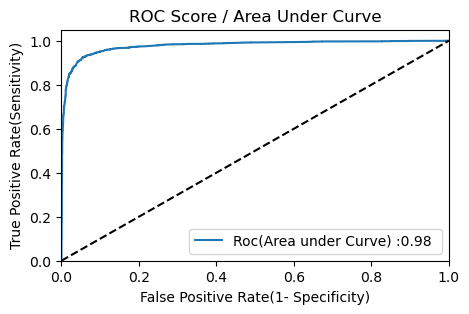

In [156]:
## Plotting ROC curve to find balance between Sensitivity and Specificity.

## Using function to draw ROC curve.

def plot_roc(actual,pred_prob):
    false_pos, true_pos, threshold = metrics.roc_curve(actual, pred_prob ,drop_intermediate = False )
    
    roc_score = metrics.roc_auc_score(actual, pred_prob)
    plt.figure(figsize=(5,3))
    plt.plot(false_pos, true_pos,label='Roc(Area under Curve) :%0.2f ' % roc_score) 
    plt.legend(loc="lower right")
    plt.plot([0, 1], [0, 1], 'k--')    ## To plot diagonal line
    plt.xlim([0.0, 1.0])               ## To set max x-axis limit to 1.
    plt.ylim([0.0, 1.05])              ## To set max y-axis limit to 1.05.
    plt.xlabel('False Positive Rate(1- Specificity)')
    plt.ylabel('True Positive Rate(Sensitivity)')
    plt.title('ROC Score / Area Under Curve')
    plt.show()


plot_roc(converted_pred['Actual_conversion_value'],converted_pred['Conversion_Probability_pred'])



### <span style="color: brown;">ROC curve is more towards upper left corner of graph and ROC score is 0.98 which is very good.</span>

## Step 10 : To find optimal threshold (cutt_off) value.

### Finding optimal cut-off by Sensitivity-Specificity trade off.

In [157]:
## Lets find Predicted Converted value with diffeerent threshold values from 0.0 to 9.0 and store in dataframe.

threshold = [float(val/10) for val in range(0,10)]

for thr in threshold:
    converted_pred[thr] = converted_pred['Conversion_Probability_pred'].apply(lambda x: 1 if x>thr else 0)
    

In [158]:
converted_pred.head()

Conversion_Probability_pred  Actual_conversion_value  \
0                     0.005509                      0.0   
1                     0.528041                      0.0   
2                     0.006579                      0.0   
3                     0.152351                      0.0   
4                     0.186418                      0.0   

   Predicted_conversion_value  0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  \
0                           0    1    0    0    0    0    0    0    0    0   
1                           1    1    1    1    1    1    1    0    0    0   
2                           0    1    0    0    0    0    0    0    0    0   
3                           0    1    1    0    0    0    0    0    0    0   
4                           0    1    1    0    0    0    0    0    0    0   

   0.9  
0    0  
1    0  
2    0  
3    0  
4    0

In [159]:
## Calculating Accuracy, Sensitivity and Specificity for predicted values obtained for all threshold values.

Accuracy=[]
Specificity=[]
Sensitivity =[]

for cols in threshold:
    cnf1 = metrics.confusion_matrix(converted_pred['Actual_conversion_value'],converted_pred[cols])
    true_positive = cnf1[1,1]
    true_negative = cnf1[0,0]
    false_positive = cnf1[0,1]
    false_negative = cnf1[1,0]
    Accuracy.append(round(metrics.accuracy_score(converted_pred['Actual_conversion_value'],converted_pred[cols]),4))
    Sensitivity.append(round(true_positive/(true_positive+false_negative),4))
    Specificity.append(round(true_negative/(true_negative+false_positive),4))

print('Accuracy score for thresholds from 0.0-0.9 :',Accuracy)
print('Sensitivity score for thresholds from 0.0-0.9 :',Sensitivity)
print('Specificity score for thresholds from 0.0-0.9 :',Specificity)


Accuracy score for thresholds from 0.0-0.9 : [0.3813, 0.8786, 0.9202, 0.9317, 0.9366, 0.9372, 0.9329, 0.9292, 0.9184, 0.8989]
Sensitivity score for thresholds from 0.0-0.9 : [1.0, 0.97, 0.9485, 0.9347, 0.9238, 0.9027, 0.871, 0.8467, 0.8114, 0.7522]
Specificity score for thresholds from 0.0-0.9 : [0.0, 0.8223, 0.9028, 0.9298, 0.9445, 0.9585, 0.971, 0.98, 0.9843, 0.9893]


### We can see there is a trade off between Sensitivity and Specificity. When Specificity increases Sensitivity decreases.
### In this Converted dataset, we need to predict correctly more on Specificity(non-converted leads) and hence there should be proper balnace between specificity and sensitivity.


In [160]:
## Let's plot Accuracy, Sensitivity and Specificity for predicted values obtained for all threshold values.

## Creating dataframe containing only Threshold, Accuracy, Sensitivity and Specificity for plot.

opt_thrshld = pd.DataFrame(threshold, columns=['Threshold'])
opt_thrshld['Accuracy'] = Accuracy
opt_thrshld['Sensitivity'] = Sensitivity
opt_thrshld['Specificity'] = Specificity

In [161]:
opt_thrshld

Threshold  Accuracy  Sensitivity  Specificity
0        0.0    0.3813       1.0000       0.0000
1        0.1    0.8786       0.9700       0.8223
2        0.2    0.9202       0.9485       0.9028
3        0.3    0.9317       0.9347       0.9298
4        0.4    0.9366       0.9238       0.9445
5        0.5    0.9372       0.9027       0.9585
6        0.6    0.9329       0.8710       0.9710
7        0.7    0.9292       0.8467       0.9800
8        0.8    0.9184       0.8114       0.9843
9        0.9    0.8989       0.7522       0.9893

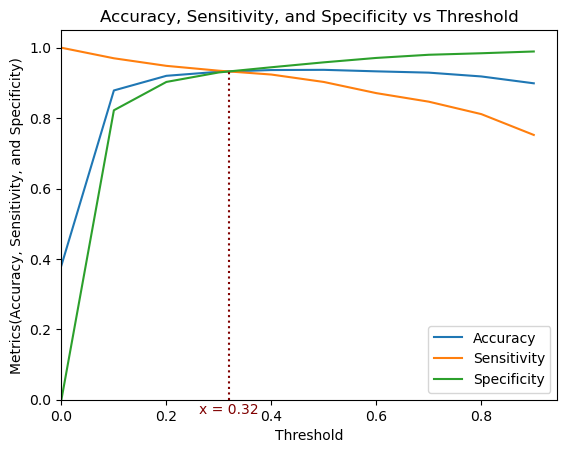

In [162]:
## Plot of dataframe.

opt_thrshld.plot.line(x='Threshold', y=['Accuracy','Sensitivity','Specificity'])
plt.xlim(left=0)
plt.ylim(bottom=0)
plt.axvline(x=0.32, ymin=0.0, ymax=0.89, color='maroon', linestyle=':', label='Threshold = 0.5')
threshold_value=0.32
plt.text(x=0.32, y=plt.ylim()[0]-0.04, s=f'x = {threshold_value}', color='maroon', ha='center')
plt.ylabel('Metrics(Accuracy, Sensitivity, and Specificity)')
plt.title('Accuracy, Sensitivity, and Specificity vs Threshold')
plt.show()


### '0.32' is optimal threshold value obtained where Sensitivity and Specificity and Accuracy meets together having metrics % values ranging from 90-94%.

### Finding optimal cut-off by Precision-Recall trade off.

In [163]:
## To find Precision and Recall values at each threshold value.

## import metrics

from sklearn.metrics import precision_score, recall_score

## Finding Precision and Recall score of final model 10 with cut_off at 0.5
Precision_scr = metrics.precision_score(converted_pred['Actual_conversion_value'],converted_pred['Predicted_conversion_value'])
print('Precision % of model -',round(Precision_scr*100,2))

Recall_scr = metrics.recall_score(converted_pred['Actual_conversion_value'],converted_pred['Predicted_conversion_value'])
print('Recall % of model -',round(Precision_scr*100,2))


Precision % of model - 93.06
Recall % of model - 93.06


In [164]:
## Precision-Recall trade-off

## Calculating Precision and Recall for predicted values obtained for all threshold values.
Accuracy=[]
Precision=[]
Recall=[]

threshold = [float(val/10) for val in range(0,10)]

for thr in threshold:
    converted_pred[thr] = converted_pred['Conversion_Probability_pred'].apply(lambda x: 1 if x>thr else 0)

for cols in threshold:
    cnf2 = metrics.confusion_matrix(converted_pred['Actual_conversion_value'],converted_pred[cols])
    true_positive = cnf2[1,1]
    true_negative = cnf2[0,0]
    false_positive = cnf2[0,1]
    false_negative = cnf2[1,0]
    Accuracy.append(round(metrics.accuracy_score(converted_pred['Actual_conversion_value'],converted_pred[cols]),4))
    Precision.append(round(true_positive/(true_positive+false_positive),4))
    Recall.append(round(true_positive/(true_positive+false_negative),4))

print('Accuracy score for thresholds from 0.0-0.9 :',Accuracy)
print('Precision score for thresholds from 0.0-0.9 :',Precision)
print('Recall score for thresholds from 0.0-0.9 :',Recall)

## Adding Accuracy, Precision and Recall to dataframe.

prec_recall_tradeoff = pd.DataFrame(threshold, columns=['Threshold'])
prec_recall_tradeoff['Accuracy'] = Accuracy
prec_recall_tradeoff['Precision'] = Precision
prec_recall_tradeoff['Recall'] = Recall
prec_recall_tradeoff


Accuracy score for thresholds from 0.0-0.9 : [0.3813, 0.8786, 0.9202, 0.9317, 0.9366, 0.9372, 0.9329, 0.9292, 0.9184, 0.8989]
Precision score for thresholds from 0.0-0.9 : [0.3813, 0.7709, 0.8574, 0.8913, 0.9112, 0.9306, 0.9488, 0.9631, 0.9695, 0.9773]
Recall score for thresholds from 0.0-0.9 : [1.0, 0.97, 0.9485, 0.9347, 0.9238, 0.9027, 0.871, 0.8467, 0.8114, 0.7522]


Threshold  Accuracy  Precision  Recall
0        0.0    0.3813     0.3813  1.0000
1        0.1    0.8786     0.7709  0.9700
2        0.2    0.9202     0.8574  0.9485
3        0.3    0.9317     0.8913  0.9347
4        0.4    0.9366     0.9112  0.9238
5        0.5    0.9372     0.9306  0.9027
6        0.6    0.9329     0.9488  0.8710
7        0.7    0.9292     0.9631  0.8467
8        0.8    0.9184     0.9695  0.8114
9        0.9    0.8989     0.9773  0.7522

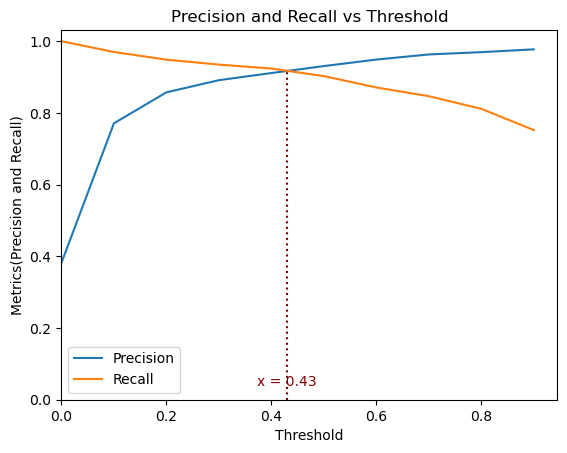

In [165]:
## Plot of prec_recall_tradeoff dataframe.


prec_recall_tradeoff.plot.line(x='Threshold', y=['Precision','Recall'])
plt.xlim(left=0)
plt.ylim(bottom=0)
plt.axvline(x=0.43, ymin=0.0, ymax=0.89, color='maroon', linestyle=':', label='Threshold = 0.5')
threshold_value=0.43
plt.text(x=0.43, y=plt.ylim()[0]+0.04, s=f'x = {threshold_value}', color='maroon', ha='center')
plt.ylabel('Metrics(Precision and Recall)')
plt.title('Precision and Recall vs Threshold')
plt.show()


### '0.43' is optimal threshold value obtained where Precision and Recall meets together having score % values ranging from 90-92%.

## Step 11: Making Predictions from test dataset.


In [166]:
## To make predictions.

## Standardizing numeric features.

lead_scr_X_test[['TotalVisits', 'Total Time Spent on Website','Page Views Per Visit']]=scaler.transform(lead_scr_X_test[['TotalVisits', 'Total Time Spent on Website','Page Views Per Visit']])
lead_scr_X_test.head()


Do Not Email  TotalVisits  Total Time Spent on Website  \
4269           0.0     1.564220                     0.964504   
2376           0.0    -1.054996                    -0.885371   
7766           0.0     0.582014                    -0.777416   
9199           0.0    -1.054996                    -0.885371   
4359           0.0    -1.054996                    -0.885371   

      Page Views Per Visit  A free copy of Mastering The Interview  \
4269              2.948320                                     0.0   
2376             -1.171392                                     0.0   
7766              1.403428                                     0.0   
9199             -1.171392                                     0.0   
4359             -1.171392                                     0.0   

      Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
4269                                  0.0                        0.0   
2376                                  0.0                        1.0   
7766                                  0.0                        0.0   
9199                                  0.0                        0.0   
4359                                  0.0                        1.0   

      Lead Origin_Lead Import  Lead Source_Facebook  Lead Source_Google  ...  \
4269                      0.0                   0.0                 0.0  ...   
2376                      0.0                   0.0                 0.0  ...   
7766                      0.0                   0.0                 1.0  ...   
9199                      0.0                   0.0                 0.0  ...   
4359                      0.0                   0.0                 0.0  ...   

      City_Tier II Cities  Last Notable Activity_Email Link Clicked  \
4269                  0.0                                       0.0   
2376                  0.0                                       0.0   
7766                  0.0                                       0.0   
9199                  0.0                                       0.0   
4359                  0.0                                       0.0   

      Last Notable Activity_Email Opened  Last Notable Activity_Modified  \
4269                                 0.0                             0.0   
2376                                 0.0                             0.0   
7766                                 0.0                             0.0   
9199                                 0.0                             1.0   
4359                                 1.0                             0.0   

      Last Notable Activity_Olark Chat Conversation  \
4269                                            0.0   
2376                                            0.0   
7766                                            0.0   
9199                                            0.0   
4359                                            0.0   

      Last Notable Activity_Others  \
4269                           0.0   
2376                           0.0   
7766                           0.0   
9199                           0.0   
4359                           0.0   

      Last Notable Activity_Page Visited on Website  \
4269                                            0.0   
2376                                            0.0   
7766                                            0.0   
9199                                            0.0   
4359                                            0.0   

      Last Notable Activity_SMS Sent  Last Notable Activity_Unreachable  \
4269                             1.0                                0.0   
2376                             1.0                                0.0   
7766                             0.0                                1.0   
9199                             0.0                                0.0   
4359                             0.0                                0.0   

      Last Notable Activity_Unsubscribed  
4269             

In [167]:
## to remove columns from lead_scr_X_test to match the features used in lead_scr_X_train dataset.

cols = lead_scr_X_train.columns
lead_scr_X_test = lead_scr_X_test[cols]

In [168]:
lead_scr_X_test.head()

Do Not Email  Total Time Spent on Website  \
4269           0.0                     0.964504   
2376           0.0                    -0.885371   
7766           0.0                    -0.777416   
9199           0.0                    -0.885371   
4359           0.0                    -0.885371   

      Lead Origin_Landing Page Submission  Lead Source_Welingak Website  \
4269                                  0.0                           0.0   
2376                                  0.0                           0.0   
7766                                  0.0                           0.0   
9199                                  0.0                           0.0   
4359                                  0.0                           0.0   

      Last Activity_SMS Sent  Specialization_Travel and Tourism  \
4269                     1.0                                0.0   
2376                     1.0                                0.0   
7766                     0.0                                0.0   
9199                     0.0                                0.0   
4359                     0.0                                0.0   

      What is your current occupation_Other  \
4269                                    0.0   
2376                                    0.0   
7766                                    0.0   
9199                                    0.0   
4359                                    0.0   

      What is your current occupation_Student  \
4269                                      0.0   
2376                                      0.0   
7766                                      0.0   
9199                                      0.0   
4359                                      0.0   

      What is your current occupation_Unemployed  \
4269                                         0.0   
2376                                         1.0   
7766                                         0.0   
9199                                         1.0   
4359                                         1.0   

      What is your current occupation_Working Professional  ...  \
4269                                                0.0     ...   
2376                                                0.0     ...   
7766                                                1.0     ...   
9199                                                0.0     ...   
4359                                                0.0     ...   

      Tags_Closed by Horizzon  Tags_Lost to EINS  Tags_Missing  Tags_Ringing  \
4269                      0.0                0.0           1.0           0.0   
2376                      0.0                0.0           0.0           0.0   
7766                      0.0                0.0           0.0           0.0   
9199                      0.0                0.0           0.0           0.0   
4359                      0.0                0.0           0.0           0.0   

      Tags_Will revert after reading the email  Tags_switched off  \
4269                                       0.0                0.0   
2376                                       1.0                0.0   
7766                                       1.0                0.0   
9199                                       0.0                0.0   
4359                                       1.0                0.0   

      Last Notable Activity_Email Link Clicked  \
4269                                       0.0   
2376                                       0.0   
7766                                       0.0   
9199                                       0.0   
4359                                       0.0   

      Last Notable Activity_Modified  \
4269                             0.0   
2376                             0.0   
7766                             0.0   
9199                             1.0   
4359                             0.0   

      Last Notable Activity_Olark Chat Conversation  \
4269                                            0.0   
237

In [169]:
## Predicting Converted value based on last best fit model.

lead_scr_X_test_cnst = sm.add_constant(lead_scr_X_test) 
lead_scr_y_test_pred = log_reg10.predict(lead_scr_X_test_cnst)

In [170]:
lead_scr_y_test.head()

4269    1.0
2376    1.0
7766    1.0
9199    0.0
4359    1.0
Name: Converted, dtype: float64

In [171]:
lead_scr_y_test_pred.head()

4269    0.796061
2376    0.992814
7766    0.965365
9199    0.005764
4359    0.941797
dtype: float64

In [172]:
## Creating dataframe of Test data Actual Churn values, Test data Churn Probability predicted by model.

testdata_converted_pred = pd.DataFrame(lead_scr_y_test_pred.values, columns=['Conversion_Probability_pred'])
testdata_converted_pred['Actual_conversion_value'] = lead_scr_y_test.values


### Let's use threshold cut-off value 0.32 whcih we obtained from Sensitivity-Specifity trade-off plot.

In [173]:
### Using threshold value 0.32 obtained from Sensitivity-Specifity graph.

testdata_converted_pred['Predicted_conversion_value'] = testdata_converted_pred['Conversion_Probability_pred'].apply(lambda x: 1 if x>0.32 else 0)
print('Dataframe of Test Dataset:-')
testdata_converted_pred.head()

Dataframe of Test Dataset:-


Conversion_Probability_pred  Actual_conversion_value  \
0                     0.796061                      1.0   
1                     0.992814                      1.0   
2                     0.965365                      1.0   
3                     0.005764                      0.0   
4                     0.941797                      1.0   

   Predicted_conversion_value  
0                           1  
1                           1  
2                           1  
3                           0  
4                           1

In [174]:
## Calculating Accuracy, Sensitivity, Specificity, Precision and Recall metrics.

Test_Accuracy_scr = metrics.accuracy_score(testdata_converted_pred['Actual_conversion_value'],testdata_converted_pred['Predicted_conversion_value'])
print(f'Accuracy % of Test Data model :{round(Test_Accuracy_scr*100,2)}%')

cnf2 = metrics.confusion_matrix(testdata_converted_pred['Actual_conversion_value'],testdata_converted_pred['Predicted_conversion_value'])
print('\nConfusion Matrix:- \n',cnf2)

true_positive = cnf2[1,1]
true_negative = cnf2[0,0]
false_positive = cnf2[0,1]
false_negative = cnf2[1,0]

## Calculating Sensitivity
Test_sensitivity_scr = true_positive/(true_positive+false_negative)
print(f'Sensitivity score % of Test Data model :{round(Test_sensitivity_scr*100,2)}%')

## Calculating Specificity
Test_specificity_scr = true_negative/(true_negative+false_positive)
print(f'Specificity score % of Test Data model :{round(Test_specificity_scr*100,2)}%')

## Calculating Precision
Test_Precision_scr = true_positive/(true_positive+false_positive)
print(f'Precision % of Test Data model :{round(Test_Precision_scr*100,2)}%')

## Calculating Recall
Test_Recall_scr = true_positive/(true_positive+false_negative)
print(f'Recall % of Test Data model : {round(Test_Recall_scr*100,2)}%')


Accuracy % of Test Data model :93.69%

Confusion Matrix:- 
 [[1558  119]
 [  56 1039]]
Sensitivity score % of Test Data model :94.89%
Specificity score % of Test Data model :92.9%
Precision % of Test Data model :89.72%
Recall % of Test Data model : 94.89%


### Calculating Model Performance : Harmonic mean (F1 score)

In [175]:
## importing library

from sklearn.metrics import f1_score

harmonic_mean = f1_score(testdata_converted_pred['Actual_conversion_value'], testdata_converted_pred['Predicted_conversion_value'])
print(f'F1 score of model is : {round(harmonic_mean*100,2)}%')   ## F1 score is 92% which indicates model well balances Precision and Recall. 

F1 score of model is : 92.23%


## <span style="color: green;"> Last best fit model is predicitng Converted values of Test data with an Accuracy score of 94%, Sensitivity score of 95% and Specificity score of 93% which is very good measure.</span>
## <span style="color: green;"> F1-Score of model which indicates performance of model is 92% whcih indicates there is good balance of Precision and Recall.</span>
## <span style="color: green;"> We can conclude that the last model number 10 built is best fit for predicting lead conversion.</span>

# Thank You